## Data Extraction


We want Monthly/daily closing price data of firms that where in NIFTY 50 Back in 2001 and NIFTY 500 back in 2003 and are continuously trading till date.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

In [3]:
%%capture captured_output
! pip install yfinance

In [4]:
import yfinance as yf

In [15]:
# Nifty 50 company list as of 2023   we will need data of nifty50 companies in 2001
df1 = pd.read_csv("/content/Nifty 50 Data October, 2024.csv")

In [16]:
print(df1.columns.tolist())


['Symbol', '% Chng', 'Chng', 'Day', 'LTP', 'Day.1', 'Prev', 'Day.2', 'Volume', 'Turnover (INR mn)', '52w', '52w.1']


In [17]:
company_list1 = df1["Symbol"].tolist()

In [18]:
company_list1

[nan,
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BEL',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SHRIRAMFIN',
 'SUNPHARMA',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TECHM',
 'TITAN',
 'TRENT',
 'ULTRACEMCO',
 'WIPRO']

In [19]:
import pandas as pd

# Assuming company_list is the list you've shown
company_list = list(filter(pd.notna, company_list1))

print(company_list)

['ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO']


In [20]:
%%capture captured_output
new_list = []
for elmnt in company_list:
  new_list.append(elmnt + ".NS")

new_list.pop(0)

In [21]:
data = yf.download(new_list,'2003-01-01','2024-10-01',period = "1mo")['Adj Close']

[*********************100%***********************]  48 of 48 completed


In [22]:
data

Ticker,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01 00:00:00+00:00,44.901100,16.443565,7.056132,81.682838,498.245789,3.172938,1.203413,9.460640,7.753192,37.931725,...,11.890466,12.022705,24.999605,2.142521,43.087635,NaN,3.347641,11.541277,285.532043,50.743229
2003-01-02 00:00:00+00:00,45.855534,16.539141,6.950939,80.671349,492.075867,3.172938,1.184273,9.460640,7.998394,37.990597,...,12.010602,11.895100,24.753532,2.119187,41.121517,NaN,3.276094,12.028116,285.623444,50.222183
2003-01-03 00:00:00+00:00,46.152477,16.567209,6.805285,81.401871,496.531982,3.182865,1.178358,9.418871,7.977673,37.876545,...,12.336257,11.798531,24.784292,2.106458,41.624058,NaN,3.202768,11.941206,282.333069,50.086193
2003-01-06 00:00:00+00:00,46.576672,16.645346,6.797194,80.558960,491.390259,3.143867,1.205153,9.272680,7.825717,38.005314,...,11.968901,11.726105,24.192179,2.059790,40.389713,NaN,3.178770,12.686563,282.333069,50.938805
2003-01-07 00:00:00+00:00,47.191757,16.736370,6.805285,79.499290,484.926575,3.172938,1.219422,9.230910,7.894789,37.986912,...,11.894437,11.626089,23.984547,2.072519,39.922424,NaN,3.144107,11.892594,283.247101,50.472771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,7122.000000,3248.399902,1239.550049,12443.650391,1904.650024,7554.200195,291.799988,1756.650024,339.149994,6203.149902,...,1868.099976,1211.650024,977.299988,160.529999,4260.904785,1622.526001,3784.899902,7621.350098,11761.650391,539.549988
2024-09-25 00:00:00+00:00,7133.450195,3244.750000,1268.099976,12397.250000,1928.500000,7623.899902,289.850006,1760.400024,339.799988,6180.299805,...,1870.550049,1189.599976,963.599976,161.660004,4264.346680,1588.481812,3737.250000,7614.899902,11816.299805,536.200012
2024-09-26 00:00:00+00:00,7167.850098,3277.050049,1277.099976,12621.650391,1982.800049,7768.399902,290.500000,1771.099976,345.100006,6254.100098,...,1898.400024,1213.449951,993.150024,165.610001,4282.053711,1592.644409,3757.550049,7845.399902,12065.000000,541.900024


In [23]:
print(data.dtypes)


Ticker
APOLLOHOSP.NS    float64
ASIANPAINT.NS    float64
AXISBANK.NS      float64
BAJAJ-AUTO.NS    float64
BAJAJFINSV.NS    float64
BAJFINANCE.NS    float64
BEL.NS           float64
BHARTIARTL.NS    float64
BPCL.NS          float64
BRITANNIA.NS     float64
CIPLA.NS         float64
COALINDIA.NS     float64
DRREDDY.NS       float64
EICHERMOT.NS     float64
GRASIM.NS        float64
HCLTECH.NS       float64
HDFCBANK.NS      float64
HDFCLIFE.NS      float64
HEROMOTOCO.NS    float64
HINDALCO.NS      float64
HINDUNILVR.NS    float64
ICICIBANK.NS     float64
INDUSINDBK.NS    float64
INFY.NS          float64
ITC.NS           float64
JSWSTEEL.NS      float64
KOTAKBANK.NS     float64
LT.NS            float64
M&M.NS           float64
MARUTI.NS        float64
NESTLEIND.NS     float64
NTPC.NS          float64
ONGC.NS          float64
POWERGRID.NS     float64
RELIANCE.NS      float64
SBILIFE.NS       float64
SBIN.NS          float64
SHRIRAMFIN.NS    float64
SUNPHARMA.NS     float64
TATACONSUM.NS    f

In [24]:
from google.colab import files
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert all datetime columns to timezone-unaware if they have timezones
for column in data.select_dtypes(['datetime']):
    data[column] = data[column].dt.tz_localize(None)

# Now save to Excel
data.to_excel('df_month.xlsx', index=False)

# Download the file
files.download('df_month.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data for Adani int is in form of daily return so drop that column.

In [ ]:
df2 =data.drop(data.columns[0], axis =1)

In [ ]:
df2

## Portfolio Construction Phase


We want to construct portfolios with 1) Minimum Variance 2) Equal weight 3) Market Weighted 4) HRP 5) HERC.

Step -2) Calculate Sharpe Ratio for all 5 pc method and call highest as star portfolio.

#Minimum Variance


In [25]:
%%capture captured_output
!pip install PyPortfolioOpt

In [26]:
!pip install cvxopt

In [27]:
from cvxopt import matrix, solvers

edit yaha se start hue

In [28]:
from pypfopt import EfficientFrontier, risk_models, expected_returns


In [29]:
current_month_data = yf.download(new_list, start="2005-01-01", end="2005-03-01")['Adj Close']

[*********************100%***********************]  48 of 48 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['TECHM.NS', 'SBILIFE.NS', 'POWERGRID.NS', 'HDFCLIFE.NS', 'COALINDIA.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2005-03-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104517800, endDate = 1109615400")')


In [30]:
nan_columns = current_month_data.columns[current_month_data.isna().any()]
current_month_data =current_month_data.drop(nan_columns, axis=1)
for element in nan_columns:
  if element in new_list:
    new_list.remove(element)

print(len(new_list))


43


In [31]:
current_month_data

Ticker,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SHRIRAMFIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00+00:00,114.669197,25.657084,32.827808,183.571640,1119.743164,9.759014,4.792407,95.358238,17.573425,71.060280,...,25.631371,45.078388,35.297359,83.108421,8.930239,119.628899,8.461761,41.299805,309.634918,70.490997
2005-01-04 00:00:00+00:00,115.153313,26.055080,32.741508,181.540619,1107.354248,9.675420,4.792407,94.439316,17.660156,71.022110,...,26.141087,43.010620,36.295593,83.004623,8.923321,118.568100,8.349331,41.232944,314.167603,70.009666
2005-01-05 00:00:00+00:00,111.588478,25.878191,31.800859,174.861511,1066.613403,9.437053,4.567145,87.860748,17.188818,69.072281,...,26.723625,43.010620,35.293736,80.433685,8.509382,117.130714,7.905822,41.186367,305.377075,66.107506
2005-01-06 00:00:00+00:00,110.268158,24.881178,31.956194,172.236374,1050.600586,9.259933,4.530389,88.215775,17.103973,68.770821,...,29.162962,41.481033,34.948887,78.756973,8.200371,116.729408,7.797831,41.151062,309.726501,64.434494
2005-01-07 00:00:00+00:00,111.874550,25.733465,32.810543,176.081726,1074.056274,9.410565,4.542035,87.777199,17.239719,68.778473,...,28.398401,40.967121,35.827328,78.685127,8.332967,118.453194,7.968925,41.214920,305.514343,65.401825
2005-01-10 00:00:00+00:00,111.654503,25.874168,33.155735,175.856964,1072.685303,9.528098,4.490722,85.020447,16.813631,68.847153,...,27.925085,40.570564,35.914459,75.850700,8.260325,117.348175,8.046693,39.650906,311.054230,63.368992
2005-01-11 00:00:00+00:00,111.808533,25.753561,32.439461,176.900589,1079.051147,9.142404,4.429947,83.119957,16.455412,68.373985,...,26.905672,38.498737,35.271950,76.673088,8.062004,116.137100,7.877822,40.562111,297.273285,63.172718
2005-01-12 00:00:00+00:00,108.485733,25.480185,31.300339,173.504791,1058.337769,9.078672,4.243259,81.846024,16.104740,67.992424,...,25.594973,37.551849,34.066814,75.635139,7.934020,114.749191,7.436981,39.611843,293.107025,61.312767
2005-01-13 00:00:00+00:00,110.840302,25.460089,30.316530,177.671219,1083.751831,9.168890,4.369174,86.712105,15.835132,68.221382,...,26.760027,37.750122,34.349957,77.814835,8.234960,114.293068,7.694287,40.133179,291.825165,62.696041


In [32]:
def MV_portfolio(current_month_data):
  # Calculate the expected returns and covariance matrix of the assets
  expected_return = expected_returns.ema_historical_return(current_month_data)
  cov_matrix = risk_models.sample_cov(current_month_data)


  # Create an EfficientFrontier object
  ef = EfficientFrontier(expected_return, cov_matrix)

  # Optimize the portfolio for minimum variance
  # ef.min_volatility()
  ef.min_volatility()

  # Get the optimal weights
  weights_mv = ef.weights

  return(weights_mv)

In [33]:
def MV_portfolio_new(returns):
    """
    Calculate the weights of the portfolio with minimum variance.

    Parameters:
    returns (pd.DataFrame): DataFrame containing the returns of the assets.

    Returns:
    np.ndarray: Array containing the weights of the assets in the minimum variance portfolio.
    """

    # Calculate the covariance matrix of the returns
    cov_matrix = returns.cov().values

    # Number of assets
    n = len(cov_matrix)

    # Convert to cvxopt matrix
    P = matrix(cov_matrix)
    q = matrix(np.zeros((n, 1)))

    # Constraints: sum of weights equals 1
    G = matrix(np.diag(np.ones(n) * -1))
    h = matrix(np.zeros(n))

    # Equality constraint: sum of weights equals 1
    A = matrix(1.0, (1, n))
    b = matrix(1.0)

    # Solve the quadratic programming problem
    sol = solvers.qp(P, q, G, h, A, b)

    # Extract the weights
    weights = np.array(sol['x']).flatten()

    return weights

In [34]:
# Initialize an empty dataframe


import pandas as pd

col = current_month_data.columns
weights_mv = pd.DataFrame(columns = col)

ls_mv = []


for year in range(2005, 2011):
  for mnth in range(1,13):
    if (mnth ==12):
      current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
    else:
      current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']

    if(mnth ==12):
      next_month_data = yf.download(new_list, start=f"{year+1}-{mnth-11:02d}-01", end=f"{year+1}-{mnth-10:02d}-01")['Adj Close']
    elif(mnth ==11):
      next_month_data = yf.download(new_list, start=f"{year}-{mnth+1:02d}-01", end=f"{year+1}-{mnth-10:02d}-01")['Adj Close']
    else:
      next_month_data = yf.download(new_list, start=f"{year}-{mnth+1:02d}-01", end=f"{year}-{mnth+2:02d}-01")['Adj Close']


## Minimum Variance Portfolio
    weights_mv_temp = MV_portfolio_new(current_month_data)
    weights_mv_temp = weights_mv_temp.reshape(-1,1)
    weights_mv_temp = weights_mv_temp.transpose()
    df_w= pd.DataFrame(weights_mv_temp,columns= col)

    weights_mv = pd.concat([weights_mv, df_w], axis=0, ignore_index=True)
    print(weights_mv_temp)


    # Portfolio_Value = np.dot(next_month_data.iloc[-1,:], weights_mv_temp)
    weights_mv_temp_array = weights_mv_temp.flatten()
    Portfolio_Value = np.dot(next_month_data.iloc[-1,:], weights_mv_temp_array)
    print(Portfolio_Value.sum())
    ls_mv.append(Portfolio_Value.sum())


[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
<ipython-input-34-6dd681313d71>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weights_mv = pd.concat([weights_mv, df_w], axis=0, ignore_index=True)
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.4611e-03 -1.0058e+00  5e+01  7e+00  7e+00
 1:  9.4482e-03 -9.3049e-01  3e+00  3e-01  3e-01
 2:  7.1818e-02 -4.4097e-01  1e+00  7e-02  7e-02
 3:  9.6230e-02 -1.5626e-01  4e-01  2e-02  2e-02
 4:  4.4972e-02 -4.8762e-02  9e-02  4e-16  3e-15
 5:  8.1120e-03 -9.2730e-03  2e-02  2e-16  3e-15
 6:  1.2976e-03 -1.3092e-03  3e-03  4e-16  6e-16
 7:  1.9242e-04 -1.9367e-04  4e-04  2e-16  3e-16
 8:  2.8291e-05 -2.8446e-05  6e-05  1e-18  9e-17
 9:  4.1480e-06 -4.1693e-06  8e-06  2e-16  4e-17
10:  6.0754e-07 -6.1059e-07  1e-06  2e-16  2e-17
11:  8.8951e-08 -8.9393e-08  2e-07  6e-16  7e-18
12:  1.3022e-08 -1.3086e-08  3e-08  1e-16  4e-18
Optimal solution found.
[[1.44365208e-06 1.14886750e-05 1.53023414e-05 1.15650300e-06
  2.32200917e-07 3.21403552e-05 4.05581983e-05 1.00727339e-06
  5.37543610e-06 4.05050902e-06 6.37961351e-07 1.36610099e-06
  1.50135196e-05 1.08602531e-06 4.50817478e-06 4.54577014e-06
  3.62741683e-07 9.68320685e-07 1.82125110e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.8500e-03 -1.0051e+00  5e+01  7e+00  7e+00
 1:  7.6133e-03 -9.4595e-01  2e+00  2e-01  2e-01
 2:  2.3059e-02 -4.5238e-01  7e-01  5e-02  5e-02
 3:  3.9896e-02 -6.6053e-02  1e-01  5e-03  5e-03
 4:  1.4981e-02 -1.5242e-02  3e-02  3e-04  3e-04
 5:  4.1808e-03 -7.3326e-03  1e-02  1e-15  8e-16
 6:  7.8523e-04 -8.1675e-04  2e-03  1e-16  5e-16
 7:  1.1823e-04 -1.1899e-04  2e-04  4e-18  3e-16
 8:  1.7463e-05 -1.7570e-05  4e-05  4e-16  7e-17
 9:  2.5644e-06 -2.5781e-06  5e-06  2e-16  3e-17
10:  3.7583e-07 -3.7775e-07  8e-07  1e-16  1e-17
11:  5.5039e-08 -5.5314e-08  1e-07  4e-16  4e-18
12:  8.0580e-09 -8.0980e-09  2e-08  1e-16  9e-19
Optimal solution found.
[[6.58670039e-07 2.95794373e-05 4.53424936e-06 1.84558752e-06
  2.83051136e-07 3.39399268e-05 6.58454824e-05 1.65452162e-05
  1.79731580e-05 1.86151809e-05 2.04795030e-05 7.77945978e-06
  3.53044635e-05 3.44470100e-06 1.06641249e-05 1.06086278e-05
  7.23925194e-07 9.87170034e-06 2.13836426e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.6530e-03 -1.0061e+00  5e+01  7e+00  7e+00
 1:  9.7830e-03 -9.3536e-01  2e+00  2e-01  2e-01
 2:  2.2248e-02 -5.6550e-01  1e+00  1e-01  1e-01
 3:  6.0509e-02 -2.3165e-01  5e-01  3e-02  3e-02
 4:  4.2938e-02 -1.1020e-01  2e-01  2e-16  7e-15
 5:  2.0280e-02 -2.0953e-02  4e-02  6e-17  4e-15
 6:  6.4625e-03 -1.9536e-02  3e-02  1e-15  2e-15
 7:  1.5153e-03 -1.6460e-03  3e-03  4e-16  1e-15
 8:  2.3270e-04 -2.3401e-04  5e-04  1e-16  7e-16
 9:  3.4449e-05 -3.4674e-05  7e-05  2e-16  2e-16
10:  5.0627e-06 -5.0902e-06  1e-05  2e-16  1e-16
11:  7.4217e-07 -7.4598e-07  1e-06  4e-16  6e-17
12:  1.0870e-07 -1.0924e-07  2e-07  2e-16  2e-17
13:  1.5915e-08 -1.5994e-08  3e-08  2e-16  8e-18
Optimal solution found.
[[1.01993298e-05 3.13058670e-04 4.42840234e-06 1.59730305e-06
  2.70254323e-07 1.52115763e-05 2.09310329e-05 2.51708577e-05
  1.62161132e-05 3.52588974e-06 1.54443981e-06 5.20962481e-05
  1.61884675e-05 1.29491076e-06 8.52772643e-06 4.1642182

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.2852e-03 -1.0087e+00  5e+01  7e+00  7e+00
 1:  8.0143e-03 -9.3088e-01  3e+00  2e-01  2e-01
 2:  7.2534e-02 -3.3119e-01  5e-01  2e-02  2e-02
 3:  4.5315e-02 -6.5553e-02  1e-01  4e-03  4e-03
 4:  1.6844e-02 -2.8206e-02  5e-02  1e-16  3e-15
 5:  7.6073e-03 -4.4770e-03  1e-02  2e-16  8e-16
 6:  3.8664e-03  1.0261e-03  3e-03  2e-16  5e-16
 7:  2.7056e-03  2.1329e-03  6e-04  1e-16  2e-16
 8:  2.3668e-03  2.3285e-03  4e-05  1e-16  4e-16
 9:  2.3376e-03  2.3366e-03  1e-06  8e-17  3e-16
10:  2.3370e-03  2.3369e-03  4e-08  2e-16  3e-16
Optimal solution found.
[[6.11054903e-03 3.42086478e-02 7.98303482e-09 4.58694124e-09
  4.86185769e-10 4.01404771e-08 2.26825805e-01 1.27554606e-02
  4.14938339e-01 4.04962930e-02 3.38058569e-07 2.48844086e-08
  4.13294933e-02 1.79699106e-09 1.48895255e-08 9.76396653e-09
  3.57607353e-09 2.24938824e-09 4.47419993e-09 3.52928426e-09
  5.64457194e-09 3.47769994e-09 1.95870048e-01 1.29743673e-08
  1.55318826e-08 

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed


     pcost       dcost       gap    pres   dres
 0:  4.5721e-03 -1.0088e+00  5e+01  7e+00  7e+00
 1:  1.0817e-02 -9.4417e-01  2e+00  2e-01  2e-01
 2:  3.1096e-02 -5.2760e-01  9e-01  8e-02  8e-02
 3:  5.5159e-02 -2.1416e-01  3e-01  2e-02  2e-02
 4:  3.4281e-02 -3.9259e-02  8e-02  3e-03  3e-03
 5:  9.4134e-03 -2.1940e-02  3e-02  1e-16  1e-15
 6:  2.2004e-03 -2.3257e-03  5e-03  3e-16  2e-15
 7:  3.4263e-04 -3.4719e-04  7e-04  2e-16  4e-16
 8:  5.0998e-05 -5.1343e-05  1e-04  1e-16  1e-16
 9:  7.5070e-06 -7.5493e-06  2e-05  1e-16  7e-17
10:  1.1011e-06 -1.1068e-06  2e-06  1e-16  2e-17
11:  1.6130e-07 -1.6212e-07  3e-07  2e-16  6e-18
12:  2.3618e-08 -2.3736e-08  5e-08  2e-16  3e-18
Optimal solution found.
[[5.78547032e-05 2.39957411e-05 3.16762187e-05 1.51051811e-06
  4.24559120e-07 9.57423426e-06 1.22923066e-04 3.75969053e-06
  3.42806763e-05 1.60356238e-05 3.53969548e-06 6.67495213e-06
  1.03185994e-05 2.04065486e-05 1.15092016e-05 1.53456499e-04
  1.23641743e-06 8.02720553e-05 1.04719829e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  5.1642e-03 -1.0105e+00  5e+01  7e+00  7e+00
 1:  1.0500e-02 -9.3635e-01  3e+00  3e-01  3e-01
 2:  3.0425e-02 -5.3214e-01  1e+00  9e-02  9e-02
 3:  3.6907e-02 -2.1225e-01  3e-01  2e-02  2e-02
 4:  1.9673e-02 -3.9396e-02  6e-02  6e-04  6e-04
 5:  5.8843e-03 -7.5532e-03  1e-02  2e-05  2e-05
 6:  1.4206e-03 -1.8706e-03  3e-03  2e-16  1e-15
 7:  3.1833e-04 -3.7993e-04  7e-04  4e-16  1e-16
 8:  5.2679e-05 -5.4495e-05  1e-04  2e-16  3e-16
 9:  7.9323e-06 -7.9839e-06  2e-05  2e-16  7e-17
10:  1.1713e-06 -1.1784e-06  2e-06  2e-16  2e-17
11:  1.7199e-07 -1.7290e-07  3e-07  2e-16  9e-18
12:  2.5204e-08 -2.5332e-08  5e-08  2e-16  2e-18
Optimal solution found.
[[6.62960793e-06 2.08289916e-05 1.48662553e-05 2.70984447e-06
  8.33030761e-07 3.41817660e-05 1.72968749e-03 8.24011868e-06
  7.96885756e-04 6.59908957e-05 4.21901434e-06 3.09360294e-05
  2.00130250e-04 1.12657149e-05 4.52771147e-05 3.49856663e-05
  1.31154410e-06 1.35496046e-05 4.85475228e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.0619e-03 -1.0110e+00  5e+01  7e+00  7e+00
 1:  1.3345e-02 -9.2491e-01  4e+00  4e-01  4e-01
 2:  5.6460e-02 -5.2534e-01  1e+00  1e-01  1e-01
 3:  7.4627e-02 -1.7281e-01  5e-01  4e-02  4e-02
 4:  4.2414e-02 -4.3396e-02  1e-01  7e-03  7e-03
 5:  1.6353e-02 -2.1020e-02  5e-02  1e-03  1e-03
 6:  3.3074e-03 -3.3541e-03  7e-03  1e-05  1e-05
 7:  4.9926e-04 -5.0292e-04  1e-03  2e-16  2e-15
 8:  7.3583e-05 -7.4007e-05  1e-04  2e-16  1e-15
 9:  1.0798e-05 -1.0854e-05  2e-05  3e-16  4e-16
10:  1.5820e-06 -1.5900e-06  3e-06  1e-16  2e-16
11:  2.3166e-07 -2.3281e-07  5e-07  4e-16  7e-17
12:  3.3915e-08 -3.4083e-08  7e-08  2e-16  4e-17
Optimal solution found.
[[1.91655149e-06 7.01154273e-06 1.77937992e-05 1.58680391e-06
  5.74433691e-07 1.43293625e-07 1.95341516e-07 1.21355290e-06
  5.27430567e-07 4.07472019e-06 3.75895086e-06 1.42838775e-07
  1.70346828e-07 2.98608432e-08 1.42701096e-05 4.24449099e-06
  1.00007916e-06 4.90363199e-06 5.35628738e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed


     pcost       dcost       gap    pres   dres
 0:  3.8124e-03 -1.0109e+00  5e+01  7e+00  7e+00
 1:  1.2111e-02 -9.3965e-01  3e+00  3e-01  3e-01
 2:  5.7890e-02 -5.3107e-01  9e-01  6e-02  6e-02
 3:  8.0712e-02 -1.0275e-01  2e-01  3e-03  3e-03
 4:  2.2618e-02 -4.3227e-02  7e-02  2e-16  6e-15
 5:  6.2727e-03 -6.4788e-03  1e-02  6e-16  9e-16
 6:  1.0542e-03 -1.1068e-03  2e-03  2e-16  4e-16
 7:  1.5929e-04 -1.6014e-04  3e-04  2e-16  3e-16
 8:  2.3540e-05 -2.3687e-05  5e-05  4e-16  1e-16
 9:  3.4572e-06 -3.4757e-06  7e-06  1e-16  4e-17
10:  5.0668e-07 -5.0926e-07  1e-06  2e-16  7e-18
11:  7.4201e-08 -7.4572e-08  1e-07  2e-16  5e-18
12:  1.0863e-08 -1.0917e-08  2e-08  4e-16  2e-18
Optimal solution found.
[[8.06638486e-06 6.35048018e-05 7.41918527e-06 8.30228286e-07
  3.33137965e-07 4.50410128e-05 7.83267361e-05 2.15327422e-06
  7.88648899e-05 2.55383876e-06 3.24111726e-06 6.17918920e-06
  1.11722902e-05 2.54516709e-06 4.61828292e-06 2.70958391e-05
  7.07882058e-07 2.10974377e-06 2.65838865e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  7.8759e-03 -1.0116e+00  5e+01  7e+00  7e+00
 1:  1.9934e-02 -9.3219e-01  2e+00  2e-01  2e-01
 2:  4.4871e-02 -5.0727e-01  1e+00  9e-02  9e-02
 3:  6.3557e-02 -2.2654e-01  6e-01  4e-02  4e-02
 4:  6.0742e-02 -6.2372e-02  2e-01  1e-02  1e-02
 5:  2.6861e-02 -4.2566e-02  7e-02  3e-16  7e-15
 6:  4.7148e-03 -4.8718e-03  1e-02  3e-16  5e-15
 7:  7.0300e-04 -7.0683e-04  1e-03  2e-16  1e-15
 8:  1.0354e-04 -1.0414e-04  2e-04  1e-16  5e-16
 9:  1.5190e-05 -1.5270e-05  3e-05  3e-16  2e-16
10:  2.2254e-06 -2.2367e-06  4e-06  1e-16  1e-16
11:  3.2586e-07 -3.2748e-07  7e-07  1e-19  3e-17
12:  4.7704e-08 -4.7940e-08  1e-07  1e-16  2e-17
Optimal solution found.
[[8.35420743e-07 1.01141022e-05 8.81815693e-06 8.54480984e-07
  1.66361335e-07 5.12551606e-06 2.55958876e-05 1.61386982e-06
  1.58540698e-05 1.47192404e-05 3.49341472e-06 7.47521475e-06
  6.56018080e-05 2.16808227e-06 1.51818266e-05 4.13745704e-06
  1.58782946e-06 2.82179868e-06 2.33811552e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.3664e-03 -1.0064e+00  5e+01  7e+00  7e+00
 1:  1.0564e-02 -9.0591e-01  3e+00  4e-01  4e-01
 2:  3.8020e-02 -3.8282e-01  1e+00  1e-01  1e-01
 3:  5.9711e-02 -6.3159e-02  6e-01  6e-02  6e-02
 4:  5.0563e-02 -8.2354e-02  3e-01  2e-02  2e-02
 5:  1.7422e-02 -1.7740e-02  4e-02  2e-04  2e-04
 6:  2.6718e-03 -2.6876e-03  5e-03  7e-16  3e-15
 7:  3.9277e-04 -3.9492e-04  8e-04  2e-16  1e-15
 8:  5.7583e-05 -5.7879e-05  1e-04  2e-16  5e-16
 9:  8.4339e-06 -8.4762e-06  2e-05  4e-16  1e-16
10:  1.2348e-06 -1.2410e-06  2e-06  2e-16  6e-17
11:  1.8077e-07 -1.8166e-07  4e-07  2e-16  3e-17
12:  2.6461e-08 -2.6592e-08  5e-08  4e-16  1e-17
Optimal solution found.
[[8.78736859e-07 7.62346099e-06 2.75584883e-06 1.51787280e-06
  2.78944574e-07 2.42506832e-06 6.69901179e-06 1.25834707e-06
  1.05044640e-05 1.97086800e-06 2.78062786e-06 1.69652923e-06
  5.64813410e-06 4.61663981e-07 4.90755786e-06 2.33817604e-06
  5.72654155e-07 5.43459953e-07 1.04778223e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.5305e-03 -1.0035e+00  5e+01  7e+00  7e+00
 1:  1.5469e-02 -9.1561e-01  3e+00  3e-01  3e-01
 2:  8.1436e-02 -4.9388e-01  1e+00  8e-02  8e-02
 3:  8.5213e-02 -3.2038e-01  8e-01  5e-02  5e-02
 4:  5.2812e-02 -5.5163e-02  2e-01  1e-02  1e-02
 5:  2.3260e-02 -3.7565e-02  6e-02  6e-16  2e-14
 6:  4.5381e-03 -4.6812e-03  9e-03  2e-16  4e-15
 7:  6.8977e-04 -6.9579e-04  1e-03  1e-16  2e-15
 8:  1.0213e-04 -1.0277e-04  2e-04  2e-16  5e-16
 9:  1.5009e-05 -1.5090e-05  3e-05  1e-16  7e-16
10:  2.2002e-06 -2.2115e-06  4e-06  6e-19  1e-16
11:  3.2224e-07 -3.2386e-07  6e-07  3e-16  2e-17
12:  4.7179e-08 -4.7413e-08  9e-08  4e-16  3e-17
Optimal solution found.
[[8.87243590e-06 1.38631214e-05 6.47300264e-06 4.97944270e-07
  3.29816976e-08 6.57829873e-06 2.04954157e-05 1.63360841e-06
  9.40075557e-06 1.48202711e-05 1.69450524e-06 4.10031861e-06
  1.04510196e-04 1.22080610e-06 4.27712499e-06 3.45957779e-06
  3.76298311e-07 2.43480525e-06 2.14290215e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.6527e-03 -1.0163e+00  5e+01  7e+00  7e+00
 1:  1.4131e-02 -9.2110e-01  3e+00  2e-01  3e-01
 2:  5.8367e-02 -4.2779e-01  9e-01  8e-02  8e-02
 3:  6.5142e-02 -2.4616e-01  5e-01  3e-02  4e-02
 4:  4.3529e-02 -4.5339e-02  1e-01  4e-03  4e-03
 5:  1.4210e-02 -3.1681e-02  5e-02  4e-05  5e-05
 6:  2.8672e-03 -3.2779e-03  6e-03  3e-06  3e-06
 7:  4.4829e-04 -4.5239e-04  9e-04  3e-08  3e-08
 8:  6.6225e-05 -6.6623e-05  1e-04  1e-16  1e-16
 9:  9.7263e-06 -9.7784e-06  2e-05  3e-16  3e-17
10:  1.4255e-06 -1.4328e-06  3e-06  2e-16  5e-17
11:  2.0877e-07 -2.0982e-07  4e-07  1e-16  2e-17
12:  3.0566e-08 -3.0717e-08  6e-08  2e-16  5e-18
Optimal solution found.
[[2.89536295e-06 1.44785334e-05 2.20390721e-05 9.14716518e-07
  2.10203792e-07 3.89248548e-06 2.33571208e-05 3.67849006e-06
  7.66304460e-05 6.75013591e-06 3.52749661e-06 7.17731312e-06
  2.44228957e-04 5.72551020e-06 1.05670430e-05 8.18912018e-06
  8.00244377e-07 1.77976255e-06 4.94654153e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.4219e-03 -1.0207e+00  5e+01  7e+00  7e+00
 1:  9.4799e-03 -9.4342e-01  2e+00  1e-01  2e-01
 2:  2.3491e-02 -4.7852e-01  8e-01  5e-02  6e-02
 3:  4.2635e-02 -2.4629e-01  4e-01  2e-02  2e-02
 4:  3.7098e-02 -3.9135e-02  1e-01  4e-03  5e-03
 5:  1.7175e-02 -4.1806e-02  6e-02  1e-03  2e-03
 6:  4.2011e-03 -4.4474e-03  9e-03  9e-05  9e-05
 7:  6.5012e-04 -6.5539e-04  1e-03  8e-18  1e-15
 8:  9.6332e-05 -9.6959e-05  2e-04  4e-16  2e-16
 9:  1.4162e-05 -1.4240e-05  3e-05  2e-16  2e-16
10:  2.0764e-06 -2.0871e-06  4e-06  7e-19  5e-17
11:  3.0413e-07 -3.0566e-07  6e-07  2e-16  3e-17
12:  4.4529e-08 -4.4751e-08  9e-08  4e-16  1e-17
Optimal solution found.
[[1.09567646e-06 2.23805944e-05 1.59798372e-05 1.06487975e-06
  3.68133876e-07 1.45248831e-05 3.20518094e-05 2.83695940e-06
  4.64339201e-05 3.50119710e-05 1.25019075e-05 6.29617967e-06
  3.40182171e-05 4.09820172e-06 9.24715074e-06 1.95697470e-05
  1.15017605e-06 3.58973752e-06 6.08196387e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.4382e-03 -1.0044e+00  5e+01  7e+00  7e+00
 1:  1.4243e-02 -9.2711e-01  2e+00  2e-01  2e-01
 2:  3.9081e-02 -3.7910e-01  6e-01  4e-02  4e-02
 3:  4.3641e-02 -1.3716e-01  2e-01  2e-02  2e-02
 4:  3.5210e-02 -4.9050e-02  1e-01  4e-03  4e-03
 5:  1.0862e-02 -1.6299e-02  3e-02  2e-16  3e-15
 6:  2.1031e-03 -2.1574e-03  4e-03  2e-16  2e-15
 7:  3.2257e-04 -3.2617e-04  6e-04  1e-16  1e-15
 8:  4.7846e-05 -4.8152e-05  1e-04  1e-16  2e-16
 9:  7.0354e-06 -7.0740e-06  1e-05  1e-16  9e-17
10:  1.0315e-06 -1.0368e-06  2e-06  2e-16  2e-17
11:  1.5109e-07 -1.5185e-07  3e-07  4e-16  2e-17
12:  2.2121e-08 -2.2231e-08  4e-08  4e-16  5e-18
Optimal solution found.
[[8.92425511e-07 6.35104803e-06 1.60378863e-05 7.16648863e-07
  1.37547065e-07 1.12548161e-05 1.08108905e-04 1.23296790e-05
  7.28379967e-05 7.18118998e-06 6.85865324e-07 6.08907558e-06
  1.62141697e-05 1.51058086e-06 1.53708198e-05 1.02064478e-05
  7.83364325e-07 9.98976248e-06 1.42202073e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.1488e-03 -1.0092e+00  5e+01  7e+00  7e+00
 1:  9.7058e-03 -9.3549e-01  2e+00  2e-01  2e-01
 2:  3.2497e-02 -4.5756e-01  7e-01  5e-02  5e-02
 3:  4.8457e-02 -9.8759e-02  2e-01  4e-03  4e-03
 4:  2.1715e-02 -2.2301e-02  5e-02  5e-04  6e-04
 5:  8.3543e-03 -1.4811e-02  2e-02  1e-04  1e-04
 6:  2.2250e-03 -3.0360e-03  5e-03  4e-16  7e-16
 7:  3.7998e-04 -3.8809e-04  8e-04  7e-18  5e-16
 8:  5.6605e-05 -5.6960e-05  1e-04  1e-16  3e-16
 9:  8.3348e-06 -8.3823e-06  2e-05  2e-16  8e-17
10:  1.2227e-06 -1.2290e-06  2e-06  2e-16  6e-17
11:  1.7912e-07 -1.8002e-07  4e-07  2e-16  8e-18
12:  2.6227e-08 -2.6358e-08  5e-08  2e-16  7e-18
Optimal solution found.
[[1.72484893e-05 5.82550471e-05 1.92745325e-05 1.54706056e-06
  3.26359530e-07 4.94378182e-05 7.92242586e-05 3.27146741e-06
  2.49690243e-04 3.37948607e-06 1.93623536e-06 1.78312494e-05
  1.60307309e-05 3.25436491e-06 1.06141996e-05 2.95110631e-05
  1.08555089e-05 1.92568113e-06 2.36904626e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.8070e-03 -1.0105e+00  5e+01  7e+00  7e+00
 1:  7.9738e-03 -9.3122e-01  2e+00  2e-01  2e-01
 2:  3.5989e-02 -4.4459e-01  8e-01  7e-02  7e-02
 3:  4.9089e-02 -2.7745e-01  6e-01  4e-02  4e-02
 4:  4.6436e-02 -5.3725e-02  1e-01  8e-03  9e-03
 5:  1.7041e-02 -2.7450e-02  4e-02  2e-16  4e-15
 6:  3.5045e-03 -3.6086e-03  7e-03  1e-16  2e-15
 7:  5.3717e-04 -5.4304e-04  1e-03  4e-16  6e-16
 8:  7.9685e-05 -8.0199e-05  2e-04  2e-16  6e-16
 9:  1.1718e-05 -1.1782e-05  2e-05  1e-16  9e-17
10:  1.7181e-06 -1.7270e-06  3e-06  2e-16  1e-16
11:  2.5165e-07 -2.5292e-07  5e-07  3e-16  2e-17
12:  3.6846e-08 -3.7029e-08  7e-08  3e-16  6e-18
Optimal solution found.
[[3.12451838e-06 1.04754674e-04 5.76202937e-06 6.36980318e-07
  2.14016618e-07 2.48299862e-05 3.46495434e-05 3.26741520e-06
  2.28983077e-04 3.61444192e-06 1.01290495e-06 1.30503428e-05
  2.08740483e-05 1.18889700e-06 9.84944405e-06 6.21349792e-06
  7.50532814e-07 4.69467544e-06 3.63401726e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  8.5175e-03 -1.0085e+00  5e+01  7e+00  7e+00
 1:  2.3258e-02 -9.0194e-01  2e+00  2e-01  2e-01
 2:  5.4426e-02 -4.2233e-01  1e+00  1e-01  1e-01
 3:  8.0451e-02 -8.4130e-02  7e-01  5e-02  5e-02
 4:  2.9512e-02 -6.0701e-02  3e-01  1e-02  2e-02
 5:  1.1184e-02 -1.2077e-02  2e-02  3e-16  1e-13
 6:  1.6689e-03 -1.6778e-03  3e-03  1e-16  7e-15
 7:  2.4478e-04 -2.4605e-04  5e-04  7e-16  1e-15
 8:  3.5857e-05 -3.6037e-05  7e-05  3e-16  9e-16
 9:  5.2501e-06 -5.2762e-06  1e-05  3e-16  4e-16
10:  7.6858e-07 -7.7239e-07  2e-06  2e-16  8e-17
11:  1.1251e-07 -1.1306e-07  2e-07  2e-16  4e-17
12:  1.6469e-08 -1.6550e-08  3e-08  4e-16  1e-17
Optimal solution found.
[[3.06443777e-07 1.42704601e-06 7.24255414e-07 2.22601838e-07
  2.29752593e-08 3.78521680e-06 2.90336535e-06 5.03151266e-07
  6.51360378e-06 4.34650226e-07 2.83883424e-07 3.76956326e-07
  4.95259904e-06 1.25908972e-07 1.88812964e-06 8.51045094e-07
  2.05454803e-07 2.33575275e-07 2.60984698e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  6.5962e-03 -1.0066e+00  5e+01  7e+00  7e+00
 1:  2.5428e-02 -8.6330e-01  4e+00  4e-01  4e-01
 2:  1.0699e-01 -3.6055e-01  1e+00  1e-01  1e-01
 3:  9.8717e-02 -1.0125e-01  4e-01  4e-02  4e-02
 4:  4.0377e-02 -5.5837e-02  3e-01  2e-02  2e-02
 5:  1.4965e-02 -1.5137e-02  3e-02  4e-16  1e-14
 6:  2.2095e-03 -2.2223e-03  4e-03  2e-18  2e-15
 7:  3.2443e-04 -3.2616e-04  7e-04  4e-16  4e-15
 8:  4.7546e-05 -4.7788e-05  1e-04  1e-16  7e-16
 9:  6.9629e-06 -6.9977e-06  1e-05  4e-16  1e-16
10:  1.0194e-06 -1.0245e-06  2e-06  2e-16  2e-16
11:  1.4923e-07 -1.4997e-07  3e-07  2e-16  3e-17
12:  2.1845e-08 -2.1953e-08  4e-08  1e-16  7e-18
Optimal solution found.
[[3.73729527e-07 3.84957058e-06 1.77040079e-06 1.84474674e-07
  2.31824314e-07 5.47378020e-07 6.72328721e-06 7.58076023e-07
  8.40705873e-06 1.49463018e-06 3.93963141e-07 1.78603674e-06
  4.54695175e-06 4.19702769e-07 2.31253853e-06 1.84052118e-06
  2.10450023e-07 6.88666945e-07 4.57730216e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.7918e-03 -1.0074e+00  5e+01  7e+00  7e+00
 1:  9.5355e-03 -9.2223e-01  2e+00  2e-01  2e-01
 2:  3.5866e-02 -5.3167e-01  1e+00  9e-02  1e-01
 3:  7.5115e-02 -2.2239e-01  5e-01  3e-02  3e-02
 4:  6.5884e-02 -6.7357e-02  3e-01  1e-02  1e-02
 5:  3.3881e-02 -5.1657e-02  9e-02  3e-16  5e-15
 6:  5.8654e-03 -6.0431e-03  1e-02  2e-16  6e-15
 7:  8.7293e-04 -8.7773e-04  2e-03  1e-16  6e-15
 8:  1.2850e-04 -1.2923e-04  3e-04  2e-16  1e-15
 9:  1.8849e-05 -1.8947e-05  4e-05  4e-16  2e-16
10:  2.7612e-06 -2.7751e-06  6e-06  2e-16  1e-16
11:  4.0430e-07 -4.0631e-07  8e-07  2e-16  4e-17
12:  5.9187e-08 -5.9480e-08  1e-07  1e-16  1e-17
13:  8.6640e-09 -8.7069e-09  2e-08  3e-16  1e-17
Optimal solution found.
[[1.15096584e-06 1.54187510e-05 1.91359805e-06 2.93348626e-07
  4.73648554e-08 3.33690605e-06 9.13899245e-06 1.02433283e-06
  4.60581833e-06 3.25058400e-06 1.02167148e-06 9.80808752e-07
  4.58902304e-06 5.55607745e-07 2.81976234e-05 1.4103925

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.2813e-03 -1.0033e+00  5e+01  7e+00  7e+00
 1:  1.4801e-02 -9.0475e-01  2e+00  2e-01  2e-01
 2:  4.8046e-02 -4.4329e-01  1e+00  8e-02  8e-02
 3:  5.5872e-02 -2.3904e-01  7e-01  5e-02  5e-02
 4:  5.0181e-02 -5.2013e-02  2e-01  1e-02  1e-02
 5:  2.5641e-02 -3.6526e-02  6e-02  7e-16  5e-15
 6:  4.3370e-03 -4.4458e-03  9e-03  4e-16  7e-15
 7:  6.4374e-04 -6.4731e-04  1e-03  3e-16  2e-15
 8:  9.4687e-05 -9.5214e-05  2e-04  2e-16  4e-16
 9:  1.3885e-05 -1.3956e-05  3e-05  2e-16  2e-16
10:  2.0338e-06 -2.0440e-06  4e-06  1e-16  2e-16
11:  2.9777e-07 -2.9925e-07  6e-07  2e-16  5e-17
12:  4.3592e-08 -4.3807e-08  9e-08  1e-16  2e-17
Optimal solution found.
[[1.13850868e-06 1.02536858e-05 4.30991458e-06 6.61426452e-07
  1.13590592e-07 7.99404978e-05 1.78320663e-05 2.32445850e-06
  7.29898451e-06 6.71197963e-06 1.00957200e-06 5.90793242e-06
  1.51209923e-05 9.20190872e-07 4.97025024e-06 3.68383496e-06
  6.64927773e-07 2.12923102e-06 1.77431237e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.9443e-03 -1.0104e+00  5e+01  7e+00  7e+00
 1:  1.5477e-02 -9.3639e-01  2e+00  2e-01  2e-01
 2:  2.7073e-02 -5.0809e-01  8e-01  6e-02  7e-02
 3:  3.6322e-02 -2.5317e-01  4e-01  2e-02  3e-02
 4:  2.9495e-02 -5.0085e-02  1e-01  5e-03  5e-03
 5:  9.3699e-03 -1.5884e-02  3e-02  1e-16  4e-15
 6:  3.4890e-03 -3.5541e-03  7e-03  2e-16  3e-15
 7:  9.5204e-04 -1.5832e-03  3e-03  1e-16  2e-15
 8:  1.8733e-04 -1.9365e-04  4e-04  3e-16  4e-16
 9:  2.8302e-05 -2.8507e-05  6e-05  1e-16  3e-16
10:  4.1830e-06 -4.2088e-06  8e-06  6e-16  1e-16
11:  6.1439e-07 -6.1768e-07  1e-06  2e-16  1e-17
12:  9.0047e-08 -9.0506e-08  2e-07  4e-16  2e-17
13:  1.3187e-08 -1.3253e-08  3e-08  3e-16  4e-18
Optimal solution found.
[[2.03647817e-06 1.52556610e-05 4.59245493e-06 5.64832626e-07
  1.21969620e-07 7.83282725e-04 4.93726660e-05 1.60392507e-06
  1.82340674e-04 4.65400539e-06 1.62573354e-06 5.94240850e-06
  1.12222687e-05 7.77299360e-07 1.51753062e-04 4.7558656

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.9454e-03 -1.0083e+00  5e+01  7e+00  7e+00
 1:  1.0278e-02 -9.2832e-01  2e+00  2e-01  2e-01
 2:  3.7274e-02 -3.3934e-01  5e-01  3e-02  3e-02
 3:  3.6666e-02 -1.1429e-01  2e-01  8e-03  8e-03
 4:  1.7378e-02 -1.8154e-02  4e-02  1e-03  1e-03
 5:  6.4540e-03 -1.7222e-02  2e-02  2e-04  2e-04
 6:  1.4380e-03 -1.5456e-03  3e-03  1e-05  1e-05
 7:  2.1909e-04 -2.2023e-04  4e-04  1e-16  9e-16
 8:  3.2429e-05 -3.2640e-05  7e-05  2e-16  8e-16
 9:  4.7657e-06 -4.7915e-06  1e-05  2e-16  5e-17
10:  6.9863e-07 -7.0221e-07  1e-06  2e-16  7e-17
11:  1.0232e-07 -1.0283e-07  2e-07  2e-16  1e-17
12:  1.4981e-08 -1.5055e-08  3e-08  1e-16  3e-18
Optimal solution found.
[[4.60594437e-06 1.30575587e-04 4.92049245e-06 8.13404731e-07
  1.59961710e-07 2.92459331e-05 2.72862860e-05 2.27727520e-06
  2.37269482e-05 2.12357783e-05 2.96228994e-06 6.44961739e-06
  3.51781986e-05 1.02669171e-06 1.16658946e-05 2.82568738e-06
  1.70989004e-05 4.61307609e-06 1.39975013e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.8021e-03 -1.0124e+00  5e+01  7e+00  7e+00
 1:  1.0008e-02 -9.2711e-01  2e+00  2e-01  2e-01
 2:  5.0337e-02 -3.8385e-01  6e-01  4e-02  4e-02
 3:  4.9523e-02 -9.8179e-02  2e-01  7e-03  7e-03
 4:  1.8104e-02 -2.2071e-02  4e-02  1e-16  3e-15
 5:  4.4812e-03 -8.8517e-03  1e-02  2e-16  2e-15
 6:  9.6208e-04 -1.0058e-03  2e-03  2e-17  5e-16
 7:  1.4693e-04 -1.4811e-04  3e-04  2e-16  1e-15
 8:  2.1769e-05 -2.1910e-05  4e-05  2e-16  2e-16
 9:  3.1999e-06 -3.2173e-06  6e-06  3e-16  9e-17
10:  4.6912e-07 -4.7153e-07  9e-07  2e-16  3e-17
11:  6.8708e-08 -6.9053e-08  1e-07  2e-16  9e-18
12:  1.0060e-08 -1.0110e-08  2e-08  2e-16  7e-18
Optimal solution found.
[[2.09075996e-06 1.11410773e-05 5.16898305e-06 9.58481958e-07
  1.70577951e-07 2.84723942e-05 6.77202266e-05 1.34873588e-06
  2.20187024e-04 9.31748912e-06 3.94135026e-06 3.02988171e-06
  2.93300555e-05 6.26556852e-06 8.89607117e-06 4.93151742e-06
  1.01601044e-06 7.44099314e-06 1.40257450e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.1160e-03 -1.0193e+00  5e+01  7e+00  7e+00
 1:  1.5108e-02 -9.3667e-01  3e+00  2e-01  2e-01
 2:  3.4752e-02 -5.3958e-01  1e+00  1e-01  1e-01
 3:  6.4847e-02 -1.7848e-01  6e-01  4e-02  4e-02
 4:  5.6024e-02 -5.7160e-02  2e-01  1e-02  1e-02
 5:  2.1418e-02 -2.6639e-02  5e-02  2e-16  4e-15
 6:  3.5237e-03 -3.5760e-03  7e-03  3e-16  3e-15
 7:  5.2286e-04 -5.2611e-04  1e-03  4e-18  9e-16
 8:  7.6894e-05 -7.7319e-05  2e-04  2e-16  2e-16
 9:  1.1275e-05 -1.1333e-05  2e-05  3e-16  2e-16
10:  1.6515e-06 -1.6598e-06  3e-06  1e-16  4e-17
11:  2.4180e-07 -2.4300e-07  5e-07  3e-16  3e-17
12:  3.5397e-08 -3.5572e-08  7e-08  3e-16  6e-18
Optimal solution found.
[[1.87126191e-06 2.21054405e-05 2.67763702e-06 7.72945473e-07
  1.58422652e-07 3.13885461e-05 4.06253587e-05 9.40644998e-07
  2.80031961e-05 8.92677257e-06 1.38907760e-06 1.36358559e-05
  1.10062296e-05 7.24458971e-07 5.17138321e-06 3.23954659e-06
  6.99023905e-07 3.31305848e-06 2.89550608e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[********              16%                       ]  7 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.5650e-03 -1.0150e+00  5e+01  7e+00  7e+00
 1:  8.6713e-03 -9.3339e-01  3e+00  3e-01  3e-01
 2:  2.8977e-02 -4.1938e-01  8e-01  7e-02  7e-02
 3:  6.0916e-02 -1.4867e-01  3e-01  2e-02  2e-02
 4:  3.2388e-02 -3.3266e-02  8e-02  3e-03  3e-03
 5:  1.1072e-02 -2.3616e-02  3e-02  4e-16  2e-15
 6:  2.0867e-03 -2.2122e-03  4e-03  1e-16  1e-15
 7:  3.1277e-04 -3.1413e-04  6e-04  4e-16  1e-15
 8:  4.6145e-05 -4.6424e-05  9e-05  2e-18  3e-16
 9:  6.7741e-06 -6.8100e-06  1e-05  7e-16  1e-16
10:  9.9268e-07 -9.9772e-07  2e-06  2e-16  4e-17
11:  1.4537e-07 -1.4610e-07  3e-07  6e-16  1e-17
12:  2.1283e-08 -2.1388e-08  4e-08  2e-16  5e-18
Optimal solution found.
[[4.18461401e-06 3.58431981e-06 1.58560863e-06 1.44242641e-06
  3.12831824e-07 3.86516472e-05 2.78421259e-05 9.64451319e-07
  2.54563682e-05 2.52824886e-05 1.30138528e-06 4.50772469e-06
  7.56303241e-05 1.61446024e-06 5.06460834e-06 2.58780292e-06
  3.41845584e-06 3.35057747e-06 3.01909955e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed


     pcost       dcost       gap    pres   dres
 0:  2.5027e-03 -1.0025e+00  5e+01  7e+00  7e+00
 1:  8.7998e-03 -9.1084e-01  3e+00  3e-01  3e-01
 2:  4.9204e-02 -3.8105e-01  8e-01  6e-02  6e-02
 3:  4.6646e-02 -1.8873e-01  4e-01  3e-02  3e-02
 4:  3.3852e-02 -3.5695e-02  1e-01  7e-03  7e-03
 5:  1.8367e-02 -3.1907e-02  6e-02  2e-03  2e-03
 6:  4.2721e-03 -4.4075e-03  9e-03  6e-05  7e-05
 7:  6.5696e-04 -6.6145e-04  1e-03  3e-16  3e-15
 8:  9.6977e-05 -9.7561e-05  2e-04  4e-16  8e-16
 9:  1.4238e-05 -1.4314e-05  3e-05  2e-16  3e-16
10:  2.0866e-06 -2.0972e-06  4e-06  2e-16  2e-16
11:  3.0556e-07 -3.0709e-07  6e-07  2e-16  3e-17
12:  4.4735e-08 -4.4957e-08  9e-08  6e-20  1e-17
Optimal solution found.
[[1.56867066e-05 1.12585314e-05 2.22974667e-06 5.52824230e-07
  7.11255201e-08 9.18100617e-05 1.69563453e-05 9.31838590e-07
  3.05676116e-05 1.07812538e-05 1.34402093e-06 4.28487226e-06
  1.58744427e-05 5.82443049e-07 5.62004389e-06 4.04860701e-06
  1.07153831e-06 1.76770635e-06 2.10356217e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.6270e-03 -1.0082e+00  5e+01  7e+00  7e+00
 1:  1.5556e-02 -9.2059e-01  3e+00  3e-01  3e-01
 2:  4.7964e-02 -4.3833e-01  1e+00  9e-02  9e-02
 3:  7.8429e-02 -1.8545e-01  5e-01  3e-02  4e-02
 4:  5.9443e-02 -6.0513e-02  2e-01  9e-03  9e-03
 5:  1.9440e-02 -2.4514e-02  4e-02  7e-16  5e-15
 6:  3.2362e-03 -3.2869e-03  7e-03  4e-16  3e-15
 7:  4.8196e-04 -4.8517e-04  1e-03  2e-16  1e-15
 8:  7.0958e-05 -7.1360e-05  1e-04  4e-16  3e-16
 9:  1.0409e-05 -1.0463e-05  2e-05  1e-16  1e-16
10:  1.5248e-06 -1.5325e-06  3e-06  2e-16  5e-17
11:  2.2326e-07 -2.2438e-07  4e-07  3e-16  3e-17
12:  3.2685e-08 -3.2847e-08  7e-08  2e-16  4e-18
Optimal solution found.
[[4.59557571e-06 5.47518991e-06 1.75219024e-06 1.38943608e-06
  3.39151155e-07 1.66960027e-05 3.05841018e-05 1.11838004e-06
  4.55856316e-05 2.74295458e-05 2.30915970e-06 4.97208894e-06
  3.47626281e-05 3.13637675e-06 2.94011297e-05 3.04894127e-06
  1.64312141e-06 3.21047311e-06 1.82306910e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  5.1507e-03 -1.0106e+00  5e+01  7e+00  7e+00
 1:  1.6403e-02 -9.1595e-01  4e+00  4e-01  4e-01
 2:  6.2709e-02 -4.1881e-01  1e+00  1e-01  1e-01
 3:  6.6540e-02 -1.2665e-01  4e-01  4e-02  4e-02
 4:  3.2344e-02 -3.2945e-02  1e-01  7e-03  7e-03
 5:  1.1826e-02 -1.3955e-02  3e-02  3e-16  2e-14
 6:  1.9015e-03 -1.9228e-03  4e-03  1e-16  2e-15
 7:  2.8133e-04 -2.8304e-04  6e-04  2e-16  1e-15
 8:  4.1335e-05 -4.1559e-05  8e-05  2e-16  4e-16
 9:  6.0589e-06 -6.0899e-06  1e-05  2e-16  2e-16
10:  8.8736e-07 -8.9180e-07  2e-06  1e-16  1e-16
11:  1.2992e-07 -1.3056e-07  3e-07  2e-16  2e-17
12:  1.9018e-08 -1.9112e-08  4e-08  7e-16  1e-17
Optimal solution found.
[[4.93245207e-06 5.09032684e-06 1.34501975e-05 4.34619215e-07
  7.19701627e-08 3.58603937e-05 1.29595952e-05 2.86269786e-07
  1.25009324e-05 3.56225269e-06 1.52835827e-06 7.50408764e-05
  8.62404275e-06 3.05041408e-07 1.45572689e-06 1.76941733e-06
  6.86761211e-07 1.00891866e-06 1.51591064e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  5.4242e-03 -1.0124e+00  5e+01  7e+00  7e+00
 1:  1.7097e-02 -9.3181e-01  3e+00  2e-01  2e-01
 2:  6.4372e-02 -3.4320e-01  5e-01  3e-02  3e-02
 3:  4.6940e-02 -4.9728e-02  1e-01  5e-03  5e-03
 4:  1.9035e-02 -5.2675e-02  7e-02  2e-03  2e-03
 5:  4.6212e-03 -4.9576e-03  1e-02  1e-04  1e-04
 6:  7.1288e-04 -7.1834e-04  1e-03  7e-18  9e-16
 7:  1.0573e-04 -1.0644e-04  2e-04  3e-16  6e-16
 8:  1.5548e-05 -1.5634e-05  3e-05  3e-16  3e-16
 9:  2.2799e-06 -2.2916e-06  5e-06  4e-16  6e-17
10:  3.3394e-07 -3.3562e-07  7e-07  1e-16  2e-17
11:  4.8895e-08 -4.9138e-08  1e-07  1e-16  9e-18
Optimal solution found.
[[6.27922696e-06 1.35221348e-05 5.15395346e-05 7.98201229e-06
  9.98067790e-07 2.91723977e-05 2.05043298e-05 3.60164220e-06
  4.37580556e-05 3.61415114e-05 5.43722268e-06 7.26458502e-05
  1.39841223e-05 6.47626165e-06 1.90983812e-05 6.41717884e-06
  6.87767810e-06 1.91363423e-05 9.99596961e-06 3.77233959e-06
  5.68832609e-05 1.96242945e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.6564e-03 -1.0122e+00  5e+01  7e+00  7e+00
 1:  8.6413e-03 -9.4839e-01  3e+00  3e-01  3e-01
 2:  2.5419e-02 -4.8430e-01  8e-01  6e-02  6e-02
 3:  3.7369e-02 -1.6372e-01  2e-01  1e-02  1e-02
 4:  2.1815e-02 -2.3079e-02  5e-02  1e-03  1e-03
 5:  1.0382e-02 -2.2577e-02  3e-02  5e-04  5e-04
 6:  2.4209e-03 -2.5429e-03  5e-03  3e-05  3e-05
 7:  3.7800e-04 -3.8474e-04  8e-04  2e-16  1e-15
 8:  5.6355e-05 -5.6736e-05  1e-04  2e-16  3e-16
 9:  8.3011e-06 -8.3487e-06  2e-05  2e-16  1e-16
10:  1.2179e-06 -1.2243e-06  2e-06  1e-16  8e-17
11:  1.7844e-07 -1.7934e-07  4e-07  2e-16  1e-17
12:  2.6128e-08 -2.6259e-08  5e-08  4e-16  8e-18
Optimal solution found.
[[2.31677841e-05 1.65171817e-04 2.23873985e-05 1.91694420e-06
  6.58881947e-07 6.12166106e-05 4.00767930e-05 3.43914126e-06
  3.12390817e-05 7.57677602e-06 5.20264214e-06 1.65147780e-05
  8.04903903e-05 1.45170172e-06 8.76338769e-05 9.57030644e-06
  4.86944146e-06 8.03434936e-05 1.05563184e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.3233e-03 -1.0068e+00  5e+01  7e+00  7e+00
 1:  1.7603e-02 -9.2303e-01  2e+00  2e-01  2e-01
 2:  3.9790e-02 -4.2472e-01  7e-01  6e-02  6e-02
 3:  4.4789e-02 -2.0995e-01  4e-01  2e-02  2e-02
 4:  2.9954e-02 -4.1890e-02  8e-02  4e-03  4e-03
 5:  9.7700e-03 -1.5978e-02  3e-02  3e-17  5e-15
 6:  2.0285e-03 -2.0906e-03  4e-03  2e-16  3e-15
 7:  3.1579e-04 -3.2055e-04  6e-04  2e-16  1e-15
 8:  4.6996e-05 -4.7304e-05  9e-05  2e-16  2e-16
 9:  6.9174e-06 -6.9563e-06  1e-05  1e-16  2e-16
10:  1.0146e-06 -1.0199e-06  2e-06  1e-16  8e-17
11:  1.4863e-07 -1.4937e-07  3e-07  1e-19  2e-17
12:  2.1762e-08 -2.1870e-08  4e-08  1e-16  3e-18
Optimal solution found.
[[3.76963245e-05 1.44829151e-05 1.64504191e-05 8.75325516e-07
  2.08883025e-07 3.42488674e-05 8.57379252e-05 1.05732927e-06
  1.92975893e-04 6.96326382e-06 8.27884402e-06 1.19973585e-05
  7.86433368e-05 1.13399966e-06 1.40237516e-05 2.76745072e-06
  1.65189071e-06 1.10841877e-06 1.60421084e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.7470e-03 -1.0032e+00  5e+01  7e+00  7e+00
 1:  8.0757e-03 -9.1581e-01  2e+00  2e-01  2e-01
 2:  3.1054e-02 -4.6019e-01  1e+00  1e-01  1e-01
 3:  6.3680e-02 -1.3101e-01  6e-01  4e-02  4e-02
 4:  4.8115e-02 -8.5810e-02  2e-01  6e-03  6e-03
 5:  1.4053e-02 -1.4430e-02  3e-02  3e-04  3e-04
 6:  2.2637e-03 -2.2860e-03  5e-03  3e-16  3e-15
 7:  3.3523e-04 -3.3732e-04  7e-04  2e-16  7e-16
 8:  4.9266e-05 -4.9534e-05  1e-04  2e-16  5e-16
 9:  7.2221e-06 -7.2591e-06  1e-05  1e-16  8e-17
10:  1.0577e-06 -1.0630e-06  2e-06  1e-16  9e-17
11:  1.5486e-07 -1.5563e-07  3e-07  2e-16  1e-17
12:  2.2670e-08 -2.2782e-08  5e-08  7e-16  5e-18
Optimal solution found.
[[2.67071373e-06 9.04769953e-06 1.84369543e-06 5.73943692e-07
  2.20155328e-07 6.67293189e-06 9.30253661e-05 7.99870860e-07
  3.60777451e-05 2.28482095e-06 1.94667772e-06 9.58428187e-06
  4.75950317e-06 5.33533001e-07 3.50042986e-06 2.13895771e-06
  7.06224251e-07 8.74460528e-07 2.27829009e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.6561e-03 -1.0059e+00  5e+01  7e+00  7e+00
 1:  6.9858e-03 -9.1862e-01  3e+00  2e-01  2e-01
 2:  2.7989e-02 -4.2571e-01  8e-01  7e-02  7e-02
 3:  4.0118e-02 -1.8489e-01  4e-01  3e-02  3e-02
 4:  3.5611e-02 -3.7059e-02  1e-01  6e-03  6e-03
 5:  1.6902e-02 -3.1763e-02  5e-02  2e-03  2e-03
 6:  3.7727e-03 -3.9213e-03  8e-03  5e-05  5e-05
 7:  5.7921e-04 -5.8476e-04  1e-03  3e-16  2e-15
 8:  8.5806e-05 -8.6356e-05  2e-04  2e-16  4e-16
 9:  1.2614e-05 -1.2684e-05  3e-05  3e-16  5e-16
10:  1.8495e-06 -1.8590e-06  4e-06  1e-16  1e-16
11:  2.7090e-07 -2.7226e-07  5e-07  2e-16  5e-17
12:  3.9663e-08 -3.9860e-08  8e-08  2e-16  1e-17
Optimal solution found.
[[1.73074314e-05 2.82608762e-05 2.85853948e-06 1.33788111e-06
  3.87428314e-07 1.12188028e-04 5.43415921e-05 9.58968948e-07
  3.74237239e-05 9.41799960e-05 5.83848227e-06 2.67503494e-05
  8.37741925e-06 1.21090284e-06 1.16479532e-05 2.54795590e-06
  9.95016512e-07 3.50481259e-06 2.35140864e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.8407e-03 -1.0101e+00  5e+01  7e+00  7e+00
 1:  1.3272e-02 -9.1951e-01  3e+00  3e-01  3e-01
 2:  4.6656e-02 -4.3363e-01  9e-01  8e-02  9e-02
 3:  5.3262e-02 -2.1602e-01  6e-01  4e-02  4e-02
 4:  4.7715e-02 -4.9342e-02  2e-01  1e-02  1e-02
 5:  2.6174e-02 -4.3719e-02  7e-02  7e-04  7e-04
 6:  4.9010e-03 -5.0765e-03  1e-02  2e-05  2e-05
 7:  7.3232e-04 -7.3594e-04  1e-03  2e-16  1e-15
 8:  1.0774e-04 -1.0834e-04  2e-04  1e-18  7e-16
 9:  1.5800e-05 -1.5881e-05  3e-05  2e-16  2e-16
10:  2.3143e-06 -2.3260e-06  5e-06  4e-16  1e-16
11:  3.3886e-07 -3.4055e-07  7e-07  4e-16  2e-17
12:  4.9607e-08 -4.9852e-08  1e-07  3e-16  1e-17
Optimal solution found.
[[3.30282927e-06 8.53928174e-06 3.21898720e-06 2.10861427e-06
  3.81373498e-07 1.02644259e-05 2.03345629e-05 7.38888084e-07
  3.30460218e-05 5.33530204e-06 6.02255134e-06 5.83246114e-05
  9.44400547e-06 7.76904698e-07 1.02226007e-05 2.13558917e-06
  4.10841310e-06 3.04475474e-06 4.00797017e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.7485e-03 -1.0118e+00  5e+01  7e+00  7e+00
 1:  1.3062e-02 -9.2496e-01  3e+00  3e-01  3e-01
 2:  3.9050e-02 -4.3751e-01  1e+00  9e-02  9e-02
 3:  8.0042e-02 -8.4026e-02  3e-01  2e-02  3e-02
 4:  4.7108e-02 -9.5439e-02  2e-01  5e-03  6e-03
 5:  1.1608e-02 -1.2091e-02  2e-02  2e-04  2e-04
 6:  1.7877e-03 -1.7991e-03  4e-03  2e-16  1e-15
 7:  2.6406e-04 -2.6568e-04  5e-04  3e-18  9e-16
 8:  3.8779e-05 -3.8987e-05  8e-05  2e-16  6e-16
 9:  5.6835e-06 -5.7125e-06  1e-05  3e-16  2e-16
10:  8.3234e-07 -8.3651e-07  2e-06  2e-16  6e-17
11:  1.2186e-07 -1.2246e-07  2e-07  2e-16  2e-17
12:  1.7839e-08 -1.7927e-08  4e-08  2e-16  9e-18
Optimal solution found.
[[1.70177832e-06 9.78203524e-06 1.67536269e-06 1.01631169e-06
  2.12039502e-07 5.77571529e-05 1.34085658e-05 7.32067507e-07
  8.07903666e-06 1.73451408e-05 8.35620309e-06 5.82040667e-06
  4.41986042e-06 5.13539118e-07 5.34268409e-06 9.91105804e-07
  1.30523768e-06 5.16551632e-06 6.05497192e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  5.6787e-03 -1.0057e+00  5e+01  7e+00  7e+00
 1:  2.1076e-02 -8.8953e-01  3e+00  3e-01  3e-01
 2:  1.1424e-01 -2.2236e-01  7e-01  5e-02  5e-02
 3:  7.9520e-02 -8.0601e-02  2e-01  8e-03  8e-03
 4:  1.8741e-02 -2.0507e-02  4e-02  2e-16  3e-15
 5:  2.9134e-03 -2.9311e-03  6e-03  3e-16  1e-15
 6:  4.3203e-04 -4.3494e-04  9e-04  3e-16  9e-16
 7:  6.3522e-05 -6.3870e-05  1e-04  4e-16  2e-16
 8:  9.3135e-06 -9.3614e-06  2e-05  3e-16  8e-17
 9:  1.3641e-06 -1.3710e-06  3e-06  2e-19  2e-17
10:  1.9972e-07 -2.0072e-07  4e-07  4e-16  1e-17
11:  2.9238e-08 -2.9383e-08  6e-08  2e-16  8e-18
Optimal solution found.
[[1.20227846e-05 6.04727650e-06 3.83662833e-06 1.20629802e-05
  1.76825074e-06 7.56777729e-06 4.40595594e-05 5.02252877e-07
  1.31780163e-05 1.82712363e-05 2.60674746e-06 3.26940246e-06
  3.00653824e-05 2.09067181e-06 1.46294656e-05 2.20301289e-06
  3.03519894e-06 9.36759105e-07 5.78916007e-06 1.51133758e-06
  3.53919722e-06 3.73613437e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.1788e-03 -1.0022e+00  5e+01  7e+00  7e+00
 1:  1.0080e-02 -8.6599e-01  4e+00  5e-01  5e-01
 2:  6.3719e-02 -2.9385e-01  1e+00  1e-01  1e-01
 3:  4.6641e-02 -4.8942e-02  6e-01  5e-02  6e-02
 4:  1.3849e-02 -2.0430e-02  2e-01  1e-02  1e-02
 5:  5.1961e-03 -5.4432e-03  1e-02  1e-04  1e-04
 6:  8.5697e-04 -8.6079e-04  2e-03  2e-16  4e-15
 7:  1.2556e-04 -1.2620e-04  3e-04  3e-19  1e-15
 8:  1.8386e-05 -1.8478e-05  4e-05  2e-16  7e-16
 9:  2.6917e-06 -2.7051e-06  5e-06  1e-16  3e-16
10:  3.9404e-07 -3.9599e-07  8e-07  3e-16  1e-16
11:  5.7680e-08 -5.7966e-08  1e-07  2e-16  5e-17
12:  8.4433e-09 -8.4851e-09  2e-08  3e-16  2e-17
Optimal solution found.
[[1.04064269e-07 3.69434254e-07 1.21281269e-06 7.63653166e-08
  1.93183346e-08 9.69057518e-07 3.91000631e-06 1.32644482e-07
  1.69319189e-06 2.10231791e-06 2.46350380e-07 4.11531262e-07
  8.42593672e-07 7.20612629e-08 5.78180573e-07 4.47885820e-07
  1.39740066e-07 1.52955323e-07 2.97861081e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.8698e-03 -1.0276e+00  5e+01  7e+00  7e+00
 1:  8.2207e-03 -9.3761e-01  3e+00  3e-01  3e-01
 2:  4.5479e-02 -3.9231e-01  1e+00  8e-02  9e-02
 3:  7.0039e-02 -1.7010e-01  7e-01  5e-02  5e-02
 4:  4.6290e-02 -5.9374e-02  2e-01  8e-03  8e-03
 5:  1.3775e-02 -1.4916e-02  3e-02  2e-16  1e-13
 6:  2.1123e-03 -2.1238e-03  4e-03  2e-16  5e-15
 7:  3.1118e-04 -3.1298e-04  6e-04  1e-16  3e-15
 8:  4.5655e-05 -4.5893e-05  9e-05  3e-16  8e-16
 9:  6.6886e-06 -6.7224e-06  1e-05  2e-16  3e-16
10:  9.7938e-07 -9.8426e-07  2e-06  1e-19  8e-17
11:  1.4338e-07 -1.4409e-07  3e-07  4e-20  3e-17
12:  2.0988e-08 -2.1092e-08  4e-08  1e-16  2e-17
Optimal solution found.
[[1.02417755e-06 5.62517044e-06 5.12073258e-07 3.89310275e-07
  2.96131737e-08 1.19648936e-05 3.04684744e-05 6.53961507e-07
  2.29957572e-05 2.33135882e-06 9.76774135e-07 3.28683962e-06
  6.47362958e-06 5.15272952e-07 3.17554207e-06 1.30251624e-06
  6.03150048e-07 5.93880500e-07 1.03994105e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.2511e-03 -1.0013e+00  5e+01  7e+00  7e+00
 1:  7.1758e-03 -8.9340e-01  3e+00  4e-01  4e-01
 2:  4.7601e-02 -4.0592e-01  1e+00  1e-01  1e-01
 3:  7.0062e-02 -1.0146e-01  4e-01  3e-02  3e-02
 4:  3.6635e-02 -5.4807e-02  1e-01  4e-03  4e-03
 5:  2.6522e-02 -3.2672e-02  1e-01  3e-03  3e-03
 6:  6.6702e-03 -6.8155e-03  1e-02  3e-16  1e-14
 7:  9.8818e-04 -9.9369e-04  2e-03  4e-16  4e-15
 8:  1.4526e-04 -1.4606e-04  3e-04  2e-16  2e-15
 9:  2.1296e-05 -2.1406e-05  4e-05  3e-19  1e-15
10:  3.1192e-06 -3.1348e-06  6e-06  1e-16  1e-16
11:  4.5669e-07 -4.5896e-07  9e-07  2e-16  7e-16
12:  6.6855e-08 -6.7186e-08  1e-07  2e-16  8e-17
13:  9.7865e-09 -9.8348e-09  2e-08  1e-16  1e-17
Optimal solution found.
[[6.18619941e-06 4.96792452e-06 3.76599165e-07 9.18301940e-07
  5.19337591e-08 1.98413681e-06 2.29177088e-05 5.13787884e-07
  4.25884861e-06 7.97679820e-07 2.19378217e-06 1.94245544e-06
  3.09118289e-06 3.84818559e-07 2.18991491e-06 7.5208929

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.4734e-03 -1.0034e+00  5e+01  7e+00  7e+00
 1:  5.9399e-03 -9.1154e-01  3e+00  3e-01  3e-01
 2:  4.4037e-02 -3.9275e-01  9e-01  8e-02  8e-02
 3:  6.4194e-02 -6.7681e-02  2e-01  1e-02  1e-02
 4:  2.2088e-02 -4.1541e-02  6e-02  1e-15  3e-15
 5:  3.9693e-03 -4.1638e-03  8e-03  4e-16  2e-15
 6:  5.9124e-04 -5.9842e-04  1e-03  8e-17  8e-16
 7:  8.6987e-05 -8.7985e-05  2e-04  8e-17  2e-16
 8:  1.2747e-05 -1.2880e-05  3e-05  7e-16  2e-16
 9:  1.8654e-06 -1.8842e-06  4e-06  2e-16  6e-17
10:  2.7284e-07 -2.7555e-07  5e-07  2e-16  2e-17
11:  3.9898e-08 -4.0292e-08  8e-08  4e-16  8e-18
Optimal solution found.
[[5.24613751e-05 1.03840957e-05 1.00189058e-06 4.99790523e-01
  8.13873632e-07 3.64861706e-05 2.14852905e-05 8.55442213e-07
  6.22992185e-05 1.27022515e-05 2.38226188e-06 5.24493181e-06
  1.72124478e-05 7.05659678e-06 4.47245332e-06 1.67931125e-06
  1.26465677e-06 1.84927005e-06 9.89548844e-06 1.93773242e-06
  2.50814475e-06 1.38113741e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.1543e-03 -1.0091e+00  5e+01  7e+00  7e+00
 1:  1.1307e-02 -9.3116e-01  2e+00  2e-01  2e-01
 2:  2.9813e-02 -4.4158e-01  8e-01  7e-02  7e-02
 3:  5.8385e-02 -8.8399e-02  2e-01  1e-02  1e-02
 4:  3.2484e-02 -4.5837e-02  9e-02  3e-03  3e-03
 5:  9.3784e-03 -1.1488e-02  2e-02  2e-17  1e-14
 6:  1.5767e-03 -1.6387e-03  3e-03  1e-16  6e-15
 7:  2.3815e-04 -2.3968e-04  5e-04  1e-17  1e-15
 8:  3.5192e-05 -3.5409e-05  7e-05  2e-16  6e-16
 9:  5.1685e-06 -5.1961e-06  1e-05  2e-16  6e-16
10:  7.5749e-07 -7.6134e-07  2e-06  1e-16  1e-16
11:  1.1093e-07 -1.1149e-07  2e-07  1e-16  5e-17
12:  1.6241e-08 -1.6321e-08  3e-08  2e-16  1e-17
Optimal solution found.
[[5.13610949e-06 7.54784256e-06 8.14550123e-07 3.79209377e-07
  6.43248422e-08 1.52123904e-05 3.49572810e-05 2.19751369e-06
  1.78505753e-05 2.49443321e-05 2.53056118e-06 3.12743849e-05
  6.47425776e-05 9.82757119e-07 2.08952996e-05 1.78569987e-06
  1.65794341e-06 1.04375712e-06 1.79021321e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[                       0%                       ]

     pcost       dcost       gap    pres   dres
 0:  3.1296e-03 -1.0067e+00  5e+01  7e+00  7e+00
 1:  1.3518e-02 -9.1214e-01  2e+00  2e-01  2e-01
 2:  3.4638e-02 -3.6582e-01  8e-01  7e-02  7e-02
 3:  3.8745e-02 -5.0605e-02  2e-01  2e-02  2e-02
 4:  2.0801e-02 -3.9621e-02  7e-02  2e-03  2e-03
 5:  4.5667e-03 -4.7549e-03  9e-03  5e-05  5e-05
 6:  6.8942e-04 -6.9726e-04  1e-03  2e-16  2e-15
 7:  1.0125e-04 -1.0237e-04  2e-04  1e-16  1e-15
 8:  1.4829e-05 -1.4981e-05  3e-05  2e-16  4e-16
 9:  2.1695e-06 -2.1912e-06  4e-06  2e-16  1e-16
10:  3.1729e-07 -3.2043e-07  6e-07  6e-16  4e-17
11:  4.6398e-08 -4.6856e-08  9e-08  2e-16  9e-18
Optimal solution found.
[[7.50621463e-05 1.47408550e-05 1.03465529e-06 1.10547652e-06
  2.88017864e-06 4.19592471e-06 4.99598012e-01 5.73430883e-07
  1.17940790e-05 8.09501393e-06 1.23793608e-05 4.70396309e-06
  7.43844980e-05 8.34977599e-07 4.67162851e-06 1.17291248e-06
  5.16905317e-07 6.21292280e-07 1.02526447e-06 1.22320938e-06
  1.19400068e-06 2.63454571e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[********              16%                       ]  7 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.5635e-03 -1.0078e+00  5e+01  7e+00  7e+00
 1:  7.5081e-03 -9.2157e-01  2e+00  2e-01  2e-01
 2:  2.6313e-02 -4.4631e-01  1e+00  8e-02  9e-02
 3:  5.3603e-02 -6.1266e-02  2e-01  1e-02  1e-02
 4:  2.0912e-02 -4.2228e-02  6e-02  8e-17  6e-14
 5:  3.8531e-03 -4.0663e-03  8e-03  2e-16  4e-15
 6:  5.7882e-04 -5.8666e-04  1e-03  8e-17  1e-15
 7:  8.5364e-05 -8.6396e-05  2e-04  7e-16  4e-16
 8:  1.2520e-05 -1.2653e-05  3e-05  4e-16  2e-16
 9:  1.8327e-06 -1.8513e-06  4e-06  3e-16  4e-17
10:  2.6808e-07 -2.7075e-07  5e-07  4e-16  1e-17
11:  3.9206e-08 -3.9593e-08  8e-08  2e-16  8e-18
Optimal solution found.
[[5.22756677e-06 7.56914267e-06 1.20475286e-06 1.10882621e-06
  1.25242203e-05 2.55528458e-04 4.99427282e-01 7.79817520e-07
  1.92497433e-05 2.46042166e-05 1.64562358e-06 3.48403494e-05
  1.48835692e-05 1.05856286e-06 4.31536977e-05 1.37227196e-06
  4.72321159e-07 1.88947123e-06 1.70512173e-06 1.66397622e-06
  3.47588679e-06 8.83333406e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.4934e-03 -1.0045e+00  5e+01  7e+00  7e+00
 1:  1.4852e-02 -9.2587e-01  3e+00  3e-01  3e-01
 2:  3.0232e-02 -5.0871e-01  1e+00  9e-02  9e-02
 3:  5.1280e-02 -1.7475e-01  4e-01  2e-02  2e-02
 4:  2.9135e-02 -3.6356e-02  7e-02  1e-03  1e-03
 5:  6.2615e-03 -9.6822e-03  2e-02  5e-17  2e-15
 6:  1.2053e-03 -1.2396e-03  2e-03  2e-16  7e-16
 7:  2.0457e-04 -2.2407e-04  4e-04  3e-17  4e-16
 8:  3.0997e-05 -3.1238e-05  6e-05  4e-16  1e-16
 9:  4.5850e-06 -4.6461e-06  9e-06  2e-16  1e-16
10:  6.7306e-07 -6.8033e-07  1e-06  2e-16  4e-17
11:  9.8555e-08 -9.9562e-08  2e-07  2e-16  1e-17
12:  1.4418e-08 -1.4562e-08  3e-08  2e-16  3e-18
Optimal solution found.
[[2.92102984e-06 8.15696955e-06 1.43892367e-06 1.01216016e-06
  4.74325650e-06 2.62564766e-05 4.99051804e-01 8.49404341e-07
  2.31896701e-04 1.39199686e-04 2.42120412e-06 9.90596938e-06
  3.64644685e-05 6.99728260e-07 7.33902049e-06 1.30580868e-06
  6.98550837e-07 3.45666900e-06 2.26386535e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.6513e-03 -1.0091e+00  5e+01  7e+00  7e+00
 1:  1.0889e-02 -9.2923e-01  3e+00  4e-01  4e-01
 2:  2.6958e-02 -4.8706e-01  1e+00  1e-01  1e-01
 3:  5.0978e-02 -8.0857e-02  3e-01  3e-02  3e-02
 4:  3.5779e-02 -9.2136e-02  1e-01  2e-16  4e-15
 5:  1.7332e-02 -1.7896e-02  4e-02  1e-16  3e-15
 6:  8.6867e-03 -2.6375e-02  4e-02  4e-16  2e-15
 7:  2.3597e-03 -2.5366e-03  5e-03  2e-16  2e-15
 8:  3.7309e-04 -3.8830e-04  8e-04  1e-16  8e-16
 9:  5.5689e-05 -5.6426e-05  1e-04  6e-17  2e-16
10:  8.1975e-06 -8.2920e-06  2e-05  1e-16  1e-16
11:  1.2016e-06 -1.2141e-06  2e-06  4e-16  3e-17
12:  1.7590e-07 -1.7767e-07  4e-07  6e-17  1e-17
13:  2.5748e-08 -2.6004e-08  5e-08  6e-17  7e-18
Optimal solution found.
[[7.63091604e-07 1.40808761e-05 4.84985831e-06 1.22261291e-06
  2.36039239e-06 2.71989248e-05 4.95459031e-01 1.21752993e-06
  8.55441480e-04 3.27629179e-06 2.16387165e-06 3.36993568e-06
  1.68510654e-05 9.39891287e-07 3.96741685e-06 4.1109542

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.9003e-03 -1.0019e+00  5e+01  7e+00  7e+00
 1:  8.1166e-03 -9.0395e-01  3e+00  4e-01  4e-01
 2:  4.5591e-02 -3.8944e-01  1e+00  1e-01  1e-01
 3:  3.6371e-02 -6.5995e-02  4e-01  3e-02  3e-02
 4:  1.7830e-02 -2.7184e-02  1e-01  6e-03  7e-03
 5:  6.1692e-03 -6.2627e-03  1e-02  2e-05  2e-05
 6:  9.1871e-04 -9.2982e-04  2e-03  2e-16  3e-15
 7:  1.3475e-04 -1.3619e-04  3e-04  1e-16  2e-15
 8:  1.9726e-05 -1.9926e-05  4e-05  2e-16  6e-16
 9:  2.8856e-06 -2.9143e-06  6e-06  2e-16  1e-16
10:  4.2200e-07 -4.2618e-07  8e-07  2e-16  4e-17
11:  6.1714e-08 -6.2327e-08  1e-07  2e-16  3e-17
12:  9.0268e-09 -9.1174e-09  2e-08  1e-16  1e-17
Optimal solution found.
[[3.68932081e-07 1.40165738e-06 4.30598281e-07 2.99599059e-07
  5.05701280e-07 7.91327670e-06 5.02078877e-01 1.03376622e-07
  1.26335794e-05 9.69113173e-07 1.57450336e-07 1.23437089e-06
  3.75585529e-06 1.02774109e-07 2.80145035e-06 4.41773541e-07
  8.28354254e-08 1.58158172e-07 3.82913415e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.6481e-03 -1.0031e+00  5e+01  7e+00  7e+00
 1:  4.5121e-03 -9.2072e-01  3e+00  3e-01  3e-01
 2:  2.6328e-02 -4.6791e-01  1e+00  1e-01  1e-01
 3:  3.1231e-02 -1.8609e-01  4e-01  3e-02  3e-02
 4:  2.9438e-02 -9.5272e-02  1e-01  6e-17  8e-15
 5:  1.3053e-02 -1.3712e-02  3e-02  2e-16  5e-15
 6:  3.2331e-03 -9.9832e-03  1e-02  3e-16  7e-15
 7:  7.2323e-04 -7.9073e-04  2e-03  1e-16  2e-15
 8:  1.1125e-04 -1.1192e-04  2e-04  1e-17  6e-16
 9:  1.6495e-05 -1.6607e-05  3e-05  3e-16  2e-16
10:  2.4257e-06 -2.4391e-06  5e-06  1e-16  1e-16
11:  3.5569e-07 -3.5752e-07  7e-07  7e-16  5e-17
12:  5.2100e-08 -5.2362e-08  1e-07  2e-16  2e-17
13:  7.6282e-09 -7.6663e-09  2e-08  3e-16  4e-18
Optimal solution found.
[[3.33658290e-06 8.47581292e-06 1.29613533e-06 1.52290527e-06
  2.66616268e-05 1.80155969e-04 9.99159911e-01 3.51726102e-07
  4.05373328e-05 1.15095093e-05 9.07924690e-07 9.13618905e-05
  3.95382967e-05 1.45949797e-06 6.63590232e-06 1.3308459

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.2733e-03 -1.0069e+00  5e+01  7e+00  7e+00
 1:  1.1923e-02 -9.1913e-01  3e+00  2e-01  2e-01
 2:  3.7149e-02 -4.1660e-01  8e-01  7e-02  7e-02
 3:  5.4137e-02 -8.6301e-02  2e-01  1e-02  1e-02
 4:  2.3190e-02 -7.9566e-02  1e-01  2e-03  2e-03
 5:  4.5683e-03 -8.6189e-03  1e-02  8e-05  8e-05
 6:  2.1075e-03 -2.1480e-03  4e-03  2e-05  2e-05
 7:  1.5316e-03 -2.9088e-03  4e-03  2e-05  2e-05
 8:  4.7878e-04 -4.9255e-04  1e-03  4e-06  4e-06
 9:  8.0423e-05 -8.8080e-05  2e-04  2e-16  4e-16
10:  1.2197e-05 -1.2352e-05  2e-05  2e-16  2e-16
11:  1.8023e-06 -1.8252e-06  4e-06  8e-17  6e-17
12:  2.6449e-07 -2.6733e-07  5e-07  1e-16  4e-17
13:  3.8724e-08 -3.9119e-08  8e-08  3e-16  1e-17
Optimal solution found.
[[2.08578096e-06 2.62876916e-05 4.51251199e-06 2.06974452e-06
  4.25886674e-05 3.62045692e-03 4.97787294e-01 1.54378316e-06
  8.52943370e-05 7.36589061e-06 4.24445478e-06 4.39163151e-05
  6.93621254e-05 2.18448690e-06 1.43923518e-05 5.0452637

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.5266e-03 -1.0067e+00  5e+01  7e+00  7e+00
 1:  9.3427e-03 -9.3196e-01  3e+00  3e-01  3e-01
 2:  4.0265e-02 -4.8988e-01  9e-01  7e-02  7e-02
 3:  5.6172e-02 -7.6335e-02  2e-01  6e-03  6e-03
 4:  1.4369e-02 -2.2743e-02  4e-02  7e-17  1e-15
 5:  3.1271e-03 -3.2108e-03  6e-03  6e-17  1e-15
 6:  5.1173e-04 -5.4604e-04  1e-03  1e-16  6e-16
 7:  7.6954e-05 -7.7869e-05  2e-04  3e-16  2e-16
 8:  1.1350e-05 -1.1488e-05  2e-05  2e-16  9e-17
 9:  1.6646e-06 -1.6823e-06  3e-06  2e-16  2e-17
10:  2.4370e-07 -2.4618e-07  5e-07  1e-16  2e-17
11:  3.5661e-08 -3.6023e-08  7e-08  9e-16  6e-18
Optimal solution found.
[[4.80592829e-06 7.86541171e-05 2.03310003e-06 3.38043482e-06
  2.63214621e-05 1.84550500e-04 5.01629867e-01 1.63584685e-06
  3.44736519e-04 3.31676698e-05 4.84381646e-06 7.23977266e-06
  4.92835454e-05 3.24443041e-06 1.02844817e-05 3.17365524e-06
  9.21616301e-06 3.33257680e-06 2.42542864e-05 3.31732482e-06
  4.41642933e-06 1.08866033e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.8533e-03 -1.0057e+00  5e+01  7e+00  7e+00
 1:  1.2795e-02 -9.2352e-01  3e+00  3e-01  4e-01
 2:  6.7785e-02 -4.2480e-01  6e-01  3e-02  3e-02
 3:  4.1779e-02 -5.2533e-02  1e-01  3e-03  3e-03
 4:  8.7224e-03 -1.4734e-02  2e-02  5e-17  2e-15
 5:  1.7587e-03 -2.0194e-03  4e-03  4e-16  9e-16
 6:  3.4522e-04 -3.7603e-04  7e-04  6e-17  2e-16
 7:  5.7127e-05 -6.1667e-05  1e-04  2e-16  9e-17
 8:  8.6419e-06 -8.7519e-06  2e-05  2e-16  4e-17
 9:  1.2765e-06 -1.2926e-06  3e-06  2e-16  1e-17
10:  1.8731e-07 -1.8933e-07  4e-07  2e-16  5e-18
11:  2.7425e-08 -2.7706e-08  6e-08  1e-16  3e-18
Optimal solution found.
[[4.66450413e-06 1.74354434e-05 4.44241219e-06 1.19274630e-05
  4.20513037e-04 5.39069272e-04 4.98170783e-01 1.52725214e-06
  1.85312206e-03 1.87641224e-05 6.55862869e-06 5.83599657e-06
  1.60691971e-04 3.78795305e-06 4.27000716e-05 4.28867406e-06
  7.23268599e-06 7.33829865e-06 8.04401749e-06 4.41910049e-06
  1.10563664e-05 5.41250674e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.0650e-03 -1.0025e+00  5e+01  7e+00  7e+00
 1:  7.7199e-03 -9.1803e-01  2e+00  2e-01  2e-01
 2:  2.2171e-02 -4.3533e-01  9e-01  7e-02  7e-02
 3:  4.1365e-02 -9.6993e-02  3e-01  2e-02  2e-02
 4:  2.2950e-02 -2.3507e-02  5e-02  5e-04  5e-04
 5:  4.4032e-03 -5.0590e-03  9e-03  2e-16  2e-15
 6:  6.9471e-04 -7.0127e-04  1e-03  4e-18  1e-15
 7:  1.0300e-04 -1.0444e-04  2e-04  2e-16  8e-16
 8:  1.5131e-05 -1.5297e-05  3e-05  1e-16  3e-16
 9:  2.2162e-06 -2.2390e-06  4e-06  4e-16  9e-17
10:  3.2426e-07 -3.2751e-07  7e-07  8e-17  2e-17
11:  4.7424e-08 -4.7895e-08  1e-07  3e-16  1e-17
Optimal solution found.
[[1.11144429e-06 8.19267303e-06 1.18618420e-06 5.60925724e-07
  1.25849953e-05 2.90856872e-05 4.99824697e-01 1.01102422e-06
  3.44310159e-04 4.04467652e-06 9.90044198e-07 2.10093032e-06
  8.32239698e-05 8.98006987e-07 1.84064792e-05 1.28592008e-06
  3.83404964e-07 1.35174156e-06 1.89008725e-06 2.59506232e-06
  4.98606929e-06 3.21667861e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.2659e-03 -1.0070e+00  5e+01  7e+00  7e+00
 1:  9.3188e-03 -9.2261e-01  2e+00  2e-01  2e-01
 2:  3.5995e-02 -4.6527e-01  1e+00  9e-02  9e-02
 3:  5.5863e-02 -1.2049e-01  3e-01  2e-02  2e-02
 4:  2.8012e-02 -8.0487e-02  1e-01  2e-16  2e-15
 5:  1.2600e-02 -1.3125e-02  3e-02  1e-16  2e-15
 6:  7.1255e-03 -1.2973e-02  2e-02  4e-16  1e-15
 7:  1.6115e-03 -1.6700e-03  3e-03  2e-16  1e-15
 8:  2.5244e-04 -2.5737e-04  5e-04  2e-16  6e-16
 9:  3.7677e-05 -3.7935e-05  8e-05  8e-16  1e-16
10:  5.5518e-06 -5.5839e-06  1e-05  2e-16  7e-17
11:  8.1465e-07 -8.1893e-07  2e-06  1e-16  2e-17
12:  1.1936e-07 -1.1996e-07  2e-07  2e-16  7e-18
13:  1.7477e-08 -1.7565e-08  4e-08  2e-16  5e-18
Optimal solution found.
[[2.31608972e-05 5.80889043e-06 1.56100664e-06 5.44014073e-06
  1.10648448e-05 3.26720627e-05 9.98848168e-01 5.79795717e-07
  8.38790801e-05 3.57714463e-06 1.35848146e-06 4.53985924e-06
  6.36049790e-04 1.08987747e-06 6.93505126e-06 5.8539139

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  5.1192e-03 -1.0051e+00  5e+01  7e+00  7e+00
 1:  1.9224e-02 -9.1312e-01  2e+00  2e-01  2e-01
 2:  3.2819e-02 -4.3120e-01  9e-01  7e-02  8e-02
 3:  3.6380e-02 -1.3133e-01  5e-01  3e-02  3e-02
 4:  1.8929e-02 -1.9878e-02  8e-02  4e-03  4e-03
 5:  6.1700e-03 -6.9352e-03  1e-02  1e-16  5e-15
 6:  9.3445e-04 -9.4211e-04  2e-03  2e-16  3e-15
 7:  1.3746e-04 -1.3906e-04  3e-04  2e-16  2e-15
 8:  2.0143e-05 -2.0352e-05  4e-05  2e-16  5e-16
 9:  2.9478e-06 -2.9776e-06  6e-06  2e-16  2e-16
10:  4.3127e-07 -4.3561e-07  9e-07  2e-16  6e-17
11:  6.3113e-08 -6.3761e-08  1e-07  1e-16  3e-17
12:  9.2471e-09 -9.3478e-09  2e-08  1e-16  1e-17
Optimal solution found.
[[1.85736644e-07 9.21022309e-07 2.47559136e-07 9.90234580e-08
  2.13140944e-06 1.04929773e-05 5.12100568e-01 1.26712402e-07
  1.53809081e-05 7.64647764e-07 1.53569546e-06 9.42795538e-07
  1.74767135e-06 1.55651270e-07 2.28508081e-06 3.36806166e-07
  1.01125592e-07 4.98257446e-07 1.90035082e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.2053e-03 -1.0029e+00  5e+01  7e+00  7e+00
 1:  5.9915e-03 -9.1997e-01  2e+00  2e-01  2e-01
 2:  2.8604e-02 -5.3141e-01  1e+00  9e-02  1e-01
 3:  6.5633e-02 -8.6053e-02  2e-01  1e-02  1e-02
 4:  2.4144e-02 -6.3095e-02  9e-02  2e-16  1e-14
 5:  5.7612e-03 -6.1507e-03  1e-02  3e-17  2e-15
 6:  1.4967e-03 -5.0201e-03  7e-03  2e-16  1e-15
 7:  4.5390e-04 -1.2172e-03  2e-03  1e-16  5e-16
 8:  9.6498e-05 -1.1108e-04  2e-04  6e-17  3e-16
 9:  1.4688e-05 -1.4834e-05  3e-05  1e-16  2e-16
10:  2.1592e-06 -2.1836e-06  4e-06  4e-16  4e-17
11:  3.1633e-07 -3.1961e-07  6e-07  4e-16  2e-17
12:  4.6291e-08 -4.6758e-08  9e-08  2e-16  2e-17
Optimal solution found.
[[4.73978931e-06 5.03683258e-05 4.59391731e-06 1.16354622e-06
  2.03491651e-05 5.72347715e-05 4.99495101e-01 2.19186341e-06
  1.43290337e-03 2.49581820e-06 3.72813844e-06 4.57610627e-06
  6.75173168e-05 1.18996200e-06 9.24741528e-06 7.03272873e-06
  1.70047303e-06 3.10995262e-06 2.37696329e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.7581e-03 -1.0035e+00  5e+01  7e+00  7e+00
 1:  1.0543e-02 -9.0877e-01  3e+00  3e-01  3e-01
 2:  3.8789e-02 -4.2710e-01  1e+00  9e-02  9e-02
 3:  4.7418e-02 -2.2337e-01  7e-01  5e-02  5e-02
 4:  3.0793e-02 -6.2044e-02  2e-01  1e-02  1e-02
 5:  1.3854e-02 -1.4167e-02  4e-02  7e-04  7e-04
 6:  2.7805e-03 -2.9108e-03  6e-03  6e-17  4e-14
 7:  4.1370e-04 -4.1838e-04  8e-04  2e-16  5e-15
 8:  6.0844e-05 -6.1536e-05  1e-04  7e-16  1e-15
 9:  8.9149e-06 -9.0074e-06  2e-05  6e-16  4e-16
10:  1.3046e-06 -1.3177e-06  3e-06  6e-17  3e-16
11:  1.9083e-07 -1.9274e-07  4e-07  1e-16  3e-17
12:  2.7917e-08 -2.8198e-08  6e-08  2e-16  3e-17
Optimal solution found.
[[1.49999480e-06 9.49220778e-07 6.23693987e-07 1.61231393e-07
  1.50350321e-05 8.50540133e-06 5.02407616e-01 4.19308734e-07
  2.03474707e-04 7.21981866e-07 5.50498702e-07 3.35163212e-06
  8.07138783e-06 2.22161926e-07 1.18818960e-06 3.22257800e-06
  1.90539897e-07 7.28318304e-07 1.37848688e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.3694e-03 -1.0046e+00  5e+01  7e+00  7e+00
 1:  9.1387e-03 -9.2428e-01  2e+00  2e-01  2e-01
 2:  2.7963e-02 -5.1533e-01  1e+00  9e-02  9e-02
 3:  5.4743e-02 -2.3414e-01  7e-01  4e-02  4e-02
 4:  4.7243e-02 -4.9037e-02  2e-01  7e-03  7e-03
 5:  1.5622e-02 -2.0440e-02  4e-02  2e-16  6e-15
 6:  2.5489e-03 -2.5971e-03  5e-03  2e-16  4e-15
 7:  3.7829e-04 -3.8346e-04  8e-04  6e-17  2e-15
 8:  5.5605e-05 -5.6226e-05  1e-04  2e-16  1e-15
 9:  8.1463e-06 -8.2306e-06  2e-05  1e-16  1e-16
10:  1.1920e-06 -1.2040e-06  2e-06  4e-16  9e-17
11:  1.7434e-07 -1.7607e-07  4e-07  1e-16  6e-17
12:  2.5494e-08 -2.5746e-08  5e-08  2e-16  7e-18
Optimal solution found.
[[5.11926068e-06 3.41101327e-06 1.12935967e-06 3.81726739e-07
  1.29321366e-05 3.59807499e-05 5.00066511e-01 7.40492159e-07
  3.11703159e-05 5.22899705e-06 4.54009552e-06 6.24521702e-06
  2.19032323e-05 8.86476022e-07 2.10593731e-06 3.61045340e-06
  1.89104182e-07 2.45009719e-06 1.13711782e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.1119e-03 -1.0184e+00  5e+01  7e+00  7e+00
 1:  8.3130e-03 -9.3671e-01  2e+00  2e-01  2e-01
 2:  2.4446e-02 -4.3060e-01  8e-01  6e-02  6e-02
 3:  2.9868e-02 -1.8856e-01  3e-01  2e-02  2e-02
 4:  2.0622e-02 -3.6961e-02  7e-02  3e-03  3e-03
 5:  8.5333e-03 -8.6967e-03  2e-02  5e-04  6e-04
 6:  1.9010e-03 -2.7158e-03  5e-03  7e-16  3e-15
 7:  3.2682e-04 -3.3497e-04  7e-04  3e-16  2e-15
 8:  4.8860e-05 -4.9615e-05  1e-04  4e-16  7e-16
 9:  7.1968e-06 -7.2808e-06  1e-05  2e-16  3e-16
10:  1.0554e-06 -1.0666e-06  2e-06  2e-16  1e-16
11:  1.5459e-07 -1.5621e-07  3e-07  2e-16  5e-17
12:  2.2659e-08 -2.2908e-08  5e-08  4e-16  3e-17
Optimal solution found.
[[7.60761457e-06 1.52929651e-05 2.99359012e-06 6.35446023e-07
  2.05156742e-04 2.72030751e-05 5.11773691e-01 3.72490229e-06
  1.25119940e-04 2.27828326e-04 2.26746620e-06 4.01502594e-06
  1.42978309e-05 5.63857415e-06 2.10068993e-05 6.61665927e-06
  4.75928933e-07 5.01584034e-06 7.20377340e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  9.6038e-04 -1.0075e+00  5e+01  7e+00  7e+00
 1:  5.0288e-03 -9.1991e-01  2e+00  2e-01  2e-01
 2:  3.5963e-02 -4.3452e-01  8e-01  6e-02  7e-02
 3:  7.1449e-02 -9.1666e-02  2e-01  5e-03  5e-03
 4:  1.7572e-02 -3.3313e-02  5e-02  2e-16  4e-15
 5:  4.1299e-03 -4.2873e-03  8e-03  2e-16  2e-15
 6:  6.8754e-04 -7.4420e-04  1e-03  1e-16  1e-15
 7:  1.0370e-04 -1.0480e-04  2e-04  2e-16  4e-16
 8:  1.5304e-05 -1.5494e-05  3e-05  2e-16  3e-16
 9:  2.2451e-06 -2.2692e-06  5e-06  1e-16  2e-16
10:  3.2882e-07 -3.3224e-07  7e-07  4e-16  3e-17
11:  4.8162e-08 -4.8674e-08  1e-07  2e-16  1e-17
Optimal solution found.
[[1.67392190e-05 1.43660985e-05 2.41751282e-06 7.61396041e-07
  2.65669962e-05 1.72521997e-05 5.06997344e-01 1.15861229e-06
  8.16772690e-04 1.26495841e-05 3.26328732e-06 3.34692335e-05
  4.41354890e-05 1.31011182e-06 4.35144633e-05 5.78829184e-06
  8.23985238e-07 2.67202975e-06 1.06633272e-05 2.88642627e-06
  3.10130743e-06 1.21521081e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.9359e-03 -1.0104e+00  5e+01  7e+00  7e+00
 1:  1.0196e-02 -9.0843e-01  3e+00  2e-01  2e-01
 2:  4.6969e-02 -3.7434e-01  9e-01  7e-02  8e-02
 3:  6.1321e-02 -1.8630e-01  5e-01  4e-02  4e-02
 4:  4.3742e-02 -4.4992e-02  1e-01  7e-03  7e-03
 5:  1.6398e-02 -2.1844e-02  4e-02  2e-04  2e-04
 6:  2.7639e-03 -2.8184e-03  6e-03  5e-06  5e-06
 7:  4.0992e-04 -4.1228e-04  8e-04  8e-16  8e-16
 8:  6.0252e-05 -6.0584e-05  1e-04  4e-16  4e-16
 9:  8.8330e-06 -8.8793e-06  2e-05  3e-16  2e-16
10:  1.2936e-06 -1.3005e-06  3e-06  1e-16  5e-17
11:  1.8936e-07 -1.9044e-07  4e-07  3e-16  2e-17
12:  2.7704e-08 -2.7895e-08  6e-08  3e-16  7e-18
Optimal solution found.
[[1.25867911e-05 1.82427099e-05 1.59249801e-06 7.48930520e-07
  1.08955915e-05 1.73956740e-05 9.99713973e-01 2.42203648e-05
  2.73578690e-05 3.27574916e-05 1.26445249e-06 2.85819702e-06
  4.65804081e-06 1.47115126e-06 2.70847122e-06 2.06588958e-06
  2.22028795e-07 1.03635490e-06 4.38091896e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.6633e-03 -1.0037e+00  5e+01  7e+00  7e+00
 1:  1.5129e-02 -9.0245e-01  3e+00  3e-01  3e-01
 2:  5.6966e-02 -3.5984e-01  7e-01  6e-02  6e-02
 3:  6.6321e-02 -6.9350e-02  2e-01  9e-03  1e-02
 4:  1.9135e-02 -3.4091e-02  5e-02  1e-16  3e-15
 5:  3.4453e-03 -3.5949e-03  7e-03  6e-17  1e-15
 6:  5.1411e-04 -5.2085e-04  1e-03  6e-17  5e-16
 7:  7.5680e-05 -7.6558e-05  2e-04  2e-16  2e-16
 8:  1.1093e-05 -1.1210e-05  2e-05  4e-16  7e-17
 9:  1.6239e-06 -1.6405e-06  3e-06  4e-16  4e-17
10:  2.3769e-07 -2.4014e-07  5e-07  2e-16  2e-17
11:  3.4822e-08 -3.5199e-08  7e-08  2e-16  5e-18
Optimal solution found.
[[9.48785666e-07 1.11672100e-05 6.35696226e-06 3.40524713e-06
  2.66600355e-05 2.21117158e-05 5.10788588e-01 2.10075135e-06
  5.72749389e-05 1.51399163e-05 1.62179019e-05 4.13079726e-05
  1.53463820e-05 4.86677228e-06 4.98034583e-06 1.96108619e-05
  7.37480881e-07 1.17770887e-06 3.27093008e-05 5.36494269e-06
  3.36187960e-06 4.25028856e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.4554e-03 -1.0041e+00  5e+01  7e+00  7e+00
 1:  1.1835e-02 -9.1201e-01  2e+00  2e-01  2e-01
 2:  3.3587e-02 -5.0393e-01  1e+00  1e-01  1e-01
 3:  5.1856e-02 -9.4361e-02  5e-01  3e-02  3e-02
 4:  3.6261e-02 -4.4771e-02  8e-02  3e-04  4e-04
 5:  6.8248e-03 -7.4227e-03  1e-02  1e-16  3e-15
 6:  1.0598e-03 -1.0657e-03  2e-03  2e-16  3e-15
 7:  1.5734e-04 -1.5843e-04  3e-04  2e-16  9e-16
 8:  2.3142e-05 -2.3270e-05  5e-05  4e-16  2e-16
 9:  3.3932e-06 -3.4112e-06  7e-06  4e-16  1e-16
10:  4.9697e-07 -4.9964e-07  1e-06  2e-16  4e-17
11:  7.2744e-08 -7.3172e-08  1e-07  3e-16  2e-17
12:  1.0641e-08 -1.0720e-08  2e-08  1e-16  7e-18
Optimal solution found.
[[5.72517925e-07 8.80006129e-06 1.33475290e-06 1.19426359e-06
  3.48800181e-06 5.20671030e-06 9.99705047e-01 9.76015120e-07
  1.51662692e-05 1.58344172e-06 4.04750878e-07 9.05128045e-07
  1.95837072e-06 5.74673602e-07 2.45278981e-06 1.02709945e-06
  1.57158336e-07 5.44763863e-07 9.16805783e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.6997e-03 -1.0245e+00  5e+01  7e+00  7e+00
 1:  6.6949e-03 -9.3568e-01  2e+00  2e-01  2e-01
 2:  3.9944e-02 -3.8406e-01  7e-01  5e-02  5e-02
 3:  4.0182e-02 -6.1405e-02  1e-01  8e-03  8e-03
 4:  1.4823e-02 -1.5036e-02  3e-02  5e-04  5e-04
 5:  4.0237e-03 -5.9608e-03  1e-02  4e-16  3e-15
 6:  7.2525e-04 -7.4464e-04  1e-03  2e-16  1e-15
 7:  1.0910e-04 -1.0990e-04  2e-04  2e-16  4e-16
 8:  1.6109e-05 -1.6210e-05  3e-05  3e-16  3e-16
 9:  2.3651e-06 -2.3788e-06  5e-06  1e-16  7e-17
10:  3.4646e-07 -3.4867e-07  7e-07  1e-16  2e-17
11:  5.0685e-08 -5.1106e-08  1e-07  6e-16  6e-18
12:  7.4009e-09 -7.5011e-09  1e-08  2e-16  2e-18
Optimal solution found.
[[6.87097635e-07 1.67164327e-05 1.89448818e-06 5.20671385e-07
  9.86910295e-05 1.73053720e-05 9.99451768e-01 6.13251900e-06
  1.03602722e-04 2.79401424e-05 9.86498864e-07 2.76300401e-05
  6.49714927e-06 1.13393429e-06 1.46065837e-05 3.63260134e-06
  3.13521820e-07 9.43632227e-07 4.08397110e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.5430e-03 -1.0098e+00  5e+01  7e+00  7e+00
 1:  1.0418e-02 -9.3093e-01  2e+00  2e-01  2e-01
 2:  4.1405e-02 -3.9283e-01  6e-01  5e-02  5e-02
 3:  5.3391e-02 -9.9818e-02  2e-01  9e-03  1e-02
 4:  2.0640e-02 -2.1105e-02  4e-02  1e-03  1e-03
 5:  5.9643e-03 -1.0798e-02  2e-02  4e-16  2e-15
 6:  1.1009e-03 -1.1493e-03  2e-03  1e-16  8e-16
 7:  1.6527e-04 -1.6620e-04  3e-04  6e-16  5e-16
 8:  2.4392e-05 -2.4540e-05  5e-05  1e-16  1e-16
 9:  3.5811e-06 -3.6003e-06  7e-06  2e-16  8e-17
10:  5.2476e-07 -5.2750e-07  1e-06  4e-16  5e-17
11:  7.6838e-08 -7.7250e-08  2e-07  4e-16  1e-17
12:  1.1246e-08 -1.1313e-08  2e-08  7e-16  4e-18
Optimal solution found.
[[3.13550516e-06 2.29025208e-06 4.85661526e-06 3.85090315e-07
  9.05643589e-05 4.30769849e-05 9.99454309e-01 5.12889784e-06
  5.74481773e-05 3.11987055e-05 1.47020124e-06 4.91334346e-06
  1.02284493e-05 2.97283443e-06 1.13588694e-05 3.30154828e-06
  4.17296586e-07 1.12962106e-06 2.11560638e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.0707e-03 -1.0215e+00  5e+01  7e+00  7e+00
 1:  8.4939e-03 -9.4409e-01  2e+00  2e-01  2e-01
 2:  3.0097e-02 -4.3628e-01  7e-01  5e-02  5e-02
 3:  4.1823e-02 -1.0207e-01  2e-01  7e-03  7e-03
 4:  1.9280e-02 -1.9882e-02  4e-02  1e-03  1e-03
 5:  5.3772e-03 -1.3180e-02  2e-02  1e-16  4e-15
 6:  1.1149e-03 -1.1930e-03  2e-03  3e-16  2e-15
 7:  1.6859e-04 -1.6974e-04  3e-04  1e-16  9e-16
 8:  2.4954e-05 -2.5116e-05  5e-05  7e-16  4e-16
 9:  3.6680e-06 -3.6879e-06  7e-06  4e-16  2e-16
10:  5.3779e-07 -5.4052e-07  1e-06  5e-19  7e-17
11:  7.8775e-08 -7.9155e-08  2e-07  3e-16  5e-17
12:  1.1536e-08 -1.1587e-08  2e-08  2e-16  9e-18
Optimal solution found.
[[3.41282398e-06 1.49818969e-05 5.79597054e-06 5.73734913e-07
  4.77827455e-05 6.43702474e-05 9.99188220e-01 2.71593513e-06
  1.91013420e-04 1.12292442e-05 5.36070969e-06 7.81356731e-06
  3.98277549e-05 8.56177045e-06 6.55993080e-06 8.15015224e-06
  3.06765698e-07 6.11656362e-06 4.54413040e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[**                     5%                       ]  2 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.6469e-03 -1.0057e+00  5e+01  7e+00  7e+00
 1:  1.5310e-02 -9.1045e-01  3e+00  3e-01  3e-01
 2:  5.8457e-02 -4.4652e-01  1e+00  9e-02  9e-02
 3:  9.1169e-02 -9.5049e-02  3e-01  2e-02  2e-02
 4:  4.0794e-02 -6.4129e-02  1e-01  2e-03  2e-03
 5:  8.2318e-03 -8.4652e-03  2e-02  7e-05  7e-05
 6:  1.2890e-03 -1.3080e-03  3e-03  1e-16  8e-16
 7:  1.9215e-04 -1.9349e-04  4e-04  2e-16  3e-16
 8:  2.8304e-05 -2.8467e-05  6e-05  6e-16  1e-16
 9:  4.1525e-06 -4.1747e-06  8e-06  3e-16  8e-17
10:  6.0832e-07 -6.1158e-07  1e-06  1e-16  2e-17
11:  8.9052e-08 -8.9569e-08  2e-07  3e-16  1e-17
12:  1.3028e-08 -1.3121e-08  3e-08  7e-16  3e-18
Optimal solution found.
[[5.42627276e-07 6.52328486e-06 1.40826388e-06 3.66044686e-07
  4.34032854e-06 1.18984263e-05 9.99576411e-01 4.07232507e-06
  2.38390633e-04 1.64355706e-05 4.95150348e-06 1.71370996e-06
  1.00965731e-05 1.44507601e-06 2.62202465e-06 1.53403822e-06
  8.68384823e-07 8.23177133e-07 2.56041446e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.7998e-03 -1.0089e+00  5e+01  7e+00  7e+00
 1:  1.7742e-02 -9.2066e-01  3e+00  3e-01  3e-01
 2:  4.0163e-02 -5.1569e-01  1e+00  1e-01  1e-01
 3:  5.4776e-02 -1.1330e-01  4e-01  3e-02  3e-02
 4:  3.7316e-02 -3.7901e-02  1e-01  5e-03  5e-03
 5:  1.2503e-02 -1.6457e-02  3e-02  4e-16  3e-15
 6:  2.1355e-03 -2.1751e-03  4e-03  2e-16  3e-15
 7:  3.1931e-04 -3.2158e-04  6e-04  2e-16  9e-16
 8:  4.7072e-05 -4.7349e-05  9e-05  1e-16  5e-16
 9:  6.9078e-06 -6.9451e-06  1e-05  4e-16  1e-16
10:  1.0120e-06 -1.0175e-06  2e-06  1e-16  4e-17
11:  1.4815e-07 -1.4903e-07  3e-07  9e-16  2e-17
12:  2.1672e-08 -2.1834e-08  4e-08  4e-16  2e-17
Optimal solution found.
[[2.72714887e-06 1.27930825e-06 2.42232549e-06 3.49709756e-07
  1.12869012e-04 4.41113452e-05 9.99539338e-01 2.54727141e-06
  6.89722282e-05 2.01401243e-06 9.80570018e-07 4.66250149e-06
  3.02712705e-06 3.65779123e-06 1.16351782e-05 8.00433490e-07
  2.61555550e-07 2.15221146e-06 9.96141505e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[****                   9%                       ]  4 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  4.2935e-03 -1.0065e+00  5e+01  7e+00  7e+00
 1:  1.5102e-02 -9.2811e-01  3e+00  3e-01  3e-01
 2:  4.4504e-02 -4.4396e-01  8e-01  6e-02  6e-02
 3:  3.9152e-02 -8.3683e-02  1e-01  7e-03  7e-03
 4:  1.8978e-02 -1.9423e-02  4e-02  1e-03  2e-03
 5:  6.8388e-03 -1.4547e-02  2e-02  2e-04  2e-04
 6:  1.4831e-03 -1.5602e-03  3e-03  1e-05  1e-05
 7:  2.2603e-04 -2.2779e-04  5e-04  4e-16  1e-15
 8:  3.3475e-05 -3.3692e-05  7e-05  2e-16  7e-16
 9:  4.9202e-06 -4.9474e-06  1e-05  3e-16  1e-16
10:  7.2129e-07 -7.2513e-07  1e-06  1e-16  1e-16
11:  1.0563e-07 -1.0621e-07  2e-07  4e-16  2e-17
12:  1.5459e-08 -1.5556e-08  3e-08  3e-16  2e-17
Optimal solution found.
[[4.07148444e-06 1.40619412e-05 4.96715154e-06 6.90666149e-07
  3.43859701e-05 7.32558305e-06 9.99268773e-01 1.69121827e-06
  2.91254447e-05 1.13586896e-05 7.96114864e-06 1.23083441e-05
  2.27270028e-05 5.15543005e-06 1.51505392e-05 5.04451454e-06
  1.10809562e-06 3.87455293e-06 3.55690000e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.1489e-03 -1.0309e+00  5e+01  7e+00  7e+00
 1:  1.2045e-02 -9.4811e-01  3e+00  2e-01  3e-01
 2:  3.7148e-02 -4.2867e-01  8e-01  6e-02  6e-02
 3:  6.0535e-02 -6.4450e-02  2e-01  8e-03  8e-03
 4:  1.7790e-02 -5.4308e-02  7e-02  1e-16  4e-15
 5:  3.8608e-03 -4.2260e-03  8e-03  2e-16  2e-15
 6:  6.4581e-04 -6.4946e-04  1e-03  2e-16  1e-15
 7:  9.8262e-05 -9.9397e-05  2e-04  3e-16  5e-16
 8:  1.4553e-05 -1.4643e-05  3e-05  4e-16  2e-16
 9:  2.1390e-06 -2.1507e-06  4e-06  2e-16  9e-17
10:  3.1356e-07 -3.1520e-07  6e-07  2e-16  2e-17
11:  4.5921e-08 -4.6164e-08  9e-08  2e-16  4e-18
Optimal solution found.
[[2.92094131e-06 6.08612327e-06 3.92498587e-06 6.96480246e-07
  1.89626064e-05 1.63610530e-05 9.98178834e-01 1.17929071e-05
  2.13188765e-05 2.77550878e-05 5.44826734e-06 1.98048958e-05
  1.99271877e-05 2.77457344e-06 1.84670576e-05 4.35895980e-06
  8.15658174e-07 3.63229891e-06 8.00518390e-06 6.18070853e-06
  5.13228629e-06 1.28286113e-0

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[***                    7%                       ]  3 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  1.6933e-03 -1.0078e+00  5e+01  7e+00  7e+00
 1:  7.8217e-03 -9.1514e-01  3e+00  3e-01  3e-01
 2:  2.8470e-02 -4.4576e-01  1e+00  1e-01  1e-01
 3:  6.6384e-02 -9.1828e-02  5e-01  4e-02  4e-02
 4:  3.8437e-02 -6.8924e-02  1e-01  2e-03  2e-03
 5:  8.9134e-03 -9.2196e-03  2e-02  9e-05  9e-05
 6:  1.3775e-03 -1.3883e-03  3e-03  4e-16  3e-15
 7:  2.0364e-04 -2.0510e-04  4e-04  3e-16  1e-15
 8:  2.9891e-05 -3.0129e-05  6e-05  1e-16  3e-16
 9:  4.3723e-06 -4.4238e-06  9e-06  2e-15  1e-16
10:  6.3693e-07 -6.5120e-07  1e-06  3e-16  7e-17
11:  9.1995e-08 -9.6574e-08  2e-07  4e-15  4e-17
12:  1.3033e-08 -1.4553e-08  3e-08  2e-15  6e-18
Optimal solution found.
[[8.17219897e-07 8.29822814e-06 1.02596592e-06 5.20509225e-07
  4.87541666e-06 2.16910527e-06 9.99771432e-01 7.62255447e-07
  2.77544697e-06 1.23073299e-06 1.62848489e-06 2.49368689e-06
  8.57418885e-05 8.92425900e-07 4.20392731e-06 9.51170785e-07
  2.60236511e-07 9.97461560e-07 8.53754140e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[*******               14%                       ]  6 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  3.3861e-03 -1.0055e+00  5e+01  7e+00  7e+00
 1:  1.5023e-02 -9.0652e-01  2e+00  2e-01  2e-01
 2:  4.7028e-02 -4.3554e-01  9e-01  8e-02  8e-02
 3:  7.8635e-02 -9.8636e-02  2e-01  1e-02  1e-02
 4:  2.6034e-02 -4.8530e-02  7e-02  8e-17  3e-14
 5:  5.5547e-03 -5.7797e-03  1e-02  6e-17  2e-15
 6:  9.0661e-04 -9.3372e-04  2e-03  2e-16  8e-16
 7:  1.3644e-04 -1.3735e-04  3e-04  3e-18  5e-16
 8:  2.0146e-05 -2.0273e-05  4e-05  1e-16  1e-16
 9:  2.9576e-06 -2.9751e-06  6e-06  1e-16  7e-17
10:  4.3321e-07 -4.3608e-07  9e-07  4e-16  2e-17
11:  6.3361e-08 -6.3933e-08  1e-07  1e-15  9e-18
12:  9.2465e-09 -9.3890e-09  2e-08  1e-15  2e-18
Optimal solution found.
[[4.01251942e-07 2.64587606e-06 9.07063708e-07 4.21260687e-07
  1.79942801e-05 6.96361994e-06 9.99485351e-01 8.04158149e-07
  2.76160045e-05 4.37406717e-06 1.66320575e-06 1.83592720e-05
  1.15499505e-05 1.40796574e-06 8.30732325e-06 2.44915730e-06
  4.02536482e-07 1.30350635e-06 2.07529274e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed
[******                12%                       ]  5 of 43 completed

     pcost       dcost       gap    pres   dres
 0:  2.0156e-03 -1.0036e+00  5e+01  7e+00  7e+00
 1:  8.8922e-03 -8.8604e-01  3e+00  3e-01  3e-01
 2:  6.2201e-02 -3.3289e-01  9e-01  9e-02  9e-02
 3:  6.7868e-02 -7.2307e-02  3e-01  2e-02  2e-02
 4:  3.7780e-02 -6.0372e-02  1e-01  3e-03  3e-03
 5:  7.6733e-03 -7.8993e-03  2e-02  7e-05  8e-05
 6:  1.1508e-03 -1.1571e-03  2e-03  2e-16  2e-15
 7:  1.6920e-04 -1.7015e-04  3e-04  9e-16  8e-16
 8:  2.4808e-05 -2.4940e-05  5e-05  2e-16  2e-16
 9:  3.6332e-06 -3.6531e-06  7e-06  2e-16  9e-17
10:  5.3177e-07 -5.3505e-07  1e-06  4e-16  4e-17
11:  7.7772e-08 -7.8400e-08  2e-07  1e-16  1e-17
12:  1.1356e-08 -1.1505e-08  2e-08  2e-16  4e-18
Optimal solution found.
[[7.50546718e-07 2.12949756e-06 8.74236858e-07 5.10154749e-07
  8.30893125e-06 6.60267612e-06 9.99867677e-01 1.08053633e-06
  1.03273614e-05 1.74447840e-06 1.70266076e-06 8.79958150e-06
  1.70327391e-06 6.38319933e-07 5.43059136e-06 3.06493018e-06
  4.73219213e-06 7.60672520e-07 1.08017388e

[*********************100%***********************]  43 of 43 completed
[*********************100%***********************]  43 of 43 completed


     pcost       dcost       gap    pres   dres
 0:  3.2885e-03 -1.0052e+00  5e+01  7e+00  7e+00
 1:  1.3384e-02 -8.9992e-01  3e+00  3e-01  4e-01
 2:  5.7340e-02 -3.9000e-01  8e-01  7e-02  7e-02
 3:  6.6349e-02 -9.8222e-02  2e-01  1e-02  1e-02
 4:  2.3578e-02 -6.7813e-02  9e-02  3e-16  1e-14
 5:  6.7550e-03 -7.1974e-03  1e-02  2e-17  3e-15
 6:  3.5587e-03 -8.1287e-03  1e-02  2e-16  2e-15
 7:  9.0877e-04 -1.2904e-03  2e-03  8e-16  2e-15
 8:  4.9016e-04 -6.5678e-04  1e-03  2e-16  8e-16
 9:  8.3754e-05 -8.5420e-05  2e-04  2e-16  6e-16
10:  1.2493e-05 -1.2574e-05  3e-05  4e-16  2e-16
11:  1.8402e-06 -1.8508e-06  4e-06  1e-16  3e-16
12:  2.6998e-07 -2.7143e-07  5e-07  7e-16  6e-17
13:  3.9550e-08 -3.9768e-08  8e-08  2e-16  1e-17
Optimal solution found.
[[1.50225010e-06 1.45353220e-05 2.17881705e-06 7.15805376e-07
  1.67559912e-05 1.14159855e-05 9.97345239e-01 1.28377859e-06
  2.06580626e-03 6.26327999e-06 1.81413360e-06 5.82957814e-05
  1.70103507e-05 1.10216146e-05 1.91284130e-05 2.2658394

In [35]:
weights_mv

Ticker,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SHRIRAMFIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
0,1.443652e-06,0.000011,1.530234e-05,1.156503e-06,2.322009e-07,3.214036e-05,0.000041,1.007273e-06,0.000005,0.000004,...,2.306458e-05,1.628097e-06,4.991451e-06,1.427604e-06,1.536103e-05,1.487673e-06,1.340271e-05,1.376569e-05,5.565165e-07,1.509024e-06
1,6.586700e-07,0.000030,4.534249e-06,1.845588e-06,2.830511e-07,3.393993e-05,0.000066,1.654522e-05,0.000018,0.000019,...,3.039038e-06,1.577524e-05,4.948040e-06,3.728236e-06,5.245394e-05,2.662963e-06,1.884039e-05,1.811039e-05,6.624560e-07,5.106756e-06
2,1.019933e-05,0.000313,4.428402e-06,1.597303e-06,2.702543e-07,1.521158e-05,0.000021,2.517086e-05,0.000016,0.000004,...,2.051061e-06,1.634818e-05,1.608098e-05,2.562232e-06,1.955538e-05,2.067571e-06,1.217166e-05,4.563582e-06,8.244930e-07,3.869915e-06
3,6.110549e-03,0.034209,7.983035e-09,4.586941e-09,4.861858e-10,4.014048e-08,0.226826,1.275546e-02,0.414938,0.040496,...,1.819365e-07,1.045707e-08,1.352633e-08,2.388999e-09,4.339395e-07,2.009054e-04,8.576087e-09,7.073292e-09,2.451986e-09,4.475509e-09
4,5.785470e-05,0.000024,3.167622e-05,1.510518e-06,4.245591e-07,9.574234e-06,0.000123,3.759691e-06,0.000034,0.000016,...,1.175907e-05,9.422489e-06,1.190291e-05,5.708475e-06,6.940266e-05,2.390652e-06,1.476812e-05,7.762753e-06,2.586920e-06,4.194830e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.920941e-06,0.000006,3.924986e-06,6.964802e-07,1.896261e-05,1.636105e-05,0.998179,1.179291e-05,0.000021,0.000028,...,8.161695e-07,7.445243e-06,1.274645e-05,2.337944e-05,1.214887e-03,3.311871e-06,9.415298e-06,5.775178e-06,7.661724e-07,1.512968e-05
68,8.172199e-07,0.000008,1.025966e-06,5.205092e-07,4.875417e-06,2.169105e-06,0.999771,7.622554e-07,0.000003,0.000001,...,4.067414e-07,6.451088e-07,1.593303e-05,1.563564e-06,5.703863e-05,7.886105e-07,1.813971e-06,8.118655e-06,1.453047e-07,1.547624e-06
69,4.012519e-07,0.000003,9.070637e-07,4.212607e-07,1.799428e-05,6.963620e-06,0.999485,8.041581e-07,0.000028,0.000004,...,1.551675e-06,2.382278e-06,3.986002e-06,3.116341e-06,2.967715e-04,9.729296e-07,2.127191e-06,4.207813e-06,3.645316e-06,4.172408e-06
70,7.505467e-07,0.000002,8.742369e-07,5.101547e-07,8.308931e-06,6.602676e-06,0.999868,1.080536e-06,0.000010,0.000002,...,2.457915e-07,3.758186e-06,2.576958e-06,8.276970e-07,2.351641e-05,8.659343e-07,1.800820e-06,4.091628e-06,3.951516e-07,2.952824e-06


In [36]:
for i in range(0,len(weights_mv)):
  # if weights_mv.iloc[i].sum() >1.01 or weights_mv.iloc[i].sum() < 0.99 :
    print(weights_mv.iloc[i].sum())


1.0
1.0
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999998
1.0000000000000002
0.9999999999999996
0.9999999999999999
1.0000000000000002
1.0000000000000004
1.0000000000000004
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999996
1.0000000000000004
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999998
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000007
1.0000000000000002
1.0000000000000004
0.9999999999999998
1.0000000000000004
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0000000000000002
0.9999999999999999
0.9999999999999998
1.0000000000000004
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999997
0.9999999999999996
0.9999999999999996
1.0000000000000009
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.0000000000000002
1.0
1.0000000000000004
0.9999999999999999
0.9999999999999998
0.999999999999

In [37]:
print(ls_mv)

[437.74447587820663, 437.6283001187496, 438.3715335075098, 30.593126032204434, 438.2868527701465, 432.0066937931095, 438.49098344188843, 438.428153047688, 438.49212774689465, 438.6081803654966, 433.22505303780446, 438.4118996099331, 433.21485493716125, 438.36417510747066, 433.1291173979014, 433.1970577179761, 433.48240020110757, 433.4715328990296, 438.59592826297694, 433.3826333556961, 432.9054514048848, 433.2469438334673, 433.23444473446716, 438.536383295699, 433.3055347168616, 433.2969964626427, 433.36573757962555, 438.561866118731, 438.37253770808655, 438.27242663475477, 433.16171350963293, 433.40867685113557, 438.3751190995682, 433.3899995262773, 433.42335016797773, 438.55649675569555, 433.49362146492183, 438.59327388575093, 433.46463923677817, 311.0310642047276, 87.02063996491096, 43.55730731693735, 43.5419424062172, 43.47161549357827, 43.832928629649736, 44.560918299461036, 0.03745491304935866, 44.587366259706755, 44.52153897170145, 44.591756202062, 46.56678781796826, 0.034005491

5364--> 1/7/2022
5384 --> 29/07/2022


5611 --> 03/07/2023
5631 --> 31/07/2023


In [38]:
import pandas as pd
!pip install openpyxl


df1_use = pd.read_excel("/content/df_month.xlsx")
df1_use = df1_use.dropna()
df1_use



,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
3701,1031.102539,1111.862305,539.377197,2637.366455,511.470154,1751.500732,51.435505,427.561218,162.116486,2128.991211,...,486.539856,245.101883,419.195831,25.732721,1176.973267,395.546692,757.783264,314.730408,4143.139648,215.495560
3702,1035.745605,1107.163696,542.111755,2666.273926,515.837341,1769.041504,51.737720,426.824860,162.261230,2134.885742,...,486.586853,259.247833,420.388458,25.767580,1175.299561,389.220276,755.518616,309.841309,4059.880371,214.911453
3703,1082.860474,1101.420532,543.752502,2714.179932,519.092712,1773.451416,51.075710,436.008514,164.528900,2158.954102,...,506.251678,257.597382,421.630737,26.105204,1162.039795,403.138519,785.876099,332.113892,4042.500244,214.655914
3704,1123.621704,1114.710327,537.487732,2724.830078,516.116455,1738.369507,51.910423,432.412964,163.306641,2140.241943,...,503.617126,258.446198,425.953857,26.094194,1165.387085,393.954895,783.659607,335.916534,4107.554688,214.874939
3705,1113.895874,1100.756226,541.117371,2684.901855,511.854034,1728.276001,53.853291,430.030487,162.486404,2143.468750,...,512.555664,259.153503,423.618378,26.154747,1165.648315,399.669128,776.672607,341.003174,4063.617920,214.327347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,7122.000000,3248.399902,1239.550049,12443.650391,1904.650024,7554.200195,291.799988,1756.650024,339.149994,6203.149902,...,1868.099976,1211.650024,977.299988,160.529999,4260.904785,1622.526001,3784.899902,7621.350098,11761.650391,539.549988
5392,7133.450195,3244.750000,1268.099976,12397.250000,1928.500000,7623.899902,289.850006,1760.400024,339.799988,6180.299805,...,1870.550049,1189.599976,963.599976,161.660004,4264.346680,1588.481812,3737.250000,7614.899902,11816.299805,536.200012
5393,7167.850098,3277.050049,1277.099976,12621.650391,1982.800049,7768.399902,290.500000,1771.099976,345.100006,6254.100098,...,1898.400024,1213.449951,993.150024,165.610001,4282.053711,1592.644409,3757.550049,7845.399902,12065.000000,541.900024
5394,7234.000000,3310.750000,1273.150024,12666.400391,2010.699951,7756.000000,293.450012,1734.599976,367.299988,6268.799805,...,1948.699951,1201.550049,993.000000,166.550003,4298.214355,1594.923950,3816.699951,7833.700195,11952.299805,541.799988


In [39]:
df1_use.tail(30)

,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
5366,6672.899902,3103.199951,1168.000000,9779.700195,1602.099976,6722.200195,303.149994,1449.150024,349.399994,5765.799805,...,1766.349976,1171.199951,1086.900024,153.929993,4512.291504,1614.101685,3474.899902,6793.899902,11349.700195,524.650024
5367,6752.450195,3151.550049,1174.400024,9852.000000,1620.949951,6735.350098,305.399994,1463.449951,351.200012,5837.350098,...,1764.650024,1177.550049,1085.199951,151.919998,4540.423340,1590.364990,3560.399902,6783.200195,11200.900391,526.349976
5368,6830.549805,3186.600098,1169.949951,9914.200195,1625.699951,6743.600098,304.500000,1486.349976,350.100006,5836.799805,...,1750.650024,1205.800049,1068.449951,154.139999,4491.043457,1596.906128,3604.399902,6989.799805,11309.400391,519.000000
5369,6860.700195,3154.649902,1165.949951,10406.450195,1639.900024,6735.850098,306.000000,1506.750000,352.200012,5792.649902,...,1775.750000,1196.800049,1085.150024,154.199997,4453.036133,1584.170532,3570.000000,6948.750000,11341.799805,512.400024
5370,6780.000000,3171.350098,1170.300049,10432.549805,1686.199951,6778.350098,306.700012,1513.550049,351.149994,5796.950195,...,1772.449951,1220.050049,1092.400024,155.699997,4491.492676,1625.548950,3630.199951,6925.600098,11337.099609,520.000000
5371,6781.450195,3166.199951,1181.250000,10501.599609,1719.000000,6863.600098,300.899994,1522.750000,349.049988,5764.299805,...,1789.400024,1209.599976,1077.250000,154.699997,4486.205566,1610.137329,3551.250000,6869.899902,11300.349609,517.150024
5372,6776.450195,3125.500000,1170.949951,10656.750000,1713.500000,6900.000000,299.950012,1556.349976,348.149994,5703.350098,...,1811.849976,1201.150024,1074.550049,153.699997,4495.083496,1612.862793,3527.500000,7242.100098,11234.799805,534.599976
5373,6857.200195,3115.850098,1175.400024,10807.849609,1755.650024,7063.549805,296.200012,1565.900024,356.450012,5831.399902,...,1799.199951,1198.449951,1121.650024,152.970001,4500.819824,1632.684692,3533.199951,7170.649902,11222.000000,538.700012
5374,6927.500000,3126.800049,1175.250000,10891.549805,1783.050049,7200.149902,299.299988,1589.050049,357.649994,5855.250000,...,1821.650024,1200.150024,1111.349976,152.759995,4542.667969,1621.931396,3565.149902,7158.750000,11301.900391,538.400024
5375,6880.049805,3150.949951,1188.800049,11126.099609,1840.550049,7440.049805,296.899994,1571.349976,358.450012,5922.149902,...,1815.949951,1199.699951,1092.650024,152.880005,4510.046875,1631.991089,3587.550049,7148.200195,11424.900391,532.450012


In [40]:
# prompt: minimum variance portfolio construction

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
# from pypfopt.discrete_allocation import DiscreteAllocation, get_weights

# Calculate the expected returns and covariance matrix of the assets
# expected_return = df1_use.mean()
# cov_matrix = df1_use.cov()

expected_return = expected_returns.ema_historical_return(df1_use)
cov_matrix = risk_models.sample_cov(df1_use)


# Create an EfficientFrontier object
ef = EfficientFrontier(expected_return, cov_matrix)

# Optimize the portfolio for minimum variance
# ef.min_volatility()
ef.min_volatility()

# Get the optimal weights
weights_mv = ef.weights

# Print the optimal weights
print(weights_mv)


[2.63554886e-03 4.93227426e-02 0.00000000e+00 3.65307219e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.18304953e-02
 0.00000000e+00 5.79741435e-02 8.84417441e-02 3.35819162e-02
 8.22719230e-02 0.00000000e+00 0.00000000e+00 3.17028951e-03
 7.01945647e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.73461069e-02 0.00000000e+00 0.00000000e+00 9.19657409e-03
 9.20541363e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.93591695e-02 1.71192429e-02
 0.00000000e+00 1.02695125e-01 0.00000000e+00 3.16307922e-02
 0.00000000e+00 0.00000000e+00 1.32355798e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21296581e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.12602389e-04]


##sharpe ratio



In [41]:
expected_return

,5395
APOLLOHOSP.NS,0.394271
ASIANPAINT.NS,0.140335
AXISBANK.NS,0.263322
BAJAJ-AUTO.NS,1.021508
BAJAJFINSV.NS,0.320803
BAJFINANCE.NS,0.181532
BEL.NS,0.895641
BHARTIARTL.NS,0.694370
BPCL.NS,0.725873
BRITANNIA.NS,0.371326


In [42]:
cov_matrix

,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
APOLLOHOSP.NS,0.117185,0.019634,0.026815,0.021086,0.034501,0.038098,0.033228,0.019032,0.021797,0.020688,...,0.023789,0.028680,0.033447,0.028689,0.015420,0.026486,0.023764,0.028644,0.028679,0.022573
ASIANPAINT.NS,0.019634,0.062729,0.026701,0.019324,0.031760,0.033727,0.018736,0.017842,0.025537,0.023190,...,0.012479,0.027097,0.026467,0.020012,0.014255,0.018674,0.028079,0.027553,0.029972,0.014537
AXISBANK.NS,0.026815,0.026701,0.119833,0.031854,0.062367,0.064451,0.045960,0.032869,0.043541,0.024290,...,0.021482,0.034285,0.058618,0.046754,0.019576,0.027658,0.038213,0.040826,0.041195,0.022833
BAJAJ-AUTO.NS,0.021086,0.019324,0.031854,0.068771,0.032480,0.033503,0.022186,0.024550,0.027223,0.017462,...,0.018545,0.023706,0.043428,0.026726,0.013808,0.015493,0.027573,0.027961,0.024869,0.016808
BAJAJFINSV.NS,0.034501,0.031760,0.062367,0.032480,0.117923,0.103533,0.045821,0.034459,0.044570,0.027939,...,0.022605,0.040704,0.058260,0.049652,0.019368,0.030433,0.040629,0.047014,0.043508,0.023193
BAJFINANCE.NS,0.038098,0.033727,0.064451,0.033503,0.103533,0.138431,0.046745,0.035855,0.044890,0.030546,...,0.023099,0.043141,0.061446,0.048787,0.019121,0.031069,0.042228,0.053393,0.044738,0.023896
BEL.NS,0.033228,0.018736,0.045960,0.022186,0.045821,0.046745,0.152374,0.027538,0.051808,0.016436,...,0.024551,0.035571,0.063644,0.050189,0.013831,0.025183,0.033867,0.036008,0.036518,0.019456
BHARTIARTL.NS,0.019032,0.017842,0.032869,0.024550,0.034459,0.035855,0.027538,0.094617,0.027865,0.014292,...,0.020217,0.027385,0.038548,0.029098,0.013467,0.019815,0.022684,0.024685,0.029650,0.015066
BPCL.NS,0.021797,0.025537,0.043541,0.027223,0.044570,0.044890,0.051808,0.027865,0.129991,0.019185,...,0.023033,0.031913,0.054750,0.048777,0.014573,0.023581,0.028907,0.034213,0.038218,0.021073
BRITANNIA.NS,0.020688,0.023190,0.024290,0.017462,0.027939,0.030546,0.016436,0.014292,0.019185,0.056972,...,0.015912,0.029229,0.022816,0.020058,0.012481,0.019075,0.020994,0.020906,0.022511,0.015910


In [43]:
type(cov_matrix)

pandas.core.frame.DataFrame

In [44]:
type(expected_return)

pandas.core.series.Series

In [45]:
mon_return = expected_return*weights_mv
mon_return

,5395
APOLLOHOSP.NS,0.001039
ASIANPAINT.NS,0.006922
AXISBANK.NS,0.000000
BAJAJ-AUTO.NS,0.037316
BAJAJFINSV.NS,0.000000
BAJFINANCE.NS,0.000000
BEL.NS,0.000000
BHARTIARTL.NS,0.015158
BPCL.NS,0.000000
BRITANNIA.NS,0.021527


In [46]:
mon_return.sum()

0.37208326642127587

In [47]:
new_cov = cov_matrix.to_numpy()

In [48]:
variance = np.matmul(np.matmul(np.transpose(weights_mv),new_cov),weights_mv)
### We are not sure this is monthly variance or daily variance
### We also need to check in the paper whether they have used monthly or daily variance to calculate sharpe ratio.

In [49]:
variance

0.01869935443473837

## alternate to above sharpe ratio section by defining it through the function


In [50]:
def Sharpe_Ratio(er,cov_mat,w):

  monthly_return = er*w
  new_cov = cov_matrix.to_numpy()
  variance = np.matmul(np.matmul(np.transpose(w),new_cov),w)

  sharpe_ratio =  monthly_return.sum()/ math.sqrt(variance)
  return(sharpe_ratio)


In [51]:
sharpe_ratio_mv =Sharpe_Ratio(expected_return,cov_matrix,weights_mv)

In [52]:
sharpe_ratio_mv

2.7209892898127137

#Equal Weighted Portfolio


In [53]:
# prompt: code to construct equal weight portfolio

import numpy as np
# Equal weight portfolio
weights_ew = np.repeat(1/len(df1_use.columns), len(df1_use.columns))              ## np.repeat(3,6) --> [3,3,3,3,3,3]

# Print the equal weights
print(weights_ew)


[0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333]


In [54]:
sharpe_ratio_ew = Sharpe_Ratio(expected_return,cov_matrix,weights_ew)


In [55]:
sharpe_ratio_ew

2.568875623906124

In [56]:
### Just to check monthly_return and Variance
monthly_return = expected_return*weights_ew
print(monthly_return.sum())

new_cov = cov_matrix.to_numpy()
variance = np.matmul(np.matmul(np.transpose(weights_ew),new_cov),weights_ew)
print(variance)

print(monthly_return.sum() /math.sqrt(variance))

0.4522717289160173
0.030996504939977028
2.568875623906124


# Hierarchical risk Parity

In [57]:
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt import expected_returns
from pypfopt import risk_models

expected_return = expected_returns.ema_historical_return(df1_use)
cov_matrix = risk_models.sample_cov(df1_use)

hrp = HRPOpt(df1_use.pct_change().dropna(),cov_matrix)       ## HRP requires daily return data to calculate weights.
hrp.optimize()
weights_hrp = hrp.weights
print("Weights of assets\n",hrp.weights)

## For Caution Sum of Weights needs to be equall to 1
print( " Sum of weights :", weights_hrp.sum())

sharpe_ratio_hrp = Sharpe_Ratio(expected_return,cov_matrix,weights_hrp)
print("Sharpe Ratio :- ",sharpe_ratio_hrp)

/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64833413 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413
 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413
 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413
 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413 0.64833413]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Weights of assets
 [0.02275626 0.0464836  0.01010211 0.02099014 0.00770174 0.00656077
 0.01164948 0.02064247 0.01377486 0.0333448  0.02765919 0.01949701
 0.04258296 0.0112489  0.01134481 0.02780294 0.01857572 0.02292202
 0.02032292 0.01066957 0.03625235 0.01875421 0.00941658 0.01707535
 0.05411901 0.01415243 0.01489837 0.02201577 0.01368962 0.01340939
 0.04395922 0.02356596 0.01439456 0.04093985 0.02324237 0.02741051
 0.01099634 0.00783012 0.02440054 0.02673103 0.01028316 0.00777427
 0.02120729 0.01926055 0.02101104 0.01917022 0.01430919 0.02309844]
 Sum of weights : 1.0
Sharpe Ratio :-  2.7138350758975847


#Hierarchical Equall Risk Contribution

In [58]:
!pip install fastcluster

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 3.8 MB/s eta 0:00:00


In [59]:
%matplotlib inline

import numpy as np
import fastcluster
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt


In [60]:
cov_matrix = risk_models.sample_cov(df1_use)
correl_mat = risk_models.cov_to_corr(cov_matrix).to_numpy()


In [61]:
correl_mat

array([[1.        , 0.22900764, 0.22628356, ..., 0.23076942, 0.3036694 ,
        0.23994752],
       [0.22900764, 1.        , 0.30796393, ..., 0.30340333, 0.43377405,
        0.21120308],
       [0.22628356, 0.30796393, 1.        , ..., 0.3252595 , 0.43135612,
        0.24001163],
       ...,
       [0.23076942, 0.30340333, 0.3252595 , ..., 1.        , 0.34078638,
        0.19584884],
       [0.3036694 , 0.43377405, 0.43135612, ..., 0.34078638, 1.        ,
        0.2924322 ],
       [0.23994752, 0.21120308, 0.24001163, ..., 0.19584884, 0.2924322 ,
        1.        ]])

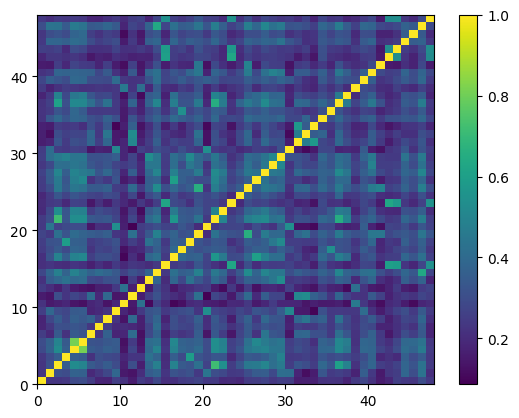

In [62]:
plt.pcolormesh(correl_mat)
plt.colorbar()
plt.show()

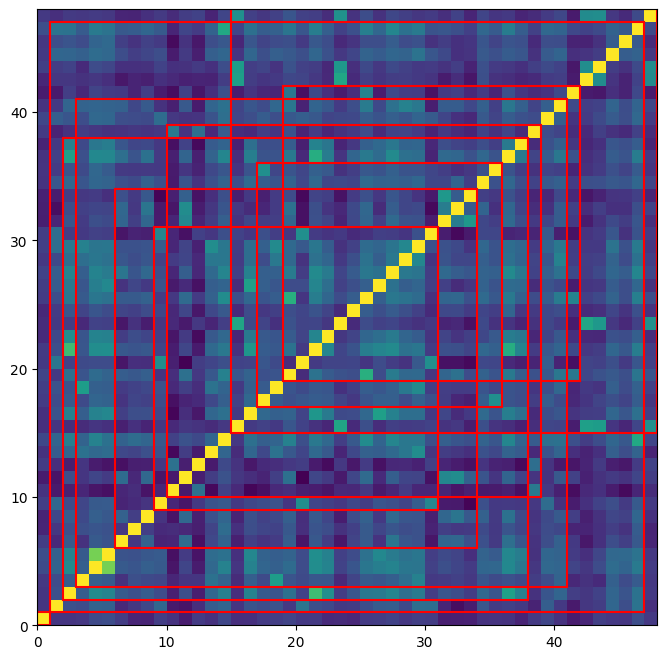

In [63]:
dist = 1 - correl_mat
dim = len(dist)
# print(dim)

tri_a, tri_b = np.triu_indices(dim, k=1)                       ## Puts value =1 in all upper digonal matrix
Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')
permutation = hierarchy.leaves_list(
    hierarchy.optimal_leaf_ordering(Z, dist[tri_a, tri_b]))
ordered_corr = correl_mat[permutation, :][:, permutation]

# assigning asset to respective cluster
nb_clusters = 10
clustering_inds = fcluster(Z, nb_clusters, criterion='maxclust')
clusters = {i: [] for i in range(min(clustering_inds),
                                 max(clustering_inds) + 1)}
for i, v in enumerate(clustering_inds):
    clusters[v].append(i)

plt.figure(figsize=(8, 8))
plt.pcolormesh(correl_mat)
for cluster_id, cluster in clusters.items():
    xmin, xmax = min(cluster), max(cluster)
    ymin, ymax = min(cluster), max(cluster)

    plt.axvline(x=xmin,
                ymin=ymin / dim, ymax=(ymax + 1) / dim,
                color='r')
    plt.axvline(x=xmax + 1,
                ymin=ymin / dim, ymax=(ymax + 1) / dim,
                color='r')
    plt.axhline(y=ymin,
                xmin=xmin / dim, xmax=(xmax + 1) / dim,
                color='r')
    plt.axhline(y=ymax + 1,
                xmin=xmin / dim, xmax=(xmax + 1) / dim,
                color='r')
plt.show()


In [64]:
for id_cluster, cluster in clusters.items():
    print(id_cluster - 1, ':', cluster)


0 : [15, 23, 42, 43, 47]
1 : [9, 20, 30]
2 : [10, 12, 38]
3 : [19, 25, 41]
4 : [6, 8, 11, 31, 32, 33]
5 : [2, 4, 5, 16, 21, 22, 26, 36, 37]
6 : [3, 13, 18, 28, 29, 40]
7 : [17, 35]
8 : [1, 7, 14, 24, 27, 34, 39, 44, 45, 46]
9 : [0]


In [65]:
def seriation(Z, dim, cur_index):
    if cur_index < dim:
        return [cur_index]
    else:
        left = int(Z[cur_index - dim, 0])
        right = int(Z[cur_index - dim, 1])
        return seriation(Z, dim, left) + seriation(Z, dim, right)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [66]:
def compute_allocation(covar, clusters):
    nb_clusters = len(clusters)
    assets_weights = np.array([1.] * len(covar))
    clusters_weights = np.array([1.] * nb_clusters)
    clusters_var = np.array([0.] * nb_clusters)

    for id_cluster, cluster in clusters.items():
        cluster_covar = covar[cluster, :][:, cluster]
        inv_diag = 1 / np.diag(cluster_covar)
        assets_weights[cluster] = inv_diag / np.sum(inv_diag)

    for id_cluster, cluster in clusters.items():
        weights = assets_weights[cluster]
        clusters_var[id_cluster - 1] = np.dot(
            weights, np.dot(covar[cluster, :][:, cluster], weights))

    for merge in range(nb_clusters - 1):
        print('id merge:', merge)
        left = int(Z[dim - 2 - merge, 0])
        right = int(Z[dim - 2 - merge, 1])
        left_cluster = seriation(Z, dim, left)
        right_cluster = seriation(Z, dim, right)

        print(len(left_cluster),
              len(right_cluster))

        ids_left_cluster = []
        ids_right_cluster = []
        for id_cluster, cluster in clusters.items():
            if sorted(intersection(left_cluster, cluster)) == sorted(cluster):
                ids_left_cluster.append(id_cluster)
            if sorted(intersection(right_cluster, cluster)) == sorted(cluster):
                ids_right_cluster.append(id_cluster)


        ids_left_cluster = np.array(ids_left_cluster) - 1
        ids_right_cluster = np.array(ids_right_cluster) - 1
        print(ids_left_cluster)
        print(ids_right_cluster)
        print()

        alpha = 0
        left_cluster_var = np.sum(clusters_var[ids_left_cluster])
        right_cluster_var = np.sum(clusters_var[ids_right_cluster])
        alpha = left_cluster_var / (left_cluster_var + right_cluster_var)

        clusters_weights[ids_left_cluster] = clusters_weights[
            ids_left_cluster] * alpha
        clusters_weights[ids_right_cluster] = clusters_weights[
            ids_right_cluster] * (1 - alpha)

    for id_cluster, cluster in clusters.items():
        assets_weights[cluster] = assets_weights[cluster] * clusters_weights[
            id_cluster - 1]

    return assets_weights

In [67]:
weights_HERC = compute_allocation(correl_mat, clusters)


id merge: 0
11 37
[0 1 2]
[3 4 5 6 7 8 9]

id merge: 1
9 28
[3 4]
[5 6 7 8 9]

id merge: 2
5 6
[0]
[1 2]

id merge: 3
3 3
[1]
[2]

id merge: 4
9 19
[5]
[6 7 8 9]

id merge: 5
3 6
[3]
[4]

id merge: 6
6 13
[6]
[7 8 9]

id merge: 7
2 11
[7]
[8 9]

id merge: 8
1 10
[9]
[8]



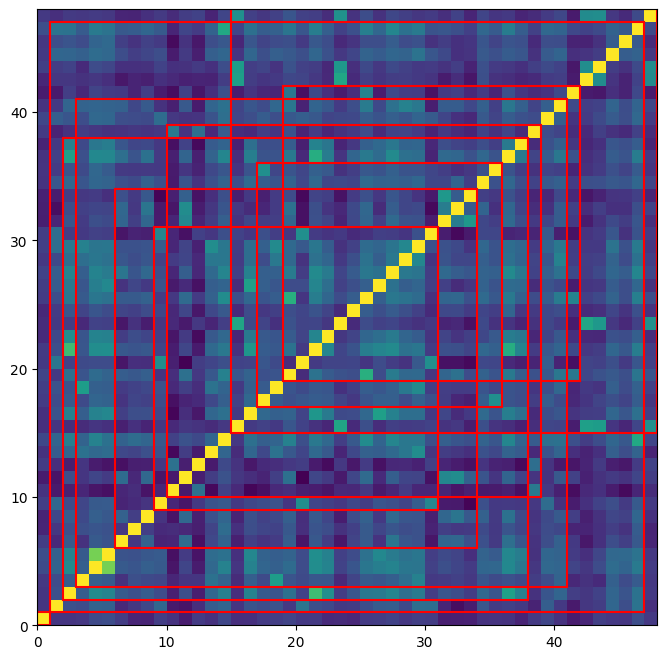

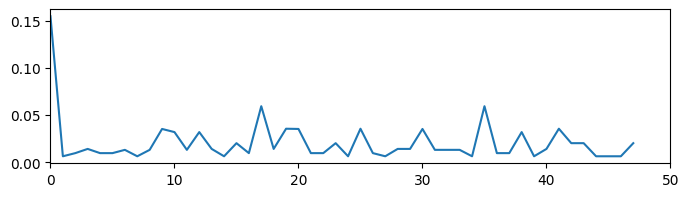

In [68]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(correl_mat)
for cluster_id, cluster in clusters.items():
    xmin, xmax = min(cluster), max(cluster)
    ymin, ymax = min(cluster), max(cluster)

    plt.axvline(x=xmin,
                ymin=ymin / dim, ymax=(ymax+1) / dim,
                color='r')
    plt.axvline(x=xmax+1,
                ymin=ymin / dim, ymax=(ymax+1) / dim,
                color='r')
    plt.axhline(y=ymin,
                xmin=xmin / dim, xmax=(xmax+1) / dim,
                color='r')
    plt.axhline(y=ymax+1,
                xmin=xmin / dim, xmax=(xmax+1) / dim,
                color='r')
plt.show()
plt.figure(figsize=(8, 2))
plt.plot(weights_HERC)
plt.xlim([0, 50])
plt.show()

In [69]:
print(weights_HERC.sum())

1.0


In [70]:
sharpe_ratio_HERC = Sharpe_Ratio(expected_return,cov_matrix,weights_HERC)
print("Sharpe Ratio :- ",sharpe_ratio_HERC)

Sharpe Ratio :-  2.39284638454507


# Compiling all portfolio methods into one for loop



In [71]:
import time
import datetime
from datetime import date

import os
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

In [72]:
! pip install yfinance

In [73]:
import yfinance as yf

In [74]:
!pip install PyPortfolioOpt

In [75]:
!pip install fastcluster

In [76]:
%matplotlib inline

import numpy as np
import fastcluster
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

In [77]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [79]:
# Nifty 50 company list as of 2023   we will need data of nifty50 companies in 2001
df1 = pd.read_excel("/content/NIFTY-FIRMS-REVAMPED.xlsx")

In [80]:
company_list = df1["SYMBOL \n"].tolist()

In [81]:
new_list = []
for elmnt in company_list:
  new_list.append(elmnt + ".NS")

new_list.pop(0)

'NIFTY 50.NS'

In [82]:
def Sharpe_Ratio(er,cov_mat,w):

  monthly_return = er*w
  new_cov = cov_matrix.to_numpy()
  # variance = np.matmul(np.matmul(np.transpose(w),new_cov),w)    ### Old line of code
  variance = np.sqrt(np.matmul(np.matmul(np.transpose(w),new_cov),w))

  sharpe_ratio =  monthly_return.sum()/ math.sqrt(variance)
  return(sharpe_ratio)

In [84]:
data = yf.download(new_list,'2022-01-01','2023-08-01',period = "1mo")['Adj Close']

[*********************100%***********************]  40 of 40 completed


In [86]:
data

Ticker,ADANIENT.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00+00:00,1714.013794,4939.934570,3337.237549,693.329041,3040.009521,7127.192383,681.297241,171.284409,3451.341064,903.354248,...,447.229126,823.037170,729.091309,494.527863,48.207245,3584.807861,2490.153809,7599.804688,740.169067,708.348572
2022-01-04 00:00:00+00:00,1715.860474,4914.297363,3373.219482,706.073608,3051.187500,7249.012695,687.358215,171.217865,3471.280762,897.286560,...,459.293274,812.130676,720.172607,486.577271,48.475193,3647.719971,2548.514160,7527.436523,737.796143,711.108215
2022-01-05 00:00:00+00:00,1712.316895,4922.859863,3439.039795,723.746582,3115.566650,7572.616211,689.871399,175.099609,3491.554443,901.461182,...,467.747711,809.609924,715.055359,486.726318,49.690449,3625.372070,2541.755371,7536.488281,740.459595,703.223450
2022-01-06 00:00:00+00:00,1709.971313,4914.149414,3427.191895,727.131897,3170.901367,7649.075195,700.120911,175.587585,3506.246826,895.102234,...,467.082764,804.277771,707.111389,485.831909,49.084930,3575.136475,2561.241943,7338.717773,758.135742,695.585144
2022-01-07 00:00:00+00:00,1695.996826,4970.966797,3487.307861,727.430542,3147.060303,7561.313477,694.503357,175.765045,3565.636963,888.063782,...,466.655273,803.647644,717.492126,487.571106,48.962563,3618.376465,2538.351562,7436.520996,764.140808,701.252258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25 00:00:00+00:00,2465.655518,5180.494629,3361.945801,961.757751,4809.858887,7568.455566,874.734863,176.786575,4822.825684,1045.881958,...,599.545776,1081.575806,862.602844,635.502136,116.894836,3334.489990,3019.121094,8305.857422,614.778870,399.547882
2023-07-26 00:00:00+00:00,2469.753906,5124.387695,3334.855713,976.046692,4831.185547,7396.020996,880.426880,177.152603,4919.566406,1059.516357,...,605.004333,1098.317261,867.916260,637.141907,117.581009,3323.846680,2998.538574,8265.333984,620.573059,401.892883
2023-07-27 00:00:00+00:00,2427.420898,5183.773926,3331.296143,959.159790,4811.892578,7247.715820,886.118774,173.515305,4810.782227,1161.600708,...,606.381165,1120.984741,844.229553,639.725891,117.433975,3332.282959,2992.308838,8239.387695,615.515442,399.098877


In [87]:
def MV_portfolio(df1_use):
  from pypfopt.efficient_frontier import EfficientFrontier
  from pypfopt import risk_models
  from pypfopt import expected_returns
# from pypfopt.discrete_allocation import DiscreteAllocation, get_weights

# Calculate the expected returns and covariance matrix of the assets
# expected_return = df1_use.mean()
# cov_matrix = df1_use.cov()

  expected_return = expected_returns.ema_historical_return(df1_use)
  cov_matrix = risk_models.sample_cov(df1_use)
  # Create an EfficientFrontier object
  ef = EfficientFrontier(expected_return, cov_matrix)

# Optimize the portfolio for minimum variance
# ef.min_volatility()
  ef.min_volatility()

# Get the optimal weights
  weights_mv = ef.weights

# Print the optimal weights
  return(weights_mv)

In [88]:
def HRP_portfolio(df1_use):
  from pypfopt.hierarchical_portfolio import HRPOpt
  from pypfopt import expected_returns
  from pypfopt import risk_models

  # expected_return = expected_returns.ema_historical_return(df1_use)
  cov_matrix = risk_models.sample_cov(df1_use)

  hrp = HRPOpt(df1_use.pct_change().dropna(),cov_matrix)       ## HRP requires daily return data to calculate weights.
  hrp.optimize()
  weights_hrp = hrp.weights

  return("Weights of assets\n",hrp.weights)

In [90]:
def HERC_portfolio(df1_use):
  # correl_mat = Corr_mat(df1_use)
  # clusters = Clusters(df1_use)
  # weights_HERC = compute_allocation(df1_use, correl_mat, clusters)
  weights_HERC = Clusters(df1_use)
  return(weights_HERC)

##Hierarchical Equall Risk Contribution

In [91]:
!pip install fastcluster

In [92]:
%matplotlib inline

import numpy as np
import fastcluster
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt


In [93]:
def Corr_mat(df1_use):
  cov_matrix = risk_models.sample_cov(df1_use)
  correl_mat = risk_models.cov_to_corr(cov_matrix).to_numpy()
  return(correl_mat)

In [94]:
def Clusters(df1_use):
  def compute_allocation(df1_use, covar, clusters):
    #   correl_mat = Corr_mat(df1_use)
    #   dist = 1 - correl_mat
    #   dimension = len(dist)
    # # print(dim)

    #   tri_a, tri_b = np.triu_indices(dimension, k=1)
    #   Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')


      nb_clusters = len(clusters)
      assets_weights = np.array([1.] * len(covar))
      clusters_weights = np.array([1.] * nb_clusters)
      clusters_var = np.array([0.] * nb_clusters)

      for id_cluster, cluster in clusters.items():
          cluster_covar = covar[cluster, :][:, cluster]
          inv_diag = 1 / np.diag(cluster_covar)
          assets_weights[cluster] = inv_diag / np.sum(inv_diag)

      for id_cluster, cluster in clusters.items():
          weights = assets_weights[cluster]
          clusters_var[id_cluster - 1] = np.dot(
              weights, np.dot(covar[cluster, :][:, cluster], weights))

      for merge in range(nb_clusters - 1):
          # print('id merge:', merge)
          left = int(Z[dim - 2 - merge, 0])
          right = int(Z[dim - 2 - merge, 1])
          left_cluster = seriation(df1_use, dim, left)
          right_cluster = seriation(df1_use, dim, right)

          # print(len(left_cluster),
          #       len(right_cluster))

          ids_left_cluster = []
          ids_right_cluster = []
          for id_cluster, cluster in clusters.items():
              if sorted(intersection(left_cluster, cluster)) == sorted(cluster):
                  ids_left_cluster.append(id_cluster)
              if sorted(intersection(right_cluster, cluster)) == sorted(cluster):
                  ids_right_cluster.append(id_cluster)


          ids_left_cluster = np.array(ids_left_cluster) - 1
          ids_right_cluster = np.array(ids_right_cluster) - 1
          # print(ids_left_cluster)
          # print(ids_right_cluster)
          # print()

          alpha = 0
          left_cluster_var = np.sum(clusters_var[ids_left_cluster])
          right_cluster_var = np.sum(clusters_var[ids_right_cluster])
          alpha = left_cluster_var / (left_cluster_var + right_cluster_var)

          clusters_weights[ids_left_cluster] = clusters_weights[
              ids_left_cluster] * alpha
          clusters_weights[ids_right_cluster] = clusters_weights[
              ids_right_cluster] * (1 - alpha)

      for id_cluster, cluster in clusters.items():
          assets_weights[cluster] = assets_weights[cluster] * clusters_weights[
              id_cluster - 1]

      return assets_weights

  def seriation(df1_use, dim, cur_index):
    #   correl_mat = Corr_mat(df1_use)
    #   dist = 1 - correl_mat
    #   dimension = len(dist)
    # # print(dim)

    #   tri_a, tri_b = np.triu_indices(dimension, k=1)
    #   Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')

      if cur_index < dim:
          return [cur_index]
      else:
          left = int(Z[cur_index - dim, 0])
          right = int(Z[cur_index - dim, 1])
          return seriation(Z, dim, left) + seriation(Z, dim, right)

  def intersection(lst1, lst2):
      return list(set(lst1) & set(lst2))


  correl_mat = Corr_mat(df1_use)
  dist = 1 - correl_mat
  dim = len(dist)
# print(dim)

  tri_a, tri_b = np.triu_indices(dim, k=1)                       ## Puts value =1 in all upper digonal matrix
  Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')
  permutation = hierarchy.leaves_list(
      hierarchy.optimal_leaf_ordering(Z, dist[tri_a, tri_b]))
  ordered_corr = correl_mat[permutation, :][:, permutation]

# assigning asset to respective cluster
  nb_clusters = 10
  clustering_inds = fcluster(Z, nb_clusters, criterion='maxclust')
  clusters = {i: [] for i in range(min(clustering_inds),
                                 max(clustering_inds) + 1)}
  for i, v in enumerate(clustering_inds):
      clusters[v].append(i)

  for cluster_id, cluster in clusters.items():
      xmin, xmax = min(cluster), max(cluster)
      ymin, ymax = min(cluster), max(cluster)

  # return(clusters)

  correl_mat = Corr_mat(df1_use)
  # clusters = Clusters(df1_use)
  weights_HERC = compute_allocation(df1_use, correl_mat, clusters)
  return(weights_HERC)


In [95]:
# def seriation(df1_use, dim, cur_index):
#   #   correl_mat = Corr_mat(df1_use)
#   #   dist = 1 - correl_mat
#   #   dimension = len(dist)
#   # # print(dim)

#   #   tri_a, tri_b = np.triu_indices(dimension, k=1)
#   #   Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')

#     if cur_index < dim:
#         return [cur_index]
#     else:
#         left = int(Z[cur_index - dim, 0])
#         right = int(Z[cur_index - dim, 1])
#         return seriation(Z, dim, left) + seriation(Z, dim, right)

# def intersection(lst1, lst2):
#     return list(set(lst1) & set(lst2))

In [96]:
# def compute_allocation(df1_use, covar, clusters):
#   #   correl_mat = Corr_mat(df1_use)
#   #   dist = 1 - correl_mat
#   #   dimension = len(dist)
#   # # print(dim)

#   #   tri_a, tri_b = np.triu_indices(dimension, k=1)
#   #   Z = fastcluster.linkage(dist[tri_a, tri_b], method='ward')


#     nb_clusters = len(clusters)
#     assets_weights = np.array([1.] * len(covar))
#     clusters_weights = np.array([1.] * nb_clusters)
#     clusters_var = np.array([0.] * nb_clusters)

#     for id_cluster, cluster in clusters.items():
#         cluster_covar = covar[cluster, :][:, cluster]
#         inv_diag = 1 / np.diag(cluster_covar)
#         assets_weights[cluster] = inv_diag / np.sum(inv_diag)

#     for id_cluster, cluster in clusters.items():
#         weights = assets_weights[cluster]
#         clusters_var[id_cluster - 1] = np.dot(
#             weights, np.dot(covar[cluster, :][:, cluster], weights))

#     for merge in range(nb_clusters - 1):
#         print('id merge:', merge)
#         left = int(Z[dim - 2 - merge, 0])
#         right = int(Z[dim - 2 - merge, 1])
#         left_cluster = seriation(df1_use, dim, left)
#         right_cluster = seriation(df1_use, dim, right)

#         print(len(left_cluster),
#               len(right_cluster))

#         ids_left_cluster = []
#         ids_right_cluster = []
#         for id_cluster, cluster in clusters.items():
#             if sorted(intersection(left_cluster, cluster)) == sorted(cluster):
#                 ids_left_cluster.append(id_cluster)
#             if sorted(intersection(right_cluster, cluster)) == sorted(cluster):
#                 ids_right_cluster.append(id_cluster)


#         ids_left_cluster = np.array(ids_left_cluster) - 1
#         ids_right_cluster = np.array(ids_right_cluster) - 1
#         print(ids_left_cluster)
#         print(ids_right_cluster)
#         print()

#         alpha = 0
#         left_cluster_var = np.sum(clusters_var[ids_left_cluster])
#         right_cluster_var = np.sum(clusters_var[ids_right_cluster])
#         alpha = left_cluster_var / (left_cluster_var + right_cluster_var)

#         clusters_weights[ids_left_cluster] = clusters_weights[
#             ids_left_cluster] * alpha
#         clusters_weights[ids_right_cluster] = clusters_weights[
#             ids_right_cluster] * (1 - alpha)

#     for id_cluster, cluster in clusters.items():
#         assets_weights[cluster] = assets_weights[cluster] * clusters_weights[
#             id_cluster - 1]

#     return assets_weights

In [97]:
def HERC_portfolio(df1_use):
  # correl_mat = Corr_mat(df1_use)
  # clusters = Clusters(df1_use)
  # weights_HERC = compute_allocation(df1_use, correl_mat, clusters)
  weights_HERC = Clusters(df1_use)
  return(weights_HERC)

# Main Function

## Solve for
july-aug 2005 : Please check your objectives/constraints or use a different solver.

April 2008 : Problem in HRP(The condensed distance matrix must contain only finite values.)
Oct 2008 : Please check your objectives/constraints or use a different solver.

Nov 2014 :  math domain error

March 2020 : Please check your objectives/constraints or use a different solver.

In [98]:
# Initialize an empty dataframe
import pandas as pd
Price_data = pd.DataFrame()
sr_month = pd.DataFrame()
ls_mv = []
ls_ew = []
ls_hrp =[]
ls_herc= []

for year in range(2005, 2006):
  for mnth in range(7,9):
    if (mnth ==12):
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start='2005-01-01', end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
    else:
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start="2005-01-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']

## Minimum Variance Portfolio
    weights_mv_temp = MV_portfolio(current_month_data)
    expected_return = expected_returns.ema_historical_return(current_month_data)
    cov_matrix = risk_models.sample_cov(current_month_data)
    ls_mv.append(weights_mv_temp)
    # print("Cov_Matrix",cov_matrix)

# ## Equal Weight Portfolio
    weights_ew_temp = np.repeat(1/len(current_month_data.columns), len(current_month_data.columns))
    ls_ew.append(weights_ew_temp)

# ## Hierarchical Risk Parity Portfolio
    weights_hrp_temp = HRP_portfolio(current_month_data)
    # weights_hrp_temp = np.array(weights_hrp_temp.iloc[:,1]).T
    ls_hrp.append(weights_hrp_temp)

## Hierarchical Equal Risk Contribution Portfolio
    weights_herc_temp = HERC_portfolio(current_month_data)
    ls_herc.append(weights_herc_temp)

    srt_month =pd.DataFrame(columns = ['Min_Var','Equal_Weight','HERC'])

    sharpe_mv = Sharpe_Ratio(expected_return,cov_matrix,weights_mv_temp)
    sharpe_ew = Sharpe_Ratio(expected_return,cov_matrix,weights_ew_temp)

## Figuring out for sharpe ratio calculation for HRP portfolio
    weights_hrp_temp_list = list(weights_hrp_temp)
    # print(weights_hrp_temp_list[1])

    sharpe_hrp = Sharpe_Ratio(expected_return,cov_matrix,weights_hrp_temp_list[1])

    sharpe_herc = Sharpe_Ratio(expected_return,cov_matrix,weights_herc_temp)

    row = {'Min_Var': sharpe_mv ,'Equal_Weight': sharpe_ew,'HRP' :sharpe_hrp,'HERC': sharpe_herc}
    # sr_month = sr_month.append(row, ignore_index = True)
    # print(srt_month)
    sr_month = pd.concat([sr_month, pd.DataFrame([row])], ignore_index=True)
    print(sr_month)
weights_mv = pd.DataFrame(ls_mv)
weights_ew = pd.DataFrame(ls_ew)
weights_hrp = pd.DataFrame(ls_hrp)
weights_herc= pd.DataFrame(ls_herc)


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.67782204 0.67782204 0.67782204 0.67782204 0.67782204 0.67782204
 0.67782204 0.67782204 0.67782204 0.67782204 0.67782204 0.67782204
 0.67782204 0.67782204 0.67782204 0.67782204 0.67782204 0.67782204
 0.67782204 0.67782204]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


    Min_Var  Equal_Weight           HRP          HERC
0  1.872225  3.900217e+07  68298.800562  3.015969e+07


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.67167819 0.67167819 0.67167819 0.67167819 0.67167819 0.67167819
 0.67167819 0.67167819 0.67167819 0.67167819 0.67167819 0.67167819
 0.67167819 0.67167819 0.67167819 0.67167819 0.67167819 0.67167819
 0.67167819 0.67167819]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


    Min_Var  Equal_Weight           HRP          HERC
0  1.872225  3.900217e+07  68298.800562  3.015969e+07
1  2.071844  1.220605e+06   1677.087996  9.603242e+05


In [100]:
# Initialize an empty dataframe
import pandas as pd
Price_data = pd.DataFrame()
sr_month = pd.DataFrame()
ls_mv = []
ls_ew = []
ls_hrp =[]
ls_herc= []

for year in range(2013, 2024):
  for mnth in range(1,13):
    if (mnth ==12):
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start='2013-01-01', end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
    else:
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start="2013-01-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']

## Minimum Variance Portfolio
    weights_mv_temp = MV_portfolio(current_month_data)
    expected_return = expected_returns.ema_historical_return(current_month_data)
    cov_matrix = risk_models.sample_cov(current_month_data)
    ls_mv.append(weights_mv_temp)
    # print("Cov_Matrix",cov_matrix)

# ## Equal Weight Portfolio
    weights_ew_temp = np.repeat(1/len(current_month_data.columns), len(current_month_data.columns))
    ls_ew.append(weights_ew_temp)

# ## Hierarchical Risk Parity Portfolio
    weights_hrp_temp = HRP_portfolio(current_month_data)
    # weights_hrp_temp = np.array(weights_hrp_temp.iloc[:,1]).T
    ls_hrp.append(weights_hrp_temp)

## Hierarchical Equal Risk Contribution Portfolio
    weights_herc_temp = HERC_portfolio(current_month_data)
    ls_herc.append(weights_herc_temp)

    srt_month =pd.DataFrame(columns = ['Min_Var','Equal_Weight','HERC'])

    sharpe_mv = Sharpe_Ratio(expected_return,cov_matrix,weights_mv_temp)
    sharpe_ew = Sharpe_Ratio(expected_return,cov_matrix,weights_ew_temp)

## Figuring out for sharpe ratio calculation for HRP portfolio
    weights_hrp_temp_list = list(weights_hrp_temp)
    # print(weights_hrp_temp_list[1])

    sharpe_hrp = Sharpe_Ratio(expected_return,cov_matrix,weights_hrp_temp_list[1])

    sharpe_herc = Sharpe_Ratio(expected_return,cov_matrix,weights_herc_temp)

    row = {'Min_Var': sharpe_mv ,'Equal_Weight': sharpe_ew,'HRP' :sharpe_hrp,'HERC': sharpe_herc}
    # sr_month = sr_month.append(row, ignore_index = True)
    # print(srt_month)
    sr_month = pd.concat([sr_month, pd.DataFrame([row])], ignore_index=True)
    print(sr_month)
weights_mv = pd.DataFrame(ls_mv)
weights_ew = pd.DataFrame(ls_ew)
weights_hrp = pd.DataFrame(ls_hrp)
weights_herc= pd.DataFrame(ls_herc)


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7586478 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478
 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478
 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478 0.7586478]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

   Min_Var  Equal_Weight       HRP      HERC
0  2.83325      2.790863  1.126513  4.771147


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68808692 0.68808692 0.68808692 0.68808692 0.68808692 0.68808692
 0.68808692 0.68808692 0.68808692 0.68808692 0.68808692 0.68808692
 0.68808692 0.68808692 0.68808692 0.68808692 0.68808692 0.68808692
 0.68808692 0.68808692]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.74667281 0.74667281 0.74667281 0.74667281 0.74667281 0.74667281
 0.74667281 0.74667281 0.74667281 0.74667281 0.74667281 0.74667281
 0.74667281 0.74667281 0.74667281 0.74667281 0.74667281 0.74667281
 0.74667281 0.74667281]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.75562688 0.75562688 0.75562688 0.75562688 0.75562688 0.75562688
 0.75562688 0.75562688 0.75562688 0.75562688 0.75562688 0.75562688
 0.75562688 0.75562688 0.75562688 0.75562688 0.75562688 0.75562688
 0.75562688 0.75562688]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7034557 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557
 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557
 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557 0.7034557]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.72126174 0.72126174 0.72126174 0.72126174 0.72126174 0.72126174
 0.72126174 0.72126174 0.72126174 0.72126174 0.72126174 0.72126174
 0.72126174 0.72126174 0.72126174 0.72126174 0.72126174 0.72126174
 0.72126174 0.72126174]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818
5  0.983676      0.391755  0.660929  0.563053


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6863743 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743
 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743
 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743 0.6863743]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818
5  0.983676      0.391755  0.660929  0.563053
6  1.505215      0.442476  0.928019  0.709200


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61122338 0.61122338 0.61122338 0.61122338 0.61122338 0.61122338
 0.61122338 0.61122338 0.61122338 0.61122338 0.61122338 0.61122338
 0.61122338 0.61122338 0.61122338 0.61122338 0.61122338 0.61122338
 0.61122338 0.61122338]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818
5  0.983676      0.391755  0.660929  0.563053
6  1.505215      0.442476  0.928019  0.709200
7  1.062158      0.223978  0.576919  0.265561


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64779562 0.64779562 0.64779562 0.64779562 0.64779562 0.64779562
 0.64779562 0.64779562 0.64779562 0.64779562 0.64779562 0.64779562
 0.64779562 0.64779562 0.64779562 0.64779562 0.64779562 0.64779562
 0.64779562 0.64779562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818
5  0.983676      0.391755  0.660929  0.563053
6  1.505215      0.442476  0.928019  0.709200
7  1.062158      0.223978  0.576919  0.265561
8  1.374557      0.506903  0.778600  0.632610


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69479504 0.69479504 0.69479504 0.69479504 0.69479504 0.69479504
 0.69479504 0.69479504 0.69479504 0.69479504 0.69479504 0.69479504
 0.69479504 0.69479504 0.69479504 0.69479504 0.69479504 0.69479504
 0.69479504 0.69479504]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

    Min_Var  Equal_Weight       HRP      HERC
0  2.833250      2.790863  1.126513  4.771147
1  1.402575     -0.134851 -0.357034  0.382024
2  0.980823     -0.148900  0.335734 -0.071615
3  1.289678      0.429038  0.791579  0.572363
4  1.542035      0.803525  1.170271  1.273818
5  0.983676      0.391755  0.660929  0.563053
6  1.505215      0.442476  0.928019  0.709200
7  1.062158      0.223978  0.576919  0.265561
8  1.374557      0.506903  0.778600  0.632610
9  1.463043      0.927851  1.205195  1.129084


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70515092 0.70515092 0.70515092 0.70515092 0.70515092 0.70515092
 0.70515092 0.70515092 0.70515092 0.70515092 0.70515092 0.70515092
 0.70515092 0.70515092 0.70515092 0.70515092 0.70515092 0.70515092
 0.70515092 0.70515092]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69549261 0.69549261 0.69549261 0.69549261 0.69549261 0.69549261
 0.69549261 0.69549261 0.69549261 0.69549261 0.69549261 0.69549261
 0.69549261 0.69549261 0.69549261 0.69549261 0.69549261 0.69549261
 0.69549261 0.69549261]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69351028 0.69351028 0.69351028 0.69351028 0.69351028 0.69351028
 0.69351028 0.69351028 0.69351028 0.69351028 0.69351028 0.69351028
 0.69351028 0.69351028 0.69351028 0.69351028 0.69351028 0.69351028
 0.69351028 0.69351028]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.73008108 0.73008108 0.73008108 0.73008108 0.73008108 0.73008108
 0.73008108 0.73008108 0.73008108 0.73008108 0.73008108 0.73008108
 0.73008108 0.73008108 0.73008108 0.73008108 0.73008108 0.73008108
 0.73008108 0.73008108]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70349756 0.70349756 0.70349756 0.70349756 0.70349756 0.70349756
 0.70349756 0.70349756 0.70349756 0.70349756 0.70349756 0.70349756
 0.70349756 0.70349756 0.70349756 0.70349756 0.70349756 0.70349756
 0.70349756 0.70349756]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7336042 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042
 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042
 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042 0.7336042]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.73543537 0.73543537 0.73543537 0.73543537 0.73543537 0.73543537
 0.73543537 0.73543537 0.73543537 0.73543537 0.73543537 0.73543537
 0.73543537 0.73543537 0.73543537 0.73543537 0.73543537 0.73543537
 0.73543537 0.73543537]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.72295052 0.72295052 0.72295052 0.72295052 0.72295052 0.72295052
 0.72295052 0.72295052 0.72295052 0.72295052 0.72295052 0.72295052
 0.72295052 0.72295052 0.72295052 0.72295052 0.72295052 0.72295052
 0.72295052 0.72295052]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.73174279 0.73174279 0.73174279 0.73174279 0.73174279 0.73174279
 0.73174279 0.73174279 0.73174279 0.73174279 0.73174279 0.73174279
 0.73174279 0.73174279 0.73174279 0.73174279 0.73174279 0.73174279
 0.73174279 0.73174279]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.73198608 0.73198608 0.73198608 0.73198608 0.73198608 0.73198608
 0.73198608 0.73198608 0.73198608 0.73198608 0.73198608 0.73198608
 0.73198608 0.73198608 0.73198608 0.73198608 0.73198608 0.73198608
 0.73198608 0.73198608]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.72985709 0.72985709 0.72985709 0.72985709 0.72985709 0.72985709
 0.72985709 0.72985709 0.72985709 0.72985709 0.72985709 0.72985709
 0.72985709 0.72985709 0.72985709 0.72985709 0.72985709 0.72985709
 0.72985709 0.72985709]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64144883 0.64144883 0.64144883 0.64144883 0.64144883 0.64144883
 0.64144883 0.64144883 0.64144883 0.64144883 0.64144883 0.64144883
 0.64144883 0.64144883 0.64144883 0.64144883 0.64144883 0.64144883
 0.64144883 0.64144883]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.72846048 0.72846048 0.72846048 0.72846048 0.72846048 0.72846048
 0.72846048 0.72846048 0.72846048 0.72846048 0.72846048 0.72846048
 0.72846048 0.72846048 0.72846048 0.72846048 0.72846048 0.72846048
 0.72846048 0.72846048]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63671253 0.63671253 0.63671253 0.63671253 0.63671253 0.63671253
 0.63671253 0.63671253 0.63671253 0.63671253 0.63671253 0.63671253
 0.63671253 0.63671253 0.63671253 0.63671253 0.63671253 0.63671253
 0.63671253 0.63671253]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63936274 0.63936274 0.63936274 0.63936274 0.63936274 0.63936274
 0.63936274 0.63936274 0.63936274 0.63936274 0.63936274 0.63936274
 0.63936274 0.63936274 0.63936274 0.63936274 0.63936274 0.63936274
 0.63936274 0.63936274]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63854019 0.63854019 0.63854019 0.63854019 0.63854019 0.63854019
 0.63854019 0.63854019 0.63854019 0.63854019 0.63854019 0.63854019
 0.63854019 0.63854019 0.63854019 0.63854019 0.63854019 0.63854019
 0.63854019 0.63854019]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7153343 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343
 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343
 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343 0.7153343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70019825 0.70019825 0.70019825 0.70019825 0.70019825 0.70019825
 0.70019825 0.70019825 0.70019825 0.70019825 0.70019825 0.70019825
 0.70019825 0.70019825 0.70019825 0.70019825 0.70019825 0.70019825
 0.70019825 0.70019825]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70633383 0.70633383 0.70633383 0.70633383 0.70633383 0.70633383
 0.70633383 0.70633383 0.70633383 0.70633383 0.70633383 0.70633383
 0.70633383 0.70633383 0.70633383 0.70633383 0.70633383 0.70633383
 0.70633383 0.70633383]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70193522 0.70193522 0.70193522 0.70193522 0.70193522 0.70193522
 0.70193522 0.70193522 0.70193522 0.70193522 0.70193522 0.70193522
 0.70193522 0.70193522 0.70193522 0.70193522 0.70193522 0.70193522
 0.70193522 0.70193522]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.70044668 0.70044668 0.70044668 0.70044668 0.70044668 0.70044668
 0.70044668 0.70044668 0.70044668 0.70044668 0.70044668 0.70044668
 0.70044668 0.70044668 0.70044668 0.70044668 0.70044668 0.70044668
 0.70044668 0.70044668]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69544526 0.69544526 0.69544526 0.69544526 0.69544526 0.69544526
 0.69544526 0.69544526 0.69544526 0.69544526 0.69544526 0.69544526
 0.69544526 0.69544526 0.69544526 0.69544526 0.69544526 0.69544526
 0.69544526 0.69544526]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69785448 0.69785448 0.69785448 0.69785448 0.69785448 0.69785448
 0.69785448 0.69785448 0.69785448 0.69785448 0.69785448 0.69785448
 0.69785448 0.69785448 0.69785448 0.69785448 0.69785448 0.69785448
 0.69785448 0.69785448]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69977042 0.69977042 0.69977042 0.69977042 0.69977042 0.69977042
 0.69977042 0.69977042 0.69977042 0.69977042 0.69977042 0.69977042
 0.69977042 0.69977042 0.69977042 0.69977042 0.69977042 0.69977042
 0.69977042 0.69977042]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69704325 0.69704325 0.69704325 0.69704325 0.69704325 0.69704325
 0.69704325 0.69704325 0.69704325 0.69704325 0.69704325 0.69704325
 0.69704325 0.69704325 0.69704325 0.69704325 0.69704325 0.69704325
 0.69704325 0.69704325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6957128 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128
 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128
 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128 0.6957128]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6946557 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557
 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557
 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557 0.6946557]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69276071 0.69276071 0.69276071 0.69276071 0.69276071 0.69276071
 0.69276071 0.69276071 0.69276071 0.69276071 0.69276071 0.69276071
 0.69276071 0.69276071 0.69276071 0.69276071 0.69276071 0.69276071
 0.69276071 0.69276071]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68953271 0.68953271 0.68953271 0.68953271 0.68953271 0.68953271
 0.68953271 0.68953271 0.68953271 0.68953271 0.68953271 0.68953271
 0.68953271 0.68953271 0.68953271 0.68953271 0.68953271 0.68953271
 0.68953271 0.68953271]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68877846 0.68877846 0.68877846 0.68877846 0.68877846 0.68877846
 0.68877846 0.68877846 0.68877846 0.68877846 0.68877846 0.68877846
 0.68877846 0.68877846 0.68877846 0.68877846 0.68877846 0.68877846
 0.68877846 0.68877846]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68706759 0.68706759 0.68706759 0.68706759 0.68706759 0.68706759
 0.68706759 0.68706759 0.68706759 0.68706759 0.68706759 0.68706759
 0.68706759 0.68706759 0.68706759 0.68706759 0.68706759 0.68706759
 0.68706759 0.68706759]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68658208 0.68658208 0.68658208 0.68658208 0.68658208 0.68658208
 0.68658208 0.68658208 0.68658208 0.68658208 0.68658208 0.68658208
 0.68658208 0.68658208 0.68658208 0.68658208 0.68658208 0.68658208
 0.68658208 0.68658208]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6863794 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794
 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794
 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794 0.6863794]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63159179 0.63159179 0.63159179 0.63159179 0.63159179 0.63159179
 0.63159179 0.63159179 0.63159179 0.63159179 0.63159179 0.63159179
 0.63159179 0.63159179 0.63159179 0.63159179 0.63159179 0.63159179
 0.63159179 0.63159179]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63051199 0.63051199 0.63051199 0.63051199 0.63051199 0.63051199
 0.63051199 0.63051199 0.63051199 0.63051199 0.63051199 0.63051199
 0.63051199 0.63051199 0.63051199 0.63051199 0.63051199 0.63051199
 0.63051199 0.63051199]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62947132 0.62947132 0.62947132 0.62947132 0.62947132 0.62947132
 0.62947132 0.62947132 0.62947132 0.62947132 0.62947132 0.62947132
 0.62947132 0.62947132 0.62947132 0.62947132 0.62947132 0.62947132
 0.62947132 0.62947132]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62469822 0.62469822 0.62469822 0.62469822 0.62469822 0.62469822
 0.62469822 0.62469822 0.62469822 0.62469822 0.62469822 0.62469822
 0.62469822 0.62469822 0.62469822 0.62469822 0.62469822 0.62469822
 0.62469822 0.62469822]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62650314 0.62650314 0.62650314 0.62650314 0.62650314 0.62650314
 0.62650314 0.62650314 0.62650314 0.62650314 0.62650314 0.62650314
 0.62650314 0.62650314 0.62650314 0.62650314 0.62650314 0.62650314
 0.62650314 0.62650314]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62620191 0.62620191 0.62620191 0.62620191 0.62620191 0.62620191
 0.62620191 0.62620191 0.62620191 0.62620191 0.62620191 0.62620191
 0.62620191 0.62620191 0.62620191 0.62620191 0.62620191 0.62620191
 0.62620191 0.62620191]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6826366 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366
 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366
 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366 0.6826366]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62729348 0.62729348 0.62729348 0.62729348 0.62729348 0.62729348
 0.62729348 0.62729348 0.62729348 0.62729348 0.62729348 0.62729348
 0.62729348 0.62729348 0.62729348 0.62729348 0.62729348 0.62729348
 0.62729348 0.62729348]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68220112 0.68220112 0.68220112 0.68220112 0.68220112 0.68220112
 0.68220112 0.68220112 0.68220112 0.68220112 0.68220112 0.68220112
 0.68220112 0.68220112 0.68220112 0.68220112 0.68220112 0.68220112
 0.68220112 0.68220112]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68164843 0.68164843 0.68164843 0.68164843 0.68164843 0.68164843
 0.68164843 0.68164843 0.68164843 0.68164843 0.68164843 0.68164843
 0.68164843 0.68164843 0.68164843 0.68164843 0.68164843 0.68164843
 0.68164843 0.68164843]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.68109604 0.68109604 0.68109604 0.68109604 0.68109604 0.68109604
 0.68109604 0.68109604 0.68109604 0.68109604 0.68109604 0.68109604
 0.68109604 0.68109604 0.68109604 0.68109604 0.68109604 0.68109604
 0.68109604 0.68109604]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.67916354 0.67916354 0.67916354 0.67916354 0.67916354 0.67916354
 0.67916354 0.67916354 0.67916354 0.67916354 0.67916354 0.67916354
 0.67916354 0.67916354 0.67916354 0.67916354 0.67916354 0.67916354
 0.67916354 0.67916354]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66408164 0.66408164 0.66408164 0.66408164 0.66408164 0.66408164
 0.66408164 0.66408164 0.66408164 0.66408164 0.66408164 0.66408164
 0.66408164 0.66408164 0.66408164 0.66408164 0.66408164 0.66408164
 0.66408164 0.66408164]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65855954 0.65855954 0.65855954 0.65855954 0.65855954 0.65855954
 0.65855954 0.65855954 0.65855954 0.65855954 0.65855954 0.65855954
 0.65855954 0.65855954 0.65855954 0.65855954 0.65855954 0.65855954
 0.65855954 0.65855954]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65758562 0.65758562 0.65758562 0.65758562 0.65758562 0.65758562
 0.65758562 0.65758562 0.65758562 0.65758562 0.65758562 0.65758562
 0.65758562 0.65758562 0.65758562 0.65758562 0.65758562 0.65758562
 0.65758562 0.65758562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65716191 0.65716191 0.65716191 0.65716191 0.65716191 0.65716191
 0.65716191 0.65716191 0.65716191 0.65716191 0.65716191 0.65716191
 0.65716191 0.65716191 0.65716191 0.65716191 0.65716191 0.65716191
 0.65716191 0.65716191]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65660273 0.65660273 0.65660273 0.65660273 0.65660273 0.65660273
 0.65660273 0.65660273 0.65660273 0.65660273 0.65660273 0.65660273
 0.65660273 0.65660273 0.65660273 0.65660273 0.65660273 0.65660273
 0.65660273 0.65660273]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
5   0.983676      0.391755  0.660929  0.563053
6   1.505215      0.442476  0.928019  0.709200
7   1.062158      0.223978  0.576919  0.265561
8   1.374557      0.506903  0.778600  0.632610
9   1.463043      0.927851  1.205195  1.129084
10  1.273094      0.807001  0.972286  1.141907
11  1.376516      0.879017  1.080849  1.225126
12  1.193706      0.613169  0.846649  0.913844
13  1.286085      0.694236  0.908667  1.069619
14  1.108211      0.976914  0.928966  1.376537
15  1.021550      0.965695  0.936752  1.347744
16  1.124638      1.268406  1.098018  1.521227
17  1.490437      1.512706  1.438073  1.953282
18  1.562898      1.491453  1.457441  1.871450
19  1.773327      1.601263  1.612421  2.070581
20  1.980038 

[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65556986 0.65556986 0.65556986 0.65556986 0.65556986 0.65556986
 0.65556986 0.65556986 0.65556986 0.65556986 0.65556986 0.65556986
 0.65556986 0.65556986 0.65556986 0.65556986 0.65556986 0.65556986
 0.65556986 0.65556986]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
56  0.527161      0.695884  0.615500  0.738253
57  0.668904      0.862796  0.795343  0.917555
58  0.630724      0.820646  0.753072  0.857700
59  0.704678      0.896442  0.834410  0.916218
60  0.670955      0.848272  0.780500  0.830896

[61 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65653819 0.65653819 0.65653819 0.65653819 0.65653819 0.65653819
 0.65653819 0.65653819 0.65653819 0.65653819 0.65653819 0.65653819
 0.65653819 0.65653819 0.65653819 0.65653819 0.65653819 0.65653819
 0.65653819 0.65653819]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
57  0.668904      0.862796  0.795343  0.917555
58  0.630724      0.820646  0.753072  0.857700
59  0.704678      0.896442  0.834410  0.916218
60  0.670955      0.848272  0.780500  0.830896
61  0.544006      0.656014  0.602965  0.679226

[62 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65639004 0.65639004 0.65639004 0.65639004 0.65639004 0.65639004
 0.65639004 0.65639004 0.65639004 0.65639004 0.65639004 0.65639004
 0.65639004 0.65639004 0.65639004 0.65639004 0.65639004 0.65639004
 0.65639004 0.65639004]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
58  0.630724      0.820646  0.753072  0.857700
59  0.704678      0.896442  0.834410  0.916218
60  0.670955      0.848272  0.780500  0.830896
61  0.544006      0.656014  0.602965  0.679226
62  0.432267      0.496745  0.487474  0.549231

[63 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64810726 0.64810726 0.64810726 0.64810726 0.64810726 0.64810726
 0.64810726 0.64810726 0.64810726 0.64810726 0.64810726 0.64810726
 0.64810726 0.64810726 0.64810726 0.64810726 0.64810726 0.64810726
 0.64810726 0.64810726]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
59  0.704678      0.896442  0.834410  0.916218
60  0.670955      0.848272  0.780500  0.830896
61  0.544006      0.656014  0.602965  0.679226
62  0.432267      0.496745  0.487474  0.549231
63  0.639009      0.648638  0.691274  0.716831

[64 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65434913 0.65434913 0.65434913 0.65434913 0.65434913 0.65434913
 0.65434913 0.65434913 0.65434913 0.65434913 0.65434913 0.65434913
 0.65434913 0.65434913 0.65434913 0.65434913 0.65434913 0.65434913
 0.65434913 0.65434913]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
60  0.670955      0.848272  0.780500  0.830896
61  0.544006      0.656014  0.602965  0.679226
62  0.432267      0.496745  0.487474  0.549231
63  0.639009      0.648638  0.691274  0.716831
64  0.562588      0.530161  0.571049  0.606777

[65 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62885722 0.62885722 0.62885722 0.62885722 0.62885722 0.62885722
 0.62885722 0.62885722 0.62885722 0.62885722 0.62885722 0.62885722
 0.62885722 0.62885722 0.62885722 0.62885722 0.62885722 0.62885722
 0.62885722 0.62885722]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
61  0.544006      0.656014  0.602965  0.679226
62  0.432267      0.496745  0.487474  0.549231
63  0.639009      0.648638  0.691274  0.716831
64  0.562588      0.530161  0.571049  0.606777
65  0.597243      0.492620  0.577467  0.591760

[66 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65199608 0.65199608 0.65199608 0.65199608 0.65199608 0.65199608
 0.65199608 0.65199608 0.65199608 0.65199608 0.65199608 0.65199608
 0.65199608 0.65199608 0.65199608 0.65199608 0.65199608 0.65199608
 0.65199608 0.65199608]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
62  0.432267      0.496745  0.487474  0.549231
63  0.639009      0.648638  0.691274  0.716831
64  0.562588      0.530161  0.571049  0.606777
65  0.597243      0.492620  0.577467  0.591760
66  0.690559      0.663828  0.693232  0.754623

[67 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.63059875 0.63059875 0.63059875 0.63059875 0.63059875 0.63059875
 0.63059875 0.63059875 0.63059875 0.63059875 0.63059875 0.63059875
 0.63059875 0.63059875 0.63059875 0.63059875 0.63059875 0.63059875
 0.63059875 0.63059875]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
63  0.639009      0.648638  0.691274  0.716831
64  0.562588      0.530161  0.571049  0.606777
65  0.597243      0.492620  0.577467  0.591760
66  0.690559      0.663828  0.693232  0.754623
67  0.807154      0.779088  0.808322  0.872135

[68 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62973555 0.62973555 0.62973555 0.62973555 0.62973555 0.62973555
 0.62973555 0.62973555 0.62973555 0.62973555 0.62973555 0.62973555
 0.62973555 0.62973555 0.62973555 0.62973555 0.62973555 0.62973555
 0.62973555 0.62973555]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
64  0.562588      0.530161  0.571049  0.606777
65  0.597243      0.492620  0.577467  0.591760
66  0.690559      0.663828  0.693232  0.754623
67  0.807154      0.779088  0.808322  0.872135
68  0.634721      0.514810  0.546507  0.539358

[69 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.62080304 0.62080304 0.62080304 0.62080304 0.62080304 0.62080304
 0.62080304 0.62080304 0.62080304 0.62080304 0.62080304 0.62080304
 0.62080304 0.62080304 0.62080304 0.62080304 0.62080304 0.62080304
 0.62080304 0.62080304]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
65  0.597243      0.492620  0.577467  0.591760
66  0.690559      0.663828  0.693232  0.754623
67  0.807154      0.779088  0.808322  0.872135
68  0.634721      0.514810  0.546507  0.539358
69  0.454871      0.402495  0.398526  0.362630

[70 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61987205 0.61987205 0.61987205 0.61987205 0.61987205 0.61987205
 0.61987205 0.61987205 0.61987205 0.61987205 0.61987205 0.61987205
 0.61987205 0.61987205 0.61987205 0.61987205 0.61987205 0.61987205
 0.61987205 0.61987205]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
66  0.690559      0.663828  0.693232  0.754623
67  0.807154      0.779088  0.808322  0.872135
68  0.634721      0.514810  0.546507  0.539358
69  0.454871      0.402495  0.398526  0.362630
70  0.535754      0.481959  0.495647  0.491907

[71 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61807146 0.61807146 0.61807146 0.61807146 0.61807146 0.61807146
 0.61807146 0.61807146 0.61807146 0.61807146 0.61807146 0.61807146
 0.61807146 0.61807146 0.61807146 0.61807146 0.61807146 0.61807146
 0.61807146 0.61807146]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
67  0.807154      0.779088  0.808322  0.872135
68  0.634721      0.514810  0.546507  0.539358
69  0.454871      0.402495  0.398526  0.362630
70  0.535754      0.481959  0.495647  0.491907
71  0.489969      0.444409  0.463066  0.451940

[72 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61820116 0.61820116 0.61820116 0.61820116 0.61820116 0.61820116
 0.61820116 0.61820116 0.61820116 0.61820116 0.61820116 0.61820116
 0.61820116 0.61820116 0.61820116 0.61820116 0.61820116 0.61820116
 0.61820116 0.61820116]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
68  0.634721      0.514810  0.546507  0.539358
69  0.454871      0.402495  0.398526  0.362630
70  0.535754      0.481959  0.495647  0.491907
71  0.489969      0.444409  0.463066  0.451940
72  0.485186      0.354298  0.416043  0.373795

[73 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61641905 0.61641905 0.61641905 0.61641905 0.61641905 0.61641905
 0.61641905 0.61641905 0.61641905 0.61641905 0.61641905 0.61641905
 0.61641905 0.61641905 0.61641905 0.61641905 0.61641905 0.61641905
 0.61641905 0.61641905]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
69  0.454871      0.402495  0.398526  0.362630
70  0.535754      0.481959  0.495647  0.491907
71  0.489969      0.444409  0.463066  0.451940
72  0.485186      0.354298  0.416043  0.373795
73  0.456560      0.351120  0.411207  0.362222

[74 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64728585 0.64728585 0.64728585 0.64728585 0.64728585 0.64728585
 0.64728585 0.64728585 0.64728585 0.64728585 0.64728585 0.64728585
 0.64728585 0.64728585 0.64728585 0.64728585 0.64728585 0.64728585
 0.64728585 0.64728585]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
70  0.535754      0.481959  0.495647  0.491907
71  0.489969      0.444409  0.463066  0.451940
72  0.485186      0.354298  0.416043  0.373795
73  0.456560      0.351120  0.411207  0.362222
74  0.524547      0.483414  0.502968  0.515631

[75 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64769266 0.64769266 0.64769266 0.64769266 0.64769266 0.64769266
 0.64769266 0.64769266 0.64769266 0.64769266 0.64769266 0.64769266
 0.64769266 0.64769266 0.64769266 0.64769266 0.64769266 0.64769266
 0.64769266 0.64769266]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
[                       0%                       ]

     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
71  0.489969      0.444409  0.463066  0.451940
72  0.485186      0.354298  0.416043  0.373795
73  0.456560      0.351120  0.411207  0.362222
74  0.524547      0.483414  0.502968  0.515631
75  0.629514      0.533671  0.568246  0.560942

[76 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65077579 0.65077579 0.65077579 0.65077579 0.65077579 0.65077579
 0.65077579 0.65077579 0.65077579 0.65077579 0.65077579 0.65077579
 0.65077579 0.65077579 0.65077579 0.65077579 0.65077579 0.65077579
 0.65077579 0.65077579]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
72  0.485186      0.354298  0.416043  0.373795
73  0.456560      0.351120  0.411207  0.362222
74  0.524547      0.483414  0.502968  0.515631
75  0.629514      0.533671  0.568246  0.560942
76  0.552508      0.544725  0.540731  0.514092

[77 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65162414 0.65162414 0.65162414 0.65162414 0.65162414 0.65162414
 0.65162414 0.65162414 0.65162414 0.65162414 0.65162414 0.65162414
 0.65162414 0.65162414 0.65162414 0.65162414 0.65162414 0.65162414
 0.65162414 0.65162414]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
73  0.456560      0.351120  0.411207  0.362222
74  0.524547      0.483414  0.502968  0.515631
75  0.629514      0.533671  0.568246  0.560942
76  0.552508      0.544725  0.540731  0.514092
77  0.509825      0.493902  0.484966  0.539444

[78 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65297349 0.65297349 0.65297349 0.65297349 0.65297349 0.65297349
 0.65297349 0.65297349 0.65297349 0.65297349 0.65297349 0.65297349
 0.65297349 0.65297349 0.65297349 0.65297349 0.65297349 0.65297349
 0.65297349 0.65297349]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
74  0.524547      0.483414  0.502968  0.515631
75  0.629514      0.533671  0.568246  0.560942
76  0.552508      0.544725  0.540731  0.514092
77  0.509825      0.493902  0.484966  0.539444
78  0.364044      0.288800  0.289618  0.338311

[79 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65454784 0.65454784 0.65454784 0.65454784 0.65454784 0.65454784
 0.65454784 0.65454784 0.65454784 0.65454784 0.65454784 0.65454784
 0.65454784 0.65454784 0.65454784 0.65454784 0.65454784 0.65454784
 0.65454784 0.65454784]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
75  0.629514      0.533671  0.568246  0.560942
76  0.552508      0.544725  0.540731  0.514092
77  0.509825      0.493902  0.484966  0.539444
78  0.364044      0.288800  0.289618  0.338311
79  0.389085      0.277674  0.321340  0.386842

[80 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66441584 0.66441584 0.66441584 0.66441584 0.66441584 0.66441584
 0.66441584 0.66441584 0.66441584 0.66441584 0.66441584 0.66441584
 0.66441584 0.66441584 0.66441584 0.66441584 0.66441584 0.66441584
 0.66441584 0.66441584]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
76  0.552508      0.544725  0.540731  0.514092
77  0.509825      0.493902  0.484966  0.539444
78  0.364044      0.288800  0.289618  0.338311
79  0.389085      0.277674  0.321340  0.386842
80  0.436846      0.409360  0.422982  0.468404

[81 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66474002 0.66474002 0.66474002 0.66474002 0.66474002 0.66474002
 0.66474002 0.66474002 0.66474002 0.66474002 0.66474002 0.66474002
 0.66474002 0.66474002 0.66474002 0.66474002 0.66474002 0.66474002
 0.66474002 0.66474002]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
77  0.509825      0.493902  0.484966  0.539444
78  0.364044      0.288800  0.289618  0.338311
79  0.389085      0.277674  0.321340  0.386842
80  0.436846      0.409360  0.422982  0.468404
81  0.569746      0.589195  0.586460  0.643478

[82 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66369641 0.66369641 0.66369641 0.66369641 0.66369641 0.66369641
 0.66369641 0.66369641 0.66369641 0.66369641 0.66369641 0.66369641
 0.66369641 0.66369641 0.66369641 0.66369641 0.66369641 0.66369641
 0.66369641 0.66369641]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
78  0.364044      0.288800  0.289618  0.338311
79  0.389085      0.277674  0.321340  0.386842
80  0.436846      0.409360  0.422982  0.468404
81  0.569746      0.589195  0.586460  0.643478
82  0.446094      0.543047  0.485156  0.531518

[83 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66338909 0.66338909 0.66338909 0.66338909 0.66338909 0.66338909
 0.66338909 0.66338909 0.66338909 0.66338909 0.66338909 0.66338909
 0.66338909 0.66338909 0.66338909 0.66338909 0.66338909 0.66338909
 0.66338909 0.66338909]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
79  0.389085      0.277674  0.321340  0.386842
80  0.436846      0.409360  0.422982  0.468404
81  0.569746      0.589195  0.586460  0.643478
82  0.446094      0.543047  0.485156  0.531518
83  0.435843      0.526114  0.467256  0.514514

[84 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66400798 0.66400798 0.66400798 0.66400798 0.66400798 0.66400798
 0.66400798 0.66400798 0.66400798 0.66400798 0.66400798 0.66400798
 0.66400798 0.66400798 0.66400798 0.66400798 0.66400798 0.66400798
 0.66400798 0.66400798]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
80  0.436846      0.409360  0.422982  0.468404
81  0.569746      0.589195  0.586460  0.643478
82  0.446094      0.543047  0.485156  0.531518
83  0.435843      0.526114  0.467256  0.514514
84  0.432838      0.481295  0.456332  0.561259

[85 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.66575314 0.66575314 0.66575314 0.66575314 0.66575314 0.66575314
 0.66575314 0.66575314 0.66575314 0.66575314 0.66575314 0.66575314
 0.66575314 0.66575314 0.66575314 0.66575314 0.66575314 0.66575314
 0.66575314 0.66575314]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
81  0.569746      0.589195  0.586460  0.643478
82  0.446094      0.543047  0.485156  0.531518
83  0.435843      0.526114  0.467256  0.514514
84  0.432838      0.481295  0.456332  0.561259
85  0.279138      0.252066  0.266283  0.395130

[86 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.54315667 0.54315667 0.54315667 0.54315667 0.54315667 0.54315667
 0.54315667 0.54315667 0.54315667 0.54315667 0.54315667 0.54315667
 0.54315667 0.54315667 0.54315667 0.54315667 0.54315667 0.54315667
 0.54315667 0.54315667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
82  0.446094      0.543047  0.485156  0.531518
83  0.435843      0.526114  0.467256  0.514514
84  0.432838      0.481295  0.456332  0.561259
85  0.279138      0.252066  0.266283  0.395130
86 -0.042925     -0.300349 -0.219717 -0.176376

[87 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.58353863 0.58353863 0.58353863 0.58353863 0.58353863 0.58353863
 0.58353863 0.58353863 0.58353863 0.58353863 0.58353863 0.58353863
 0.58353863 0.58353863 0.58353863 0.58353863 0.58353863 0.58353863
 0.58353863 0.58353863]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
83  0.435843      0.526114  0.467256  0.514514
84  0.432838      0.481295  0.456332  0.561259
85  0.279138      0.252066  0.266283  0.395130
86 -0.042925     -0.300349 -0.219717 -0.176376
87  0.312228      0.083472  0.177724  0.221436

[88 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65205496 0.65205496 0.65205496 0.65205496 0.65205496 0.65205496
 0.65205496 0.65205496 0.65205496 0.65205496 0.65205496 0.65205496
 0.65205496 0.65205496 0.65205496 0.65205496 0.65205496 0.65205496
 0.65205496 0.65205496]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
84  0.432838      0.481295  0.456332  0.561259
85  0.279138      0.252066  0.266283  0.395130
86 -0.042925     -0.300349 -0.219717 -0.176376
87  0.312228      0.083472  0.177724  0.221436
88  0.388506      0.116966  0.277377  0.229993

[89 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64888611 0.64888611 0.64888611 0.64888611 0.64888611 0.64888611
 0.64888611 0.64888611 0.64888611 0.64888611 0.64888611 0.64888611
 0.64888611 0.64888611 0.64888611 0.64888611 0.64888611 0.64888611
 0.64888611 0.64888611]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
85  0.279138      0.252066  0.266283  0.395130
86 -0.042925     -0.300349 -0.219717 -0.176376
87  0.312228      0.083472  0.177724  0.221436
88  0.388506      0.116966  0.277377  0.229993
89  0.434628      0.246597  0.388206  0.326817

[90 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6487068 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068
 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068
 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068 0.6487068]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
86 -0.042925     -0.300349 -0.219717 -0.176376
87  0.312228      0.083472  0.177724  0.221436
88  0.388506      0.116966  0.277377  0.229993
89  0.434628      0.246597  0.388206  0.326817
90  0.684740      0.482083  0.655878  0.626107

[91 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64830651 0.64830651 0.64830651 0.64830651 0.64830651 0.64830651
 0.64830651 0.64830651 0.64830651 0.64830651 0.64830651 0.64830651
 0.64830651 0.64830651 0.64830651 0.64830651 0.64830651 0.64830651
 0.64830651 0.64830651]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
87  0.312228      0.083472  0.177724  0.221436
88  0.388506      0.116966  0.277377  0.229993
89  0.434628      0.246597  0.388206  0.326817
90  0.684740      0.482083  0.655878  0.626107
91  0.641624      0.654612  0.716943  0.669523

[92 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64597557 0.64597557 0.64597557 0.64597557 0.64597557 0.64597557
 0.64597557 0.64597557 0.64597557 0.64597557 0.64597557 0.64597557
 0.64597557 0.64597557 0.64597557 0.64597557 0.64597557 0.64597557
 0.64597557 0.64597557]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
88  0.388506      0.116966  0.277377  0.229993
89  0.434628      0.246597  0.388206  0.326817
90  0.684740      0.482083  0.655878  0.626107
91  0.641624      0.654612  0.716943  0.669523
92  0.732014      0.605961  0.731778  0.790437

[93 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64628184 0.64628184 0.64628184 0.64628184 0.64628184 0.64628184
 0.64628184 0.64628184 0.64628184 0.64628184 0.64628184 0.64628184
 0.64628184 0.64628184 0.64628184 0.64628184 0.64628184 0.64628184
 0.64628184 0.64628184]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
89  0.434628      0.246597  0.388206  0.326817
90  0.684740      0.482083  0.655878  0.626107
91  0.641624      0.654612  0.716943  0.669523
92  0.732014      0.605961  0.731778  0.790437
93  0.733752      0.616066  0.707652  0.748436

[94 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64840205 0.64840205 0.64840205 0.64840205 0.64840205 0.64840205
 0.64840205 0.64840205 0.64840205 0.64840205 0.64840205 0.64840205
 0.64840205 0.64840205 0.64840205 0.64840205 0.64840205 0.64840205
 0.64840205 0.64840205]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
90  0.684740      0.482083  0.655878  0.626107
91  0.641624      0.654612  0.716943  0.669523
92  0.732014      0.605961  0.731778  0.790437
93  0.733752      0.616066  0.707652  0.748436
94  0.856076      0.945451  0.933882  0.989266

[95 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64683497 0.64683497 0.64683497 0.64683497 0.64683497 0.64683497
 0.64683497 0.64683497 0.64683497 0.64683497 0.64683497 0.64683497
 0.64683497 0.64683497 0.64683497 0.64683497 0.64683497 0.64683497
 0.64683497 0.64683497]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
91  0.641624      0.654612  0.716943  0.669523
92  0.732014      0.605961  0.731778  0.790437
93  0.733752      0.616066  0.707652  0.748436
94  0.856076      0.945451  0.933882  0.989266
95  1.056440      1.125303  1.126732  1.174849

[96 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64543603 0.64543603 0.64543603 0.64543603 0.64543603 0.64543603
 0.64543603 0.64543603 0.64543603 0.64543603 0.64543603 0.64543603
 0.64543603 0.64543603 0.64543603 0.64543603 0.64543603 0.64543603
 0.64543603 0.64543603]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
92  0.732014      0.605961  0.731778  0.790437
93  0.733752      0.616066  0.707652  0.748436
94  0.856076      0.945451  0.933882  0.989266
95  1.056440      1.125303  1.126732  1.174849
96  0.901950      1.027857  0.985027  1.078993

[97 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64820827 0.64820827 0.64820827 0.64820827 0.64820827 0.64820827
 0.64820827 0.64820827 0.64820827 0.64820827 0.64820827 0.64820827
 0.64820827 0.64820827 0.64820827 0.64820827 0.64820827 0.64820827
 0.64820827 0.64820827]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
93  0.733752      0.616066  0.707652  0.748436
94  0.856076      0.945451  0.933882  0.989266
95  1.056440      1.125303  1.126732  1.174849
96  0.901950      1.027857  0.985027  1.078993
97  0.844947      1.281212  1.084107  1.382109

[98 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64639695 0.64639695 0.64639695 0.64639695 0.64639695 0.64639695
 0.64639695 0.64639695 0.64639695 0.64639695 0.64639695 0.64639695
 0.64639695 0.64639695 0.64639695 0.64639695 0.64639695 0.64639695
 0.64639695 0.64639695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
94  0.856076      0.945451  0.933882  0.989266
95  1.056440      1.125303  1.126732  1.174849
96  0.901950      1.027857  0.985027  1.078993
97  0.844947      1.281212  1.084107  1.382109
98  0.909146      1.268133  1.118537  1.370352

[99 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64867813 0.64867813 0.64867813 0.64867813 0.64867813 0.64867813
 0.64867813 0.64867813 0.64867813 0.64867813 0.64867813 0.64867813
 0.64867813 0.64867813 0.64867813 0.64867813 0.64867813 0.64867813
 0.64867813 0.64867813]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


     Min_Var  Equal_Weight       HRP      HERC
0   2.833250      2.790863  1.126513  4.771147
1   1.402575     -0.134851 -0.357034  0.382024
2   0.980823     -0.148900  0.335734 -0.071615
3   1.289678      0.429038  0.791579  0.572363
4   1.542035      0.803525  1.170271  1.273818
..       ...           ...       ...       ...
95  1.056440      1.125303  1.126732  1.174849
96  0.901950      1.027857  0.985027  1.078993
97  0.844947      1.281212  1.084107  1.382109
98  0.909146      1.268133  1.118537  1.370352
99  0.893779      1.254585  1.096450  1.386104

[100 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64905977 0.64905977 0.64905977 0.64905977 0.64905977 0.64905977
 0.64905977 0.64905977 0.64905977 0.64905977 0.64905977 0.64905977
 0.64905977 0.64905977 0.64905977 0.64905977 0.64905977 0.64905977
 0.64905977 0.64905977]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
96   0.901950      1.027857  0.985027  1.078993
97   0.844947      1.281212  1.084107  1.382109
98   0.909146      1.268133  1.118537  1.370352
99   0.893779      1.254585  1.096450  1.386104
100  0.998371      1.394028  1.223966  1.446024

[101 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6489803 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803
 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803
 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803 0.6489803]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
97   0.844947      1.281212  1.084107  1.382109
98   0.909146      1.268133  1.118537  1.370352
99   0.893779      1.254585  1.096450  1.386104
100  0.998371      1.394028  1.223966  1.446024
101  1.018309      1.407520  1.230052  1.540547

[102 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64851903 0.64851903 0.64851903 0.64851903 0.64851903 0.64851903
 0.64851903 0.64851903 0.64851903 0.64851903 0.64851903 0.64851903
 0.64851903 0.64851903 0.64851903 0.64851903 0.64851903 0.64851903
 0.64851903 0.64851903]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
98   0.909146      1.268133  1.118537  1.370352
99   0.893779      1.254585  1.096450  1.386104
100  0.998371      1.394028  1.223966  1.446024
101  1.018309      1.407520  1.230052  1.540547
102  0.892856      1.324513  1.147946  1.508079

[103 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64803919 0.64803919 0.64803919 0.64803919 0.64803919 0.64803919
 0.64803919 0.64803919 0.64803919 0.64803919 0.64803919 0.64803919
 0.64803919 0.64803919 0.64803919 0.64803919 0.64803919 0.64803919
 0.64803919 0.64803919]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
99   0.893779      1.254585  1.096450  1.386104
100  0.998371      1.394028  1.223966  1.446024
101  1.018309      1.407520  1.230052  1.540547
102  0.892856      1.324513  1.147946  1.508079
103  1.116983      1.431206  1.301925  1.759269

[104 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64764808 0.64764808 0.64764808 0.64764808 0.64764808 0.64764808
 0.64764808 0.64764808 0.64764808 0.64764808 0.64764808 0.64764808
 0.64764808 0.64764808 0.64764808 0.64764808 0.64764808 0.64764808
 0.64764808 0.64764808]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
100  0.998371      1.394028  1.223966  1.446024
101  1.018309      1.407520  1.230052  1.540547
102  0.892856      1.324513  1.147946  1.508079
103  1.116983      1.431206  1.301925  1.759269
104  1.140922      1.361905  1.279432  1.557684

[105 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64653079 0.64653079 0.64653079 0.64653079 0.64653079 0.64653079
 0.64653079 0.64653079 0.64653079 0.64653079 0.64653079 0.64653079
 0.64653079 0.64653079 0.64653079 0.64653079 0.64653079 0.64653079
 0.64653079 0.64653079]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
101  1.018309      1.407520  1.230052  1.540547
102  0.892856      1.324513  1.147946  1.508079
103  1.116983      1.431206  1.301925  1.759269
104  1.140922      1.361905  1.279432  1.557684
105  0.863070      1.254613  1.110598  1.361274

[106 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64651517 0.64651517 0.64651517 0.64651517 0.64651517 0.64651517
 0.64651517 0.64651517 0.64651517 0.64651517 0.64651517 0.64651517
 0.64651517 0.64651517 0.64651517 0.64651517 0.64651517 0.64651517
 0.64651517 0.64651517]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
102  0.892856      1.324513  1.147946  1.508079
103  1.116983      1.431206  1.301925  1.759269
104  1.140922      1.361905  1.279432  1.557684
105  0.863070      1.254613  1.110598  1.361274
106  0.793100      1.042144  0.956387  1.390875

[107 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64630802 0.64630802 0.64630802 0.64630802 0.64630802 0.64630802
 0.64630802 0.64630802 0.64630802 0.64630802 0.64630802 0.64630802
 0.64630802 0.64630802 0.64630802 0.64630802 0.64630802 0.64630802
 0.64630802 0.64630802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
103  1.116983      1.431206  1.301925  1.759269
104  1.140922      1.361905  1.279432  1.557684
105  0.863070      1.254613  1.110598  1.361274
106  0.793100      1.042144  0.956387  1.390875
107  0.799380      1.018405  0.953832  1.234751

[108 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64575108 0.64575108 0.64575108 0.64575108 0.64575108 0.64575108
 0.64575108 0.64575108 0.64575108 0.64575108 0.64575108 0.64575108
 0.64575108 0.64575108 0.64575108 0.64575108 0.64575108 0.64575108
 0.64575108 0.64575108]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
104  1.140922      1.361905  1.279432  1.557684
105  0.863070      1.254613  1.110598  1.361274
106  0.793100      1.042144  0.956387  1.390875
107  0.799380      1.018405  0.953832  1.234751
108  0.624432      0.941426  0.824941  1.012878

[109 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64504097 0.64504097 0.64504097 0.64504097 0.64504097 0.64504097
 0.64504097 0.64504097 0.64504097 0.64504097 0.64504097 0.64504097
 0.64504097 0.64504097 0.64504097 0.64504097 0.64504097 0.64504097
 0.64504097 0.64504097]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
105  0.863070      1.254613  1.110598  1.361274
106  0.793100      1.042144  0.956387  1.390875
107  0.799380      1.018405  0.953832  1.234751
108  0.624432      0.941426  0.824941  1.012878
109  0.493057      0.797236  0.690178  0.881605

[110 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65219654 0.65219654 0.65219654 0.65219654 0.65219654 0.65219654
 0.65219654 0.65219654 0.65219654 0.65219654 0.65219654 0.65219654
 0.65219654 0.65219654 0.65219654 0.65219654 0.65219654 0.65219654
 0.65219654 0.65219654]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
106  0.793100      1.042144  0.956387  1.390875
107  0.799380      1.018405  0.953832  1.234751
108  0.624432      0.941426  0.824941  1.012878
109  0.493057      0.797236  0.690178  0.881605
110  0.582660      0.832916  0.716628  0.852925

[111 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.65131313 0.65131313 0.65131313 0.65131313 0.65131313 0.65131313
 0.65131313 0.65131313 0.65131313 0.65131313 0.65131313 0.65131313
 0.65131313 0.65131313 0.65131313 0.65131313 0.65131313 0.65131313
 0.65131313 0.65131313]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
107  0.799380      1.018405  0.953832  1.234751
108  0.624432      0.941426  0.824941  1.012878
109  0.493057      0.797236  0.690178  0.881605
110  0.582660      0.832916  0.716628  0.852925
111  0.523800      0.776845  0.669827  0.780211

[112 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64989816 0.64989816 0.64989816 0.64989816 0.64989816 0.64989816
 0.64989816 0.64989816 0.64989816 0.64989816 0.64989816 0.64989816
 0.64989816 0.64989816 0.64989816 0.64989816 0.64989816 0.64989816
 0.64989816 0.64989816]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
108  0.624432      0.941426  0.824941  1.012878
109  0.493057      0.797236  0.690178  0.881605
110  0.582660      0.832916  0.716628  0.852925
111  0.523800      0.776845  0.669827  0.780211
112  0.481004      0.602207  0.539020  0.588454

[113 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61010376 0.61010376 0.61010376 0.61010376 0.61010376 0.61010376
 0.61010376 0.61010376 0.61010376 0.61010376 0.61010376 0.61010376
 0.61010376 0.61010376 0.61010376 0.61010376 0.61010376 0.61010376
 0.61010376 0.61010376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
109  0.493057      0.797236  0.690178  0.881605
110  0.582660      0.832916  0.716628  0.852925
111  0.523800      0.776845  0.669827  0.780211
112  0.481004      0.602207  0.539020  0.588454
113  0.315827      0.401333  0.367120  0.399963

[114 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.60585071 0.60585071 0.60585071 0.60585071 0.60585071 0.60585071
 0.60585071 0.60585071 0.60585071 0.60585071 0.60585071 0.60585071
 0.60585071 0.60585071 0.60585071 0.60585071 0.60585071 0.60585071
 0.60585071 0.60585071]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
110  0.582660      0.832916  0.716628  0.852925
111  0.523800      0.776845  0.669827  0.780211
112  0.481004      0.602207  0.539020  0.588454
113  0.315827      0.401333  0.367120  0.399963
114  0.494907      0.660003  0.575302  0.677026

[115 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.60582359 0.60582359 0.60582359 0.60582359 0.60582359 0.60582359
 0.60582359 0.60582359 0.60582359 0.60582359 0.60582359 0.60582359
 0.60582359 0.60582359 0.60582359 0.60582359 0.60582359 0.60582359
 0.60582359 0.60582359]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
111  0.523800      0.776845  0.669827  0.780211
112  0.481004      0.602207  0.539020  0.588454
113  0.315827      0.401333  0.367120  0.399963
114  0.494907      0.660003  0.575302  0.677026
115  0.526242      0.729146  0.626192  0.727076

[116 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.60532236 0.60532236 0.60532236 0.60532236 0.60532236 0.60532236
 0.60532236 0.60532236 0.60532236 0.60532236 0.60532236 0.60532236
 0.60532236 0.60532236 0.60532236 0.60532236 0.60532236 0.60532236
 0.60532236 0.60532236]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
112  0.481004      0.602207  0.539020  0.588454
113  0.315827      0.401333  0.367120  0.399963
114  0.494907      0.660003  0.575302  0.677026
115  0.526242      0.729146  0.626192  0.727076
116  0.470212      0.607621  0.524586  0.593488

[117 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64418533 0.64418533 0.64418533 0.64418533 0.64418533 0.64418533
 0.64418533 0.64418533 0.64418533 0.64418533 0.64418533 0.64418533
 0.64418533 0.64418533 0.64418533 0.64418533 0.64418533 0.64418533
 0.64418533 0.64418533]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
113  0.315827      0.401333  0.367120  0.399963
114  0.494907      0.660003  0.575302  0.677026
115  0.526242      0.729146  0.626192  0.727076
116  0.470212      0.607621  0.524586  0.593488
117  0.529883      0.669107  0.630252  0.639495

[118 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64370829 0.64370829 0.64370829 0.64370829 0.64370829 0.64370829
 0.64370829 0.64370829 0.64370829 0.64370829 0.64370829 0.64370829
 0.64370829 0.64370829 0.64370829 0.64370829 0.64370829 0.64370829
 0.64370829 0.64370829]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
114  0.494907      0.660003  0.575302  0.677026
115  0.526242      0.729146  0.626192  0.727076
116  0.470212      0.607621  0.524586  0.593488
117  0.529883      0.669107  0.630252  0.639495
118  0.585605      0.715314  0.663189  0.719505

[119 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64379752 0.64379752 0.64379752 0.64379752 0.64379752 0.64379752
 0.64379752 0.64379752 0.64379752 0.64379752 0.64379752 0.64379752
 0.64379752 0.64379752 0.64379752 0.64379752 0.64379752 0.64379752
 0.64379752 0.64379752]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
115  0.526242      0.729146  0.626192  0.727076
116  0.470212      0.607621  0.524586  0.593488
117  0.529883      0.669107  0.630252  0.639495
118  0.585605      0.715314  0.663189  0.719505
119  0.423543      0.562140  0.494949  0.575647

[120 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6434485 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485
 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485
 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485 0.6434485]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
116  0.470212      0.607621  0.524586  0.593488
117  0.529883      0.669107  0.630252  0.639495
118  0.585605      0.715314  0.663189  0.719505
119  0.423543      0.562140  0.494949  0.575647
120  0.410072      0.465772  0.436157  0.454408

[121 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64368391 0.64368391 0.64368391 0.64368391 0.64368391 0.64368391
 0.64368391 0.64368391 0.64368391 0.64368391 0.64368391 0.64368391
 0.64368391 0.64368391 0.64368391 0.64368391 0.64368391 0.64368391
 0.64368391 0.64368391]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
117  0.529883      0.669107  0.630252  0.639495
118  0.585605      0.715314  0.663189  0.719505
119  0.423543      0.562140  0.494949  0.575647
120  0.410072      0.465772  0.436157  0.454408
121  0.338980      0.295525  0.299464  0.363866

[122 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6438663 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663
 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663
 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663 0.6438663]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
118  0.585605      0.715314  0.663189  0.719505
119  0.423543      0.562140  0.494949  0.575647
120  0.410072      0.465772  0.436157  0.454408
121  0.338980      0.295525  0.299464  0.363866
122  0.332205      0.300125  0.297723  0.354510

[123 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6436808 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808
 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808
 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808 0.6436808]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
119  0.423543      0.562140  0.494949  0.575647
120  0.410072      0.465772  0.436157  0.454408
121  0.338980      0.295525  0.299464  0.363866
122  0.332205      0.300125  0.297723  0.354510
123  0.411501      0.424412  0.404368  0.460964

[124 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64354337 0.64354337 0.64354337 0.64354337 0.64354337 0.64354337
 0.64354337 0.64354337 0.64354337 0.64354337 0.64354337 0.64354337
 0.64354337 0.64354337 0.64354337 0.64354337 0.64354337 0.64354337
 0.64354337 0.64354337]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
120  0.410072      0.465772  0.436157  0.454408
121  0.338980      0.295525  0.299464  0.363866
122  0.332205      0.300125  0.297723  0.354510
123  0.411501      0.424412  0.404368  0.460964
124  0.452415      0.500779  0.470349  0.499868

[125 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64334847 0.64334847 0.64334847 0.64334847 0.64334847 0.64334847
 0.64334847 0.64334847 0.64334847 0.64334847 0.64334847 0.64334847
 0.64334847 0.64334847 0.64334847 0.64334847 0.64334847 0.64334847
 0.64334847 0.64334847]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
121  0.338980      0.295525  0.299464  0.363866
122  0.332205      0.300125  0.297723  0.354510
123  0.411501      0.424412  0.404368  0.460964
124  0.452415      0.500779  0.470349  0.499868
125  0.554405      0.574841  0.558739  0.598295

[126 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64274917 0.64274917 0.64274917 0.64274917 0.64274917 0.64274917
 0.64274917 0.64274917 0.64274917 0.64274917 0.64274917 0.64274917
 0.64274917 0.64274917 0.64274917 0.64274917 0.64274917 0.64274917
 0.64274917 0.64274917]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
122  0.332205      0.300125  0.297723  0.354510
123  0.411501      0.424412  0.404368  0.460964
124  0.452415      0.500779  0.470349  0.499868
125  0.554405      0.574841  0.558739  0.598295
126  0.631822      0.627863  0.614008  0.635906

[127 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6426245 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245
 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245
 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245 0.6426245]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
123  0.411501      0.424412  0.404368  0.460964
124  0.452415      0.500779  0.470349  0.499868
125  0.554405      0.574841  0.558739  0.598295
126  0.631822      0.627863  0.614008  0.635906
127  0.519229      0.510572  0.513735  0.499562

[128 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61350448 0.61350448 0.61350448 0.61350448 0.61350448 0.61350448
 0.61350448 0.61350448 0.61350448 0.61350448 0.61350448 0.61350448
 0.61350448 0.61350448 0.61350448 0.61350448 0.61350448 0.61350448
 0.61350448 0.61350448]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
124  0.452415      0.500779  0.470349  0.499868
125  0.554405      0.574841  0.558739  0.598295
126  0.631822      0.627863  0.614008  0.635906
127  0.519229      0.510572  0.513735  0.499562
128  0.542366      0.566954  0.547327  0.567307

[129 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61325251 0.61325251 0.61325251 0.61325251 0.61325251 0.61325251
 0.61325251 0.61325251 0.61325251 0.61325251 0.61325251 0.61325251
 0.61325251 0.61325251 0.61325251 0.61325251 0.61325251 0.61325251
 0.61325251 0.61325251]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
125  0.554405      0.574841  0.558739  0.598295
126  0.631822      0.627863  0.614008  0.635906
127  0.519229      0.510572  0.513735  0.499562
128  0.542366      0.566954  0.547327  0.567307
129  0.416574      0.438398  0.428550  0.416169

[130 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.61302806 0.61302806 0.61302806 0.61302806 0.61302806 0.61302806
 0.61302806 0.61302806 0.61302806 0.61302806 0.61302806 0.61302806
 0.61302806 0.61302806 0.61302806 0.61302806 0.61302806 0.61302806
 0.61302806 0.61302806]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
126  0.631822      0.627863  0.614008  0.635906
127  0.519229      0.510572  0.513735  0.499562
128  0.542366      0.566954  0.547327  0.567307
129  0.416574      0.438398  0.428550  0.416169
130  0.583356      0.615660  0.613934  0.622793

[131 rows x 4 columns]


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.64186546 0.64186546 0.64186546 0.64186546 0.64186546 0.64186546
 0.64186546 0.64186546 0.64186546 0.64186546 0.64186546 0.64186546
 0.64186546 0.64186546 0.64186546 0.64186546 0.64186546 0.64186546
 0.64186546 0.64186546]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


      Min_Var  Equal_Weight       HRP      HERC
0    2.833250      2.790863  1.126513  4.771147
1    1.402575     -0.134851 -0.357034  0.382024
2    0.980823     -0.148900  0.335734 -0.071615
3    1.289678      0.429038  0.791579  0.572363
4    1.542035      0.803525  1.170271  1.273818
..        ...           ...       ...       ...
127  0.519229      0.510572  0.513735  0.499562
128  0.542366      0.566954  0.547327  0.567307
129  0.416574      0.438398  0.428550  0.416169
130  0.583356      0.615660  0.613934  0.622793
131  0.793855      0.805643  0.791265  0.794525

[132 rows x 4 columns]


In [101]:
weights_hrp_updated = pd.DataFrame()
for i in range(0,len(weights_hrp)):
  weights_hrp_new=pd.Series(weights_hrp.iloc[i,1])
  # weights_hrp_updated= weights_hrp_updated.append(weights_hrp_new.T, ignore_index = True)
  weights_hrp_updated = pd.concat([weights_hrp_updated, pd.DataFrame([weights_hrp_new.T])], ignore_index=True)

In [102]:
sr_month

,Min_Var,Equal_Weight,HRP,HERC
0,2.833250,2.790863,1.126513,4.771147
1,1.402575,-0.134851,-0.357034,0.382024
2,0.980823,-0.148900,0.335734,-0.071615
3,1.289678,0.429038,0.791579,0.572363
4,1.542035,0.803525,1.170271,1.273818
...,...,...,...,...
127,0.519229,0.510572,0.513735,0.499562
128,0.542366,0.566954,0.547327,0.567307
129,0.416574,0.438398,0.428550,0.416169
130,0.583356,0.615660,0.613934,0.622793


In [103]:
from google.colab import files

sr_month.to_csv('sr_month.csv')
files.download('sr_month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
weights_hrp_updated

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.003404,0.025924,0.079569,0.021366,0.010859,0.025550,0.015672,0.003233,0.029158,0.020017,...,0.009753,0.014671,0.007334,0.004031,0.020393,0.042511,0.032583,0.045283,0.003221,0.015928
1,0.005540,0.037924,0.059223,0.006926,0.028493,0.035102,0.017013,0.003929,0.059798,0.023055,...,0.017155,0.020144,0.003753,0.014841,0.005502,0.034189,0.026682,0.030847,0.007215,0.017568
2,0.004250,0.033250,0.041506,0.012920,0.012777,0.027468,0.015952,0.003496,0.047278,0.028430,...,0.010589,0.046727,0.007465,0.017236,0.010289,0.064498,0.030529,0.039892,0.003234,0.025841
3,0.004872,0.046410,0.067255,0.012877,0.009169,0.019221,0.028092,0.007913,0.040599,0.025698,...,0.009675,0.046943,0.005617,0.016392,0.014808,0.091958,0.023636,0.023758,0.008427,0.015213
4,0.003460,0.025879,0.077394,0.014888,0.020695,0.021537,0.023721,0.012026,0.032354,0.023081,...,0.011733,0.056593,0.011645,0.022347,0.012041,0.075254,0.023827,0.019809,0.010488,0.022289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.012638,0.020101,0.031008,0.014663,0.020440,0.010731,0.035122,0.014661,0.039116,0.045199,...,0.014950,0.029428,0.028271,0.012056,0.009179,0.037999,0.032632,0.022694,0.022197,0.038316
128,0.010683,0.020397,0.030609,0.008272,0.032664,0.015264,0.032139,0.020342,0.024426,0.045808,...,0.008431,0.029848,0.028196,0.007946,0.006797,0.038594,0.029861,0.025184,0.018868,0.038742
129,0.010687,0.020427,0.030600,0.008270,0.032501,0.015275,0.032155,0.020349,0.024532,0.045702,...,0.008442,0.029847,0.028230,0.007953,0.006810,0.038576,0.029848,0.025182,0.018830,0.038693
130,0.010670,0.020339,0.030615,0.008273,0.032505,0.015306,0.032166,0.020323,0.024561,0.045428,...,0.008458,0.029933,0.028282,0.007961,0.006820,0.038499,0.029851,0.025187,0.018851,0.038635


Eucledian Distance

In [105]:
all_weights= pd.DataFrame()
dist_mnth =pd.DataFrame()

max_cols = sr_month.idxmax(axis=1)
for i in range(0,len(weights_mv)):

# Find the index of the maximum value for each row
  star_port_mnth = max_cols.iloc[i]
  print(star_port_mnth)

  all_weights['Min_Var'] = weights_mv.iloc[i,:].T
  all_weights['Equal_Weight'] = weights_ew.iloc[i,:].T
  all_weights['HRP'] = weights_hrp_updated.iloc[i,:].T
  all_weights['HERC'] =  weights_herc.iloc[i,:].T

  dist_temp_mv = np.sqrt(np.dot((all_weights['Min_Var'] - all_weights[star_port_mnth]),(all_weights['Min_Var'] - all_weights[star_port_mnth]).T))
  dist_temp_ew = np.sqrt(np.dot((all_weights['Equal_Weight'] - all_weights[star_port_mnth]),(all_weights['Equal_Weight'] - all_weights[star_port_mnth]).T))
  dist_temp_HRP = np.sqrt(np.dot((all_weights['HRP'] - all_weights[star_port_mnth]),(all_weights['HRP'] - all_weights[star_port_mnth]).T))
  dist_temp_HERC = np.sqrt(np.dot((all_weights['HERC'] - all_weights[star_port_mnth]),(all_weights['HERC'] - all_weights[star_port_mnth]).T))

  row = {'Min_Var': dist_temp_mv ,'Equal_Weight': dist_temp_ew,'HRP' :dist_temp_HRP,'HERC': dist_temp_HERC}
  # dist_mnth = dist_mnth.append(row, ignore_index = True)
  dist_mnth = pd.concat([dist_mnth, pd.DataFrame([row])], ignore_index=True)


  # dist_mv = weights_mv.iloc[i,:]




HERC
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
Min_Var
HERC
Min_Var
HERC
HERC
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
HERC
HERC
HERC
Min_Var
HERC
Min_Var
HERC
HERC
HERC
HERC
Equal_Weight
Equal_Weight
Equal_Weight
Equal_Weight
Equal_Weight
Equal_Weight
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
Equal_Weight
HERC
HERC
HERC
HERC
Min_Var
HERC
HERC
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
HERC
Min_Var
Min_Var
HERC
HERC
Equal_Weight
Equal_Weight
HERC
HERC
Min_Var
Min_Var
Min_Var
Min_Var
Min_Var
HRP
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
HERC
Equal_Weight
Equal_Weight
HERC
Equal_Weight
Equal_Weight
Equal_Weight
HERC
HERC
Equal_Weight
HERC
HERC
HERC
Equal_Weight
HERC
HERC
Min_Var
HERC
Equal_Weight
HERC
Equal_Weight


In [106]:
dist_mnth

,Min_Var,Equal_Weight,HRP,HERC
0,0.330102,0.060542,0.159140,0.000000
1,0.000000,0.258791,0.217362,0.243944
2,0.000000,0.245226,0.202087,0.287392
3,0.000000,0.260625,0.167116,0.261715
4,0.000000,0.280397,0.201054,0.311647
...,...,...,...,...
127,0.000000,0.220025,0.172637,0.253958
128,0.253779,0.168992,0.181808,0.000000
129,0.220172,0.000000,0.064746,0.169004
130,0.254017,0.169045,0.181754,0.000000


In [107]:
from google.colab import files

dist_mnth.to_csv('dist_mnth.csv')
files.download('dist_mnth.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
weights_DPc = pd.DataFrame()
weights_DPc_temp = pd.DataFrame()
for i in range(0,len(dist_mnth)):
  x = np.sqrt(2)
  total_dist = (4*x - dist_mnth['Min_Var'][i] - dist_mnth['Equal_Weight'][i] - dist_mnth['HRP'][i] - dist_mnth['HERC'][i]  )


  w_mv = (x - dist_mnth['Min_Var'][i])/ total_dist
  w_ew = (x - dist_mnth['Equal_Weight'][i])/ total_dist
  w_hrp = (x - dist_mnth['HRP'][i])/ total_dist
  w_herc = (x - dist_mnth['HERC'][i])/ total_dist


  weights_DPc_temp =  w_mv * weights_mv.iloc[i,:].T +  w_ew* weights_ew.iloc[i,:].T + w_hrp * weights_hrp_updated.iloc[i,:].T + w_herc * weights_herc.iloc[i,:].T
  # weights_DPc= weights_DPc.append(weights_DPc_temp.T, ignore_index = True)
  weights_DPc = pd.concat([weights_DPc, pd.DataFrame([weights_DPc_temp.T])], ignore_index=True)

In [109]:
weights_DPc

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.013436,0.020013,0.031426,0.021115,0.015268,0.015938,0.015836,0.024871,0.021129,0.022488,...,0.016325,0.038800,0.014401,0.014918,0.014671,0.028676,0.020645,0.025092,0.014719,0.022144
1,0.008991,0.034251,0.033885,0.009327,0.021948,0.023918,0.021988,0.021434,0.053872,0.015842,...,0.011807,0.037001,0.008558,0.013586,0.008982,0.063305,0.015888,0.026719,0.009397,0.019275
2,0.010137,0.027965,0.017308,0.012787,0.012909,0.013850,0.018175,0.010624,0.018729,0.014087,...,0.011698,0.062122,0.010929,0.020729,0.011624,0.057820,0.054441,0.016910,0.009887,0.020196
3,0.012400,0.043444,0.051123,0.013317,0.027269,0.018798,0.028519,0.014446,0.034525,0.018013,...,0.012513,0.052603,0.012587,0.016751,0.014895,0.085197,0.018694,0.014699,0.013293,0.015521
4,0.010368,0.019804,0.063031,0.011178,0.031171,0.017368,0.018622,0.019911,0.026649,0.019560,...,0.013134,0.056408,0.012409,0.013038,0.012508,0.086837,0.024522,0.018634,0.012121,0.016543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.011690,0.053708,0.031272,0.012146,0.026947,0.011171,0.036747,0.012192,0.047496,0.043830,...,0.012217,0.021742,0.016667,0.012120,0.022833,0.050307,0.018298,0.015285,0.014059,0.036928
128,0.011912,0.060673,0.029536,0.011263,0.028302,0.012968,0.036581,0.014268,0.043126,0.040986,...,0.011301,0.022336,0.017511,0.011936,0.025472,0.046516,0.018393,0.016776,0.013908,0.035056
129,0.012257,0.055057,0.030000,0.011575,0.028824,0.013392,0.035679,0.014763,0.041986,0.041383,...,0.011620,0.022610,0.017942,0.012137,0.023658,0.046762,0.018835,0.017151,0.014369,0.035040
130,0.011910,0.060624,0.029550,0.011260,0.028392,0.012976,0.036574,0.014265,0.043197,0.040734,...,0.011305,0.022446,0.017535,0.011938,0.025486,0.046448,0.018379,0.016780,0.013906,0.034808


In [110]:
print(weights_DPc.iloc[1,:].sum())

1.0000000000000004


In [111]:
from google.colab import files

dist_mnth.to_csv('dist_mnth.csv')
files.download('dist_mnth.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Time series for Distance Based Portfolio Constrution

## DPc


In [112]:
# File that contains distances for all Portfolios
df1 = pd.read_csv("/content/dist_mnth.csv")

In [113]:
df1.tail(10)

,Unnamed: 0,Min_Var,Equal_Weight,HRP,HERC
122,122,0.245329,0.161506,0.159690,0.000000
123,123,0.245173,0.161576,0.159333,0.000000
124,124,0.221028,0.000000,0.072196,0.168688
125,125,0.254588,0.168734,0.175646,0.000000
126,126,0.254409,0.168880,0.175001,0.000000
127,127,0.000000,0.220025,0.172637,0.253958
128,128,0.253779,0.168992,0.181808,0.000000
129,129,0.220172,0.000000,0.064746,0.169004
130,130,0.254017,0.169045,0.181754,0.000000
131,131,0.220551,0.000000,0.070396,0.169009


In [137]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing



def exponential_smoothing_forecast(df, alpha):
  ls_forecast = []
  """
  This function takes a dataframe, a column name, and an alpha value as input and returns the exponentially smoothed forecast for the next period.

  Args:
      df (pd.DataFrame): The dataframe containing the data.
      column (str): The name of the column to be forecasted.
      alpha (float): The smoothing parameter (between 0 and 1).

  Returns:
      float: The exponentially smoothed forecast for the next period.
  """
  for col in df.columns:
    for i in range(2,len(df)):
      if (i<60):
        datas = df[col][0:i]
      else:
        datas = df[col][i-59:i]

      model = ExponentialSmoothing(datas, trend='additive', seasonal=None)
      model_fit = model.fit(smoothing_level=alpha)
      forecast = model_fit.forecast(1)
      ls_forecast.append(forecast)

  return ls_forecast


In [138]:
list_forecast = exponential_smoothing_forecast(df1, 0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: smoothing_level. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: smoothing_level. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to con

In [139]:
list_forecast
len(list_forecast)

650

In [140]:

# type(list_forecast[0])
s = list_forecast[0].astype(str)
split_series = s.str.split()

In [141]:
for lst in split_series:
    for item in lst:
        print(item)

1.9999991650568152


In [142]:
# prompt: how can i split each elemnt of list_forecast
l_forecast = []
for i in range(0,len(list_forecast)):
  s = list_forecast[i].astype(str)
  split_series = s.str.split()
  for lst in split_series:
    for item in lst:
      item_float = float(item)
      l_forecast.append(item_float)


In [143]:
l_forecast

[1.9999991650568152,
 2.9999678287918483,
 3.999962442183106,
 4.999962809646477,
 6.000019501117233,
 6.999927763459573,
 7.999962760455158,
 9.000003047233815,
 9.999983121757108,
 11.000002297749031,
 12.000003540637355,
 12.99996475236369,
 14.000001829986875,
 14.999969258716355,
 16.00000002523938,
 16.999996548660228,
 18.000000163348272,
 18.9999958633877,
 19.999987211719745,
 20.999984764228863,
 21.999986984321154,
 22.999988628432874,
 23.999990325545824,
 25.00000288304809,
 25.99999644130989,
 27.000000461914006,
 27.999996188699477,
 28.99999887597278,
 29.999997545147544,
 31.000001092370677,
 32.000001675712966,
 32.999999032836115,
 34.000000274854706,
 34.99999990774397,
 36.000000000467594,
 37.00000003105121,
 38.00000007936449,
 39.00000154497196,
 40.0000003613267,
 41.00000161631515,
 42.00000128769752,
 43.00000118072835,
 43.99999921285247,
 45.00000264233454,
 46.00000128577646,
 47.00000006527713,
 48.00000072820886,
 49.00000099383975,
 50.00000068808686,
 

In [144]:
Min_Var = l_forecast[130:260]
Equal_weight = l_forecast[260:390]
HRP = l_forecast[390:520]
HERC = l_forecast[520:650]

In [145]:
dict = {'Min_Var': Min_Var, 'Equal_weight': Equal_weight, 'HRP': HRP, 'HERC':HERC}

In [146]:
forecast_df = pd.DataFrame(dict)
type(forecast_df.iloc[0,1])
forecast_df

,Min_Var,Equal_weight,HRP,HERC
0,-0.330094,0.457044,0.275565,0.487894
1,-0.220111,0.372828,0.235766,0.464474
2,-0.165112,0.352910,0.188546,0.405380
3,-0.132109,0.353520,0.199361,0.413203
4,-0.110121,0.321354,0.183722,0.375639
...,...,...,...,...
125,0.258322,0.095562,0.132670,0.023701
126,0.082454,0.101716,0.134276,0.098444
127,0.196109,0.104733,0.136727,0.062197
128,0.213043,0.096504,0.131422,0.092919


## Solve for
july-aug 2005 : Please check your objectives/constraints or use a different solver.

April 2008 : Problem in HRP(The condensed distance matrix must contain only finite values.)
Oct 2008 : Please check your objectives/constraints or use a different solver.

Nov 2014 :  math domain error

March 2020 : Please check your objectives/constraints or use a different solver.

In [ ]:
import pandas as pd
ls_price = []
Price_data = pd.DataFrame()
sr_month = pd.DataFrame()
lsf_mv = []
lsf_ew = []
lsf_hrp =[]
lsf_herc= []

i = 168
for year in range(2019, 2024):
  for mnth in range(1,13):
    if (mnth ==12):
      current_month_data = yf.download(new_list, start="2005-01-01", end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']

    else:
      current_month_data = yf.download(new_list, start="2005-01-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']



    if(mnth ==12):
      next_month_data = yf.download(new_list, start=f"{year+1}-{mnth-11:02d}-01", end=f"{year+1}-{mnth-10:02d}-01")['Adj Close']
    elif(mnth ==11):
      next_month_data = yf.download(new_list, start=f"{year}-{mnth+1:02d}-01", end=f"{year+1}-{mnth-10:02d}-01")['Adj Close']
    else:
      next_month_data = yf.download(new_list, start=f"{year}-{mnth+1:02d}-01", end=f"{year}-{mnth+2:02d}-01")['Adj Close']

    x = np.sqrt(2)
    total_dist = (4*x - forecast_df['Min_Var'][i] - forecast_df['Equal_weight'][i] - forecast_df['HRP'][i] - forecast_df['HERC'][i]  )


    w_mv = (x - forecast_df['Min_Var'][i])/ total_dist
    w_ew = (x - forecast_df['Equal_weight'][i])/ total_dist
    w_hrp = (x - forecast_df['HRP'][i])/ total_dist
    w_herc = (x - forecast_df['HERC'][i])/ total_dist
    # print(w_mv+ w_ew + w_hrp +w_herc)
    # print(w_ew)
    # print(w_hrp)
    # print(w_herc)

    weights_mv_temp = MV_portfolio(current_month_data)
    expected_return = expected_returns.ema_historical_return(current_month_data)
    cov_matrix = risk_models.sample_cov(current_month_data)
    # print(weights_mv_temp)

# # ## Equal Weight Portfolio
    weights_ew_temp = np.repeat(1/len(current_month_data.columns), len(current_month_data.columns))

# # ## Hierarchical Risk Parity Portfolio
    weights_hrp_temp = HRP_portfolio(current_month_data)
    weights_hrp_new=pd.Series(weights_hrp_temp)

# ## Hierarchical Equal Risk Contribution Portfolio
    weights_herc_temp = HERC_portfolio(current_month_data)

    weights_DPc_temp =  w_mv * weights_mv_temp +  w_ew* weights_ew_temp + w_hrp * weights_hrp_new[1] +w_herc * weights_herc_temp
    Portfolio_Value = next_month_data.iloc[-1,:] *weights_DPc_temp
    print(Portfolio_Value.sum())

    ls_price.append(Portfolio_Value.sum())


    i = i+1


In [172]:
import numpy as np
import pandas as pd
import gym
import random

class PortfolioOptimizationEnv(gym.Env):
    def __init__(self, forecast_df):
        super().__init__()
        self.forecast_df = forecast_df
        self.current_step = 0
        self.n_assets = forecast_df.shape[1]
        self.action_space = gym.spaces.MultiDiscrete([20] * self.n_assets)
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(self.n_assets,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.current_step  # Simplified state

    def step(self, action):
        weights = action / np.sum(action)
        weighted_distance = np.dot(weights, self.forecast_df.iloc[self.current_step % len(self.forecast_df)].values)
        reward = -weighted_distance
        self.current_step += 1
        done = self.current_step == len(self.forecast_df)
        next_state = self.current_step % len(self.forecast_df)  # Simplified state
        return next_state, reward, done, {}

    def render(self, mode='human', close=False):
        pass

forecast_df = pd.DataFrame(np.random.normal(size=(100, 4)), columns=['Min_Var', 'Equal_weight', 'HRP', 'HERC'])
env = PortfolioOptimizationEnv(forecast_df)

q_table = np.zeros((100, 20**env.n_assets))  # Assuming 100 steps as max for simplification

learning_rate = 0.1
discount_factor = 0.95
exploration_rate = 1.5
max_exploration_rate = 1.8
min_exploration_rate = 0.01
exploration_decay_rate = 0.01
num_episodes = 100

for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            action = env.action_space.sample()
        else:
            action = np.unravel_index(np.argmax(q_table[state]), [20] * env.n_assets)

        next_state, reward, done, _ = env.step(action)
        action_idx = np.ravel_multi_index(action, [20] * env.n_assets)

        old_value = q_table[state, action_idx]
        next_max = np.max(q_table[next_state])

        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
        q_table[state, action_idx] = new_value

        state = next_state

    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)


In [173]:


# Print the learned weights for the last episode
final_weights = action / np.sum(action)
print("Learned weights for portfolios: ", final_weights)

Learned weights for portfolios:  [0.         0.09090909 0.18181818 0.72727273]


In [174]:
# Initialize an empty dataframe
import pandas as pd
Price_data = pd.DataFrame()
sr_month = pd.DataFrame()
ls_mv = []
ls_ew = []
ls_hrp =[]
ls_herc= []

for year in range(2024, 2025):
  for mnth in range(1,2):
    if (mnth ==12):
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start='2013-01-01', end=f"{year+1}-{mnth-11:02d}-01")['Adj Close']
    else:
      # current_month_data = yf.download(new_list, start=f"{year}-{mnth:02d}-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']
      current_month_data = yf.download(new_list, start="2013-01-01", end=f"{year}-{mnth+1:02d}-01")['Adj Close']

## Minimum Variance Portfolio
    weights_mv_temp = MV_portfolio(current_month_data)
    expected_return = expected_returns.ema_historical_return(current_month_data)
    cov_matrix = risk_models.sample_cov(current_month_data)
    ls_mv.append(weights_mv_temp)
    # print("Cov_Matrix",cov_matrix)

# ## Equal Weight Portfolio
    weights_ew_temp = np.repeat(1/len(current_month_data.columns), len(current_month_data.columns))
    ls_ew.append(weights_ew_temp)

# ## Hierarchical Risk Parity Portfolio
    weights_hrp_temp = HRP_portfolio(current_month_data)
    # weights_hrp_temp = np.array(weights_hrp_temp.iloc[:,1]).T
    ls_hrp.append(weights_hrp_temp)

## Hierarchical Equal Risk Contribution Portfolio
    weights_herc_temp = HERC_portfolio(current_month_data)
    ls_herc.append(weights_herc_temp)

    srt_month =pd.DataFrame(columns = ['Min_Var','Equal_Weight','HERC'])

    sharpe_mv = Sharpe_Ratio(expected_return,cov_matrix,weights_mv_temp)
    sharpe_ew = Sharpe_Ratio(expected_return,cov_matrix,weights_ew_temp)

## Figuring out for sharpe ratio calculation for HRP portfolio
    weights_hrp_temp_list = list(weights_hrp_temp)
    # print(weights_hrp_temp_list[1])

    sharpe_hrp = Sharpe_Ratio(expected_return,cov_matrix,weights_hrp_temp_list[1])

    sharpe_herc = Sharpe_Ratio(expected_return,cov_matrix,weights_herc_temp)

    row = {'Min_Var': sharpe_mv ,'Equal_Weight': sharpe_ew,'HRP' :sharpe_hrp,'HERC': sharpe_herc}
    # sr_month = sr_month.append(row, ignore_index = True)
    # print(srt_month)
    sr_month = pd.concat([sr_month, pd.DataFrame([row])], ignore_index=True)
    print(sr_month)
weights_mv = pd.DataFrame(ls_mv)
weights_ew = pd.DataFrame(ls_ew)
weights_hrp = pd.DataFrame(ls_hrp)
weights_herc= pd.DataFrame(ls_herc)


[*********************100%***********************]  40 of 40 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.60562533 0.60562533 0.60562533 0.60562533 0.60562533 0.60562533
 0.60562533 0.60562533 0.60562533 0.60562533 0.60562533 0.60562533
 0.60562533 0.60562533 0.60562533 0.60562533 0.60562533 0.60562533
 0.60562533 0.60562533]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


    Min_Var  Equal_Weight       HRP      HERC
0  0.818409      0.870305  0.871354  0.896603


In [175]:
weights_DPc_temp =  final_weights[0] * weights_mv_temp +  final_weights[1]* weights_ew_temp + final_weights[2] * weights_hrp_new[1] + final_weights[3] * weights_herc_temp
expected_return = expected_returns.ema_historical_return(current_month_data)  # Expected returns
cov_matrix = risk_models.sample_cov(current_month_data)  # Covariance matrix

# Calculate Sharpe Ratio for the portfolio
sharpe_ratio = Sharpe_Ratio(expected_return, cov_matrix, weights_DPc_temp)
print("Sharpe Ratio: ", sharpe_ratio)


Sharpe Ratio:  0.8784245912634


In [176]:
# Assuming 'sr_month' stores the individual Sharpe ratios as per the previous code snippet
# Adding the combined portfolio Sharpe ratio
sharpe_ratios = [sharpe_mv, sharpe_ew, sharpe_hrp, sharpe_herc, sharpe_ratio]
portfolio_names = ['Min_Var', 'Equal_Weight', 'HRP', 'HERC', 'Combined Portfolio']

# Adding the final combined portfolio Sharpe ratio to the same DataFrame
final_row = {'Min_Var': sharpe_mv, 'Equal_Weight': sharpe_ew, 'HRP': sharpe_hrp, 'HERC': sharpe_herc, 'Combined Portfolio': sharpe_ratio}
sr_month = pd.concat([sr_month, pd.DataFrame([final_row])], ignore_index=True)


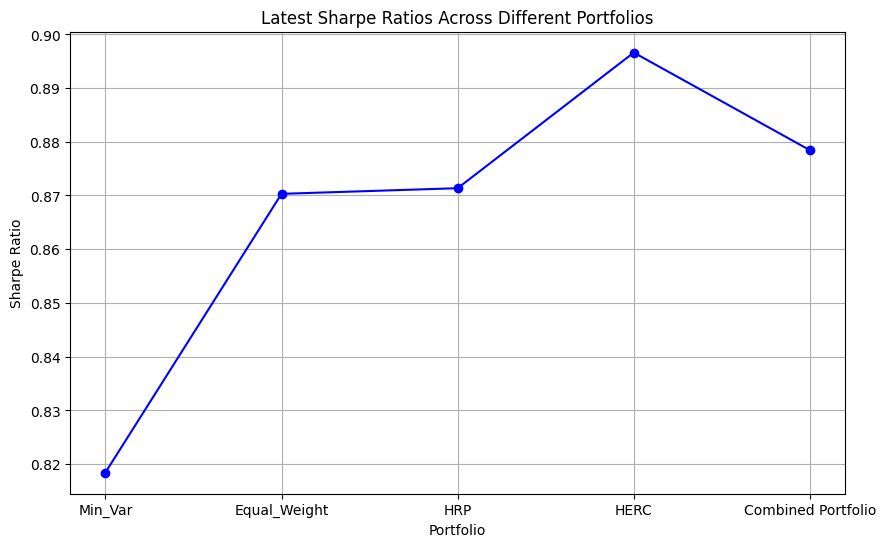

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sr_month is your DataFrame containing Sharpe ratios
# and portfolio_names lists the columns (portfolios)
portfolio_names = sr_month.columns

# Extracting the last Sharpe ratio for each portfolio
latest_sharpe_ratios = sr_month.iloc[-1]  # This gets the last row of Sharpe ratios

# If you want the average instead, you can use:
# average_sharpe_ratios = sr_month.mean()

plt.figure(figsize=(10, 6))

# Creating the line plot
plt.plot(portfolio_names, latest_sharpe_ratios, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Latest Sharpe Ratios Across Different Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')

# Adding grid for better readability
plt.grid(True)

# Showing the plot
plt.show()


KeyError: 'Asset1'

<Figure size 1500x1000 with 0 Axes>